## University Of XXX, Arizona  Student Analysis (Sample Mock Data ) Exploratory Data Analysis

#### Business Case Statement: University Of XXX, Arizona had been noticing a decline in No of students over the years, they started a campaign to improve the student Retention.

#### Target Variable: Campaign Attendance 

#### Measure : To check if the campaign attendance led to a increase in students retention or decrease in drop off

In [13]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import nltk
from scipy.stats.stats import pearsonr
import os

import codecs
import re
import copy
import collections
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
#from __future__ import division
import matplotlib

%matplotlib inline

#### import dataset

In [15]:
facebookmixer = pd.read_csv('facebook_Mixer_data.csv')
CalendarDimension = pd.read_csv('CalendarDimension.csv')
CalendarDimension_Prep= pd.read_csv('CalendarDimension_Prep.csv')
Calendar2018=pd.read_csv('CalendarDimension_2018.csv')
Comments= pd.read_csv('Commentsdata.csv')
FactsData=pd.read_csv('FactsData.csv')


In [16]:
#Comments
Calendar2018.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
Index               365 non-null int64
Date                365 non-null object
Year                365 non-null int64
Qtr Name            365 non-null object
Month               365 non-null int64
Mo Name             365 non-null object
Week of Year        365 non-null int64
Wk of Month         365 non-null int64
Day of Year         365 non-null int64
HolidayIndicator    365 non-null object
Week                365 non-null int64
Day                 365 non-null int64
dtypes: int64(8), object(4)
memory usage: 34.3+ KB


#### Top five obs

In [4]:
facebookmixer.head()


Student ID Degree Level  Program  Crse_6months_ind last_crse_dt  \
0            UOPX1          NaN      NaN                 0          NaN   
1  UOPX17522674911      Masters  MBA/MKT                 1      11/6/18   
2  UOPX18667257295          NaN      NaN                 0          NaN   
3  UOPX17253277457   Associates    AABFN                 0          NaN   
4  UOPX54131953053    Bachelors   BSED/E                 0          NaN   

  last_crse_grad last_crse_nm curr_crse_nm  curr_crse_engage  \
0              0            0            0                 0   
1              A      OPS/571            0                 0   
2              0            0            0                 0   
3              0            0      GEN/201                 1   
4              0            0      GEN/201                 1   

   curr_crse_Activ_engage  FB_Week_attnd           generation  \
0                       0              0                    0   
1                       0              0  Millennials (Gen Y)   
2                       0              0         Baby Boomers   
3                       1              1  Millennials (Gen Y)   
4                       1              1                Gen Z   

   Drp_last_6months  crse_attmpt  crse_complt Attnded_online_school  \
0                 0            0            0                    No   
1                 0           10            9                   Yes   
2                 0            0            0                   Yes   
3                 0            1            0                    No   
4                 0            1            0                   Yes   

   Comment_1  Comment_2  
0          0          1  
1          1          0  
2          1          0  
3          0          1  
4          1          0

In [17]:
#data info
facebookmixer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 18 columns):
Student ID                307 non-null object
Degree Level              259 non-null object
Program                   259 non-null object
Crse_6months_ind          307 non-null int64
last_crse_dt              127 non-null object
last_crse_grad            307 non-null object
last_crse_nm              307 non-null object
curr_crse_nm              307 non-null object
curr_crse_engage          307 non-null int64
curr_crse_Activ_engage    307 non-null int64
FB_Week_attnd             307 non-null int64
generation                307 non-null object
Drp_last_6months          307 non-null int64
crse_attmpt               307 non-null int64
crse_complt               307 non-null int64
Attnded_online_school     307 non-null object
Comment_1                 307 non-null int64
Comment_2                 307 non-null int64
dtypes: int64(9), object(9)
memory usage: 43.2+ KB


In [18]:
#Calendardimension
Calendar2018.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
Index               365 non-null int64
Date                365 non-null object
Year                365 non-null int64
Qtr Name            365 non-null object
Month               365 non-null int64
Mo Name             365 non-null object
Week of Year        365 non-null int64
Wk of Month         365 non-null int64
Day of Year         365 non-null int64
HolidayIndicator    365 non-null object
Week                365 non-null int64
Day                 365 non-null int64
dtypes: int64(8), object(4)
memory usage: 34.3+ KB


#### Data Pre-Conditioning

In [24]:
# Extract Dates from Last_crse_dt
facebookmixer['Date'] = pd.to_datetime(facebookmixer['last_crse_dt'])
facebookmixer['year'] = facebookmixer['Date'].dt.year
facebookmixer['month'] = facebookmixer['Date'].dt.month
facebookmixer['week'] = facebookmixer['Date'].dt.week
facebookmixer['Day'] = facebookmixer['Date'].dt.day

#facebookmixer['PerfBehavior'] = pd.cut(facebookmixer['crse_complt'], bins, labels=names)


In [25]:
CalendarDimension['Date']=pd.to_datetime(CalendarDimension['Date'])
Calendar2018['Date']=pd.to_datetime(Calendar2018['Date'])

facebookmixer['Date'] = pd.to_datetime(facebookmixer['last_crse_dt'])

# Merged Calendar Data to Facebookmixer
facebookmixer_Calendar = pd.merge(facebookmixer,Calendar2018,on='Date',how='left')
# Convert floats to int   
#float_col = facebookmixer_Calendar.select_dtypes(include = ['float64']) # This will select float columns only
# list(float_col.columns.values)
## df[col] = df[col].astype('int64')   
## Created Student retention Performance bins    
##bins = [0,2,15,30]
##names = ['<2', '2-15', '15-30']


#### Extract Data for visualization


In [542]:
#shape of data
facebookmixer.head()

Student ID Degree Level  Program  Crse_6months_ind last_crse_dt  \
0            UOPX1            0        0                 0            0   
1  UOPX17522674911      Masters  MBA/MKT                 1      11/6/18   
2  UOPX18667257295            0        0                 0            0   
3  UOPX17253277457   Associates    AABFN                 0            0   
4  UOPX54131953053    Bachelors   BSED/E                 0            0   

  last_crse_grad last_crse_nm curr_crse_nm  curr_crse_engage  \
0              0            0            0                 0   
1              A      OPS/571            0                 0   
2              0            0            0                 0   
3              0            0      GEN/201                 1   
4              0            0      GEN/201                 1   

   curr_crse_Activ_engage      ...       crse_complt Attnded_online_school  \
0                       0      ...                 0                    No   
1                       0      ...                 9                   Yes   
2                       0      ...                 0                   Yes   
3                       1      ...                 0                    No   
4                       1      ...                 0                   Yes   

   Comment_1  Comment_2       Date  year  month  week Day  PerfBehavior  
0          0          1 1970-01-01  1970      1     1   1            <2  
1          1          0 2018-11-06  2018     11    45   6          2-15  
2          1          0 1970-01-01  1970      1     1   1            <2  
3          0          1 1970-01-01  1970      1     1   1            <2  
4          1          0 1970-01-01  1970      1     1   1            <2  

[5 rows x 24 columns]

#### Summary statistics

In [509]:

facebookmixer.describe()

Crse_6months_ind  curr_crse_engage  curr_crse_Activ_engage  \
count        307.000000        307.000000              307.000000   
mean           0.413681          0.511401                0.475570   
std            0.493297          0.500686                0.500218   
min            0.000000          0.000000                0.000000   
25%            0.000000          0.000000                0.000000   
50%            0.000000          1.000000                0.000000   
75%            1.000000          1.000000                1.000000   
max            1.000000          1.000000                1.000000   

       FB_Week_attnd  Drp_last_6months  crse_attmpt  crse_complt   Comment_1  \
count     307.000000        307.000000   307.000000   307.000000  307.000000   
mean        0.469055          0.195440     2.671010     1.371336    0.609121   
std         0.499856          0.549134     4.504091     3.557037    0.488744   
min         0.000000          0.000000     0.000000     0.000000    0.000000   
25%         0.000000          0.000000     0.000000     0.000000    0.000000   
50%         0.000000          0.000000     1.000000     0.000000    1.000000   
75%         1.000000          0.000000     3.000000     2.000000    1.000000   
max         1.000000          3.000000    32.000000    29.000000    1.000000   

        Comment_2         year       month        week         Day  
count  307.000000   307.000000  307.000000  307.000000  307.000000  
mean     0.384365   834.820847    4.315961   18.462541    8.576547  
std      0.487239   995.488288    5.292846   22.704864   11.535814  
min      0.000000     0.000000    0.000000    0.000000    0.000000  
25%      0.000000     0.000000    0.000000    0.000000    0.000000  
50%      0.000000     0.000000    0.000000    0.000000    0.000000  
75%      1.000000  2018.000000   11.000000   48.000000   23.000000  
max      1.000000  2019.000000   12.000000   51.000000   27.000000

In [510]:
#sorting w.r.t a variable
facebookmixer_sort = facebookmixer.sort_values(by = ['crse_attmpt'], ascending=[True]).head()
facebookmixer_sort.head()

Student ID Degree Level  Program  Crse_6months_ind last_crse_dt  \
0              UOPX1            0        0                 0            0   
233  UOPX84765406296      Masters      MBA                 0            0   
234  UOPX29715413196   Associates    AACJS                 0            0   
122  UOPX12939736842            0        0                 0            0   
120  UOPX26847285677    Bachelors  BSB/PJ2                 0            0   

    last_crse_grad last_crse_nm curr_crse_nm  curr_crse_engage  \
0                0            0            0                 0   
233              0            0            0                 0   
234              0            0            0                 0   
122              0            0            0                 0   
120              0            0            0                 0   

     curr_crse_Activ_engage      ...       crse_complt Attnded_online_school  \
0                         0      ...                 0                    No   
233                       0      ...                 0                    No   
234                       0      ...                 0                    No   
122                       0      ...                 0                   Yes   
120                       0      ...                 0                    No   

     Comment_1  Comment_2       Date year  month  week Day  PerfBehavior  
0            0          1 1970-01-01    0      0     0   0            <2  
233          0          1 1970-01-01    0      0     0   0            <2  
234          0          1 1970-01-01    0      0     0   0            <2  
122          1          0 1970-01-01    0      0     0   0            <2  
120          0          1 1970-01-01    0      0     0   0            <2  

[5 rows x 24 columns]

In [511]:
def min_max_values(col):
    ''' the function takes the column name as the argument
    and returns the top & bottom observation in that dataframe'''
    
    top=facebookmixer[col].idxmax()
    top_obs = pd.DataFrame(facebookmixer.loc[top])
    
    bottom = facebookmixer[col].idxmin()
    bot_obs = pd.DataFrame(facebookmixer.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs
    

In [512]:
min_max_values('crse_attmpt')

248                  0  
Student ID                  UOPX82185350743                UOPX1
Degree Level                        Masters                    0
Program                                 MBA                    0
Crse_6months_ind                          1                    0
last_crse_dt                       11/27/18                    0
last_crse_grad                            C                    0
last_crse_nm                        PSY/301                    0
curr_crse_nm                        MGT/521                    0
curr_crse_engage                          1                    0
curr_crse_Activ_engage                    1                    0
FB_Week_attnd                             1                    0
generation                            Gen X                    0
Drp_last_6months                          0                    0
crse_attmpt                              32                    0
crse_complt                              29                    0
Attnded_online_school                   Yes                   No
Comment_1                                 1                    0
Comment_2                                 0                    1
Date                    2018-11-27 00:00:00  1970-01-01 00:00:00
year                                   2018                    0
month                                    11                    0
week                                     48                    0
Day                                      27                    0
PerfBehavior                          15-30                   <2

In [513]:
min_max_values('crse_complt')

248                  0  
Student ID                  UOPX82185350743                UOPX1
Degree Level                        Masters                    0
Program                                 MBA                    0
Crse_6months_ind                          1                    0
last_crse_dt                       11/27/18                    0
last_crse_grad                            C                    0
last_crse_nm                        PSY/301                    0
curr_crse_nm                        MGT/521                    0
curr_crse_engage                          1                    0
curr_crse_Activ_engage                    1                    0
FB_Week_attnd                             1                    0
generation                            Gen X                    0
Drp_last_6months                          0                    0
crse_attmpt                              32                    0
crse_complt                              29                    0
Attnded_online_school                   Yes                   No
Comment_1                                 1                    0
Comment_2                                 0                    1
Date                    2018-11-27 00:00:00  1970-01-01 00:00:00
year                                   2018                    0
month                                    11                    0
week                                     48                    0
Day                                      27                    0
PerfBehavior                          15-30                   <2

In [514]:
min_max_values('Drp_last_6months')

57                   0 
Student ID                  UOPX53839422223                UOPX1
Degree Level                      Bachelors                    0
Program                                 BSM                    0
Crse_6months_ind                          1                    0
last_crse_dt                       10/23/18                    0
last_crse_grad                            A                    0
last_crse_nm                        HRM/300                    0
curr_crse_nm                              0                    0
curr_crse_engage                          0                    0
curr_crse_Activ_engage                    0                    0
FB_Week_attnd                             0                    0
generation                            Gen X                    0
Drp_last_6months                          3                    0
crse_attmpt                              12                    0
crse_complt                               0                    0
Attnded_online_school                   Yes                   No
Comment_1                                 1                    0
Comment_2                                 0                    1
Date                    2018-10-23 00:00:00  1970-01-01 00:00:00
year                                   2018                    0
month                                    10                    0
week                                     43                    0
Day                                      23                    0
PerfBehavior                             <2                   <2

In [515]:
def min_max_values(col):
    ''' the function takes the column name as the argument
    and returns the top & bottom observation in that dataframe'''
    
    top=Calendar2018[col].idxmax()
    top_obs = pd.DataFrame(Calendar2018.loc[top])
    
    bottom = Calendar2018[col].idxmin()
    bot_obs = pd.DataFrame(Calendar2018.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs
    

In [516]:
min_max_values('Wk of Month')

0                    0
Index                               1                    1
Date              2018-01-01 00:00:00  2018-01-01 00:00:00
Year                             2018                 2018
Qtr Name                           Q4                   Q4
Month                               1                    1
Mo Name                           Dec                  Dec
Week of Year                       53                   53
Wk of Month                         6                    6
Day of Year                         1                    1
HolidayIndicator         New Year Day         New Year Day
Week                                1                    1
Day                                 1                    1

#### Histogram of continous numerical variable

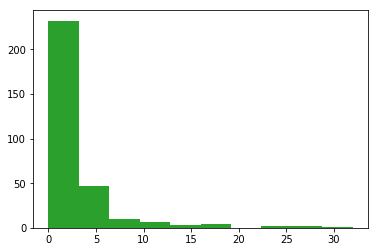

In [29]:

for j in list(facebookmixer.columns):
    num_bins=10
    plt.hist(facebookmixer['crse_attmpt'],num_bins)
    plt.savefig(str(j)+'_histogram.png')
    plt.close

#### Probability density function

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


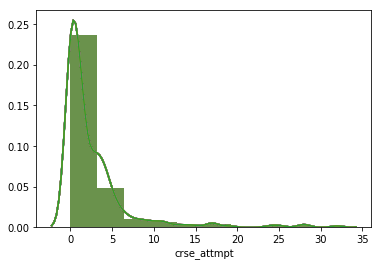

In [30]:

for j in list(facebookmixer.columns):
    sns.distplot(facebookmixer['crse_attmpt'],bins=10)
    plt.savefig(str(j)+'_distplot.png')
    plt.close
    


#### Boxplot

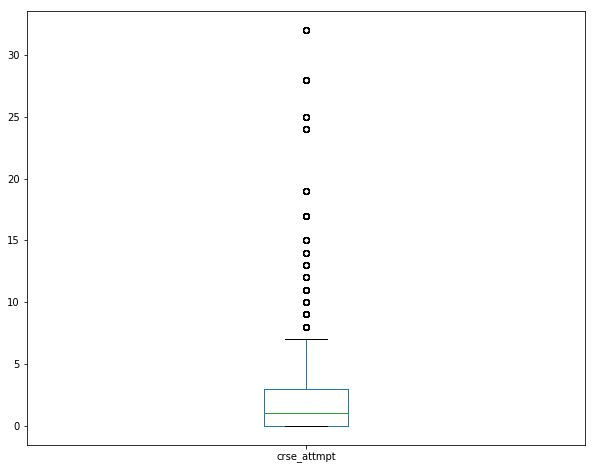

In [519]:

for j in list(facebookmixer.columns):
    facebookmixer.boxplot(column='crse_attmpt',grid=False,figsize=(10,8))
    plt.savefig(str(j)+'_boxplot.png')
    plt.close



#### Histogram of continous numerical variable

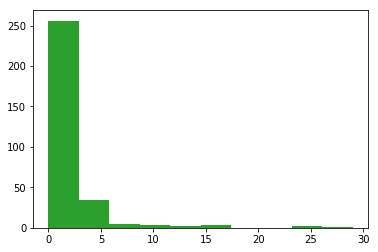

In [31]:

for j in list(facebookmixer.columns):
    num_bins=10
    plt.hist(facebookmixer['crse_complt'],num_bins)
    plt.savefig(str(j)+'_histogram_crse_complt.png')
    plt.close

#### Probability density function

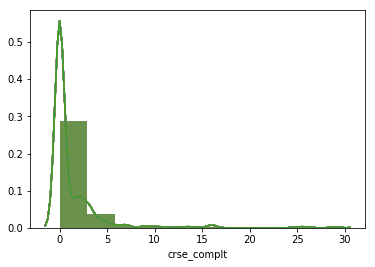

In [32]:
for j in list(facebookmixer.columns):
    sns.distplot(facebookmixer['crse_complt'],bins=10)
    plt.savefig(str(j)+'_distplot_crse_complt.png')
    plt.close
    

#### Boxplot

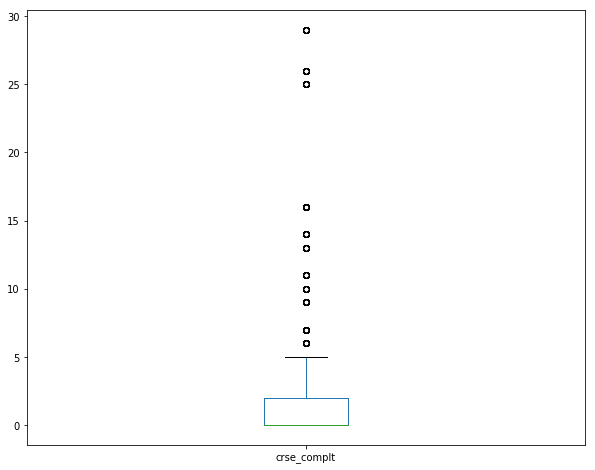

In [33]:

for j in list(facebookmixer.columns):
    facebookmixer.boxplot(column='crse_complt',grid=False,figsize=(10,8))
    plt.savefig(str(j)+'_boxplot_crse_complt.png')
    plt.close



#### Histogram of continous numerical variable

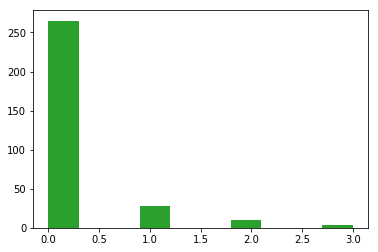

In [74]:

for j in list(facebookmixer.columns):
    num_bins=10
    plt.hist(facebookmixer['Drp_last_6months'],num_bins)
    plt.savefig(str(j)+'_histogram_Drp_last_6months.png')
    plt.close

#### Probability density function

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


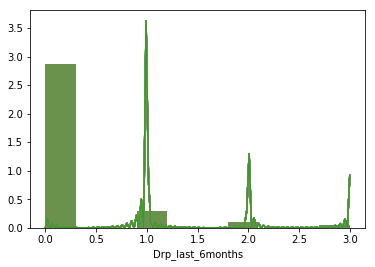

In [34]:

for j in list(facebookmixer.columns):
    sns.distplot(facebookmixer['Drp_last_6months'],bins=10)
    plt.savefig(str(j)+'_distplot_Drp_last_6months.png')
    plt.close
    

#### Boxplot

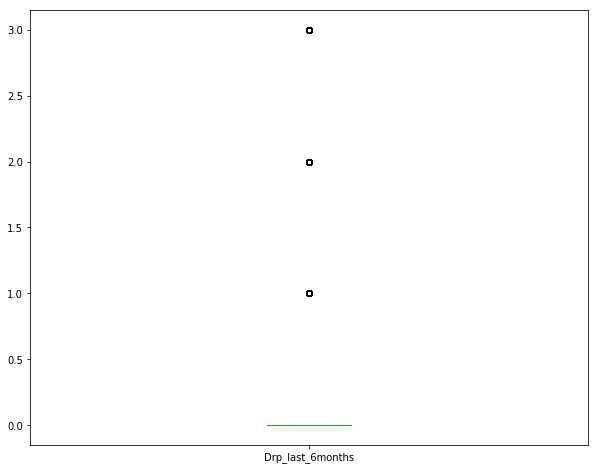

In [35]:

for j in list(facebookmixer.columns):
    facebookmixer.boxplot(column='Drp_last_6months',grid=False,figsize=(10,8))
    plt.savefig(str(j)+'_boxplot_Drp_last_6months.png')
    plt.close



#### Binomial and Multinomial Univariate Analysis
##### Count by category - cross tabulate

In [36]:
make_dist = facebookmixer.groupby('generation').size()
make_dist

generation
0                       45
Baby Boomers            12
Gen X                   72
Gen Z                   22
Millennials (Gen Y)    156
dtype: int64

In [37]:
FBAttnd_dist = facebookmixer.groupby('FB_Week_attnd').size()
FBAttnd_dist


FB_Week_attnd
0    163
1    144
dtype: int64

In [38]:
Attndedonline_dist = facebookmixer.groupby('Attnded_online_school').size()
Attndedonline_dist

Attnded_online_school
0        1
No     120
Yes    186
dtype: int64

#### Multivariate Analysis
##### Pair Plots

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


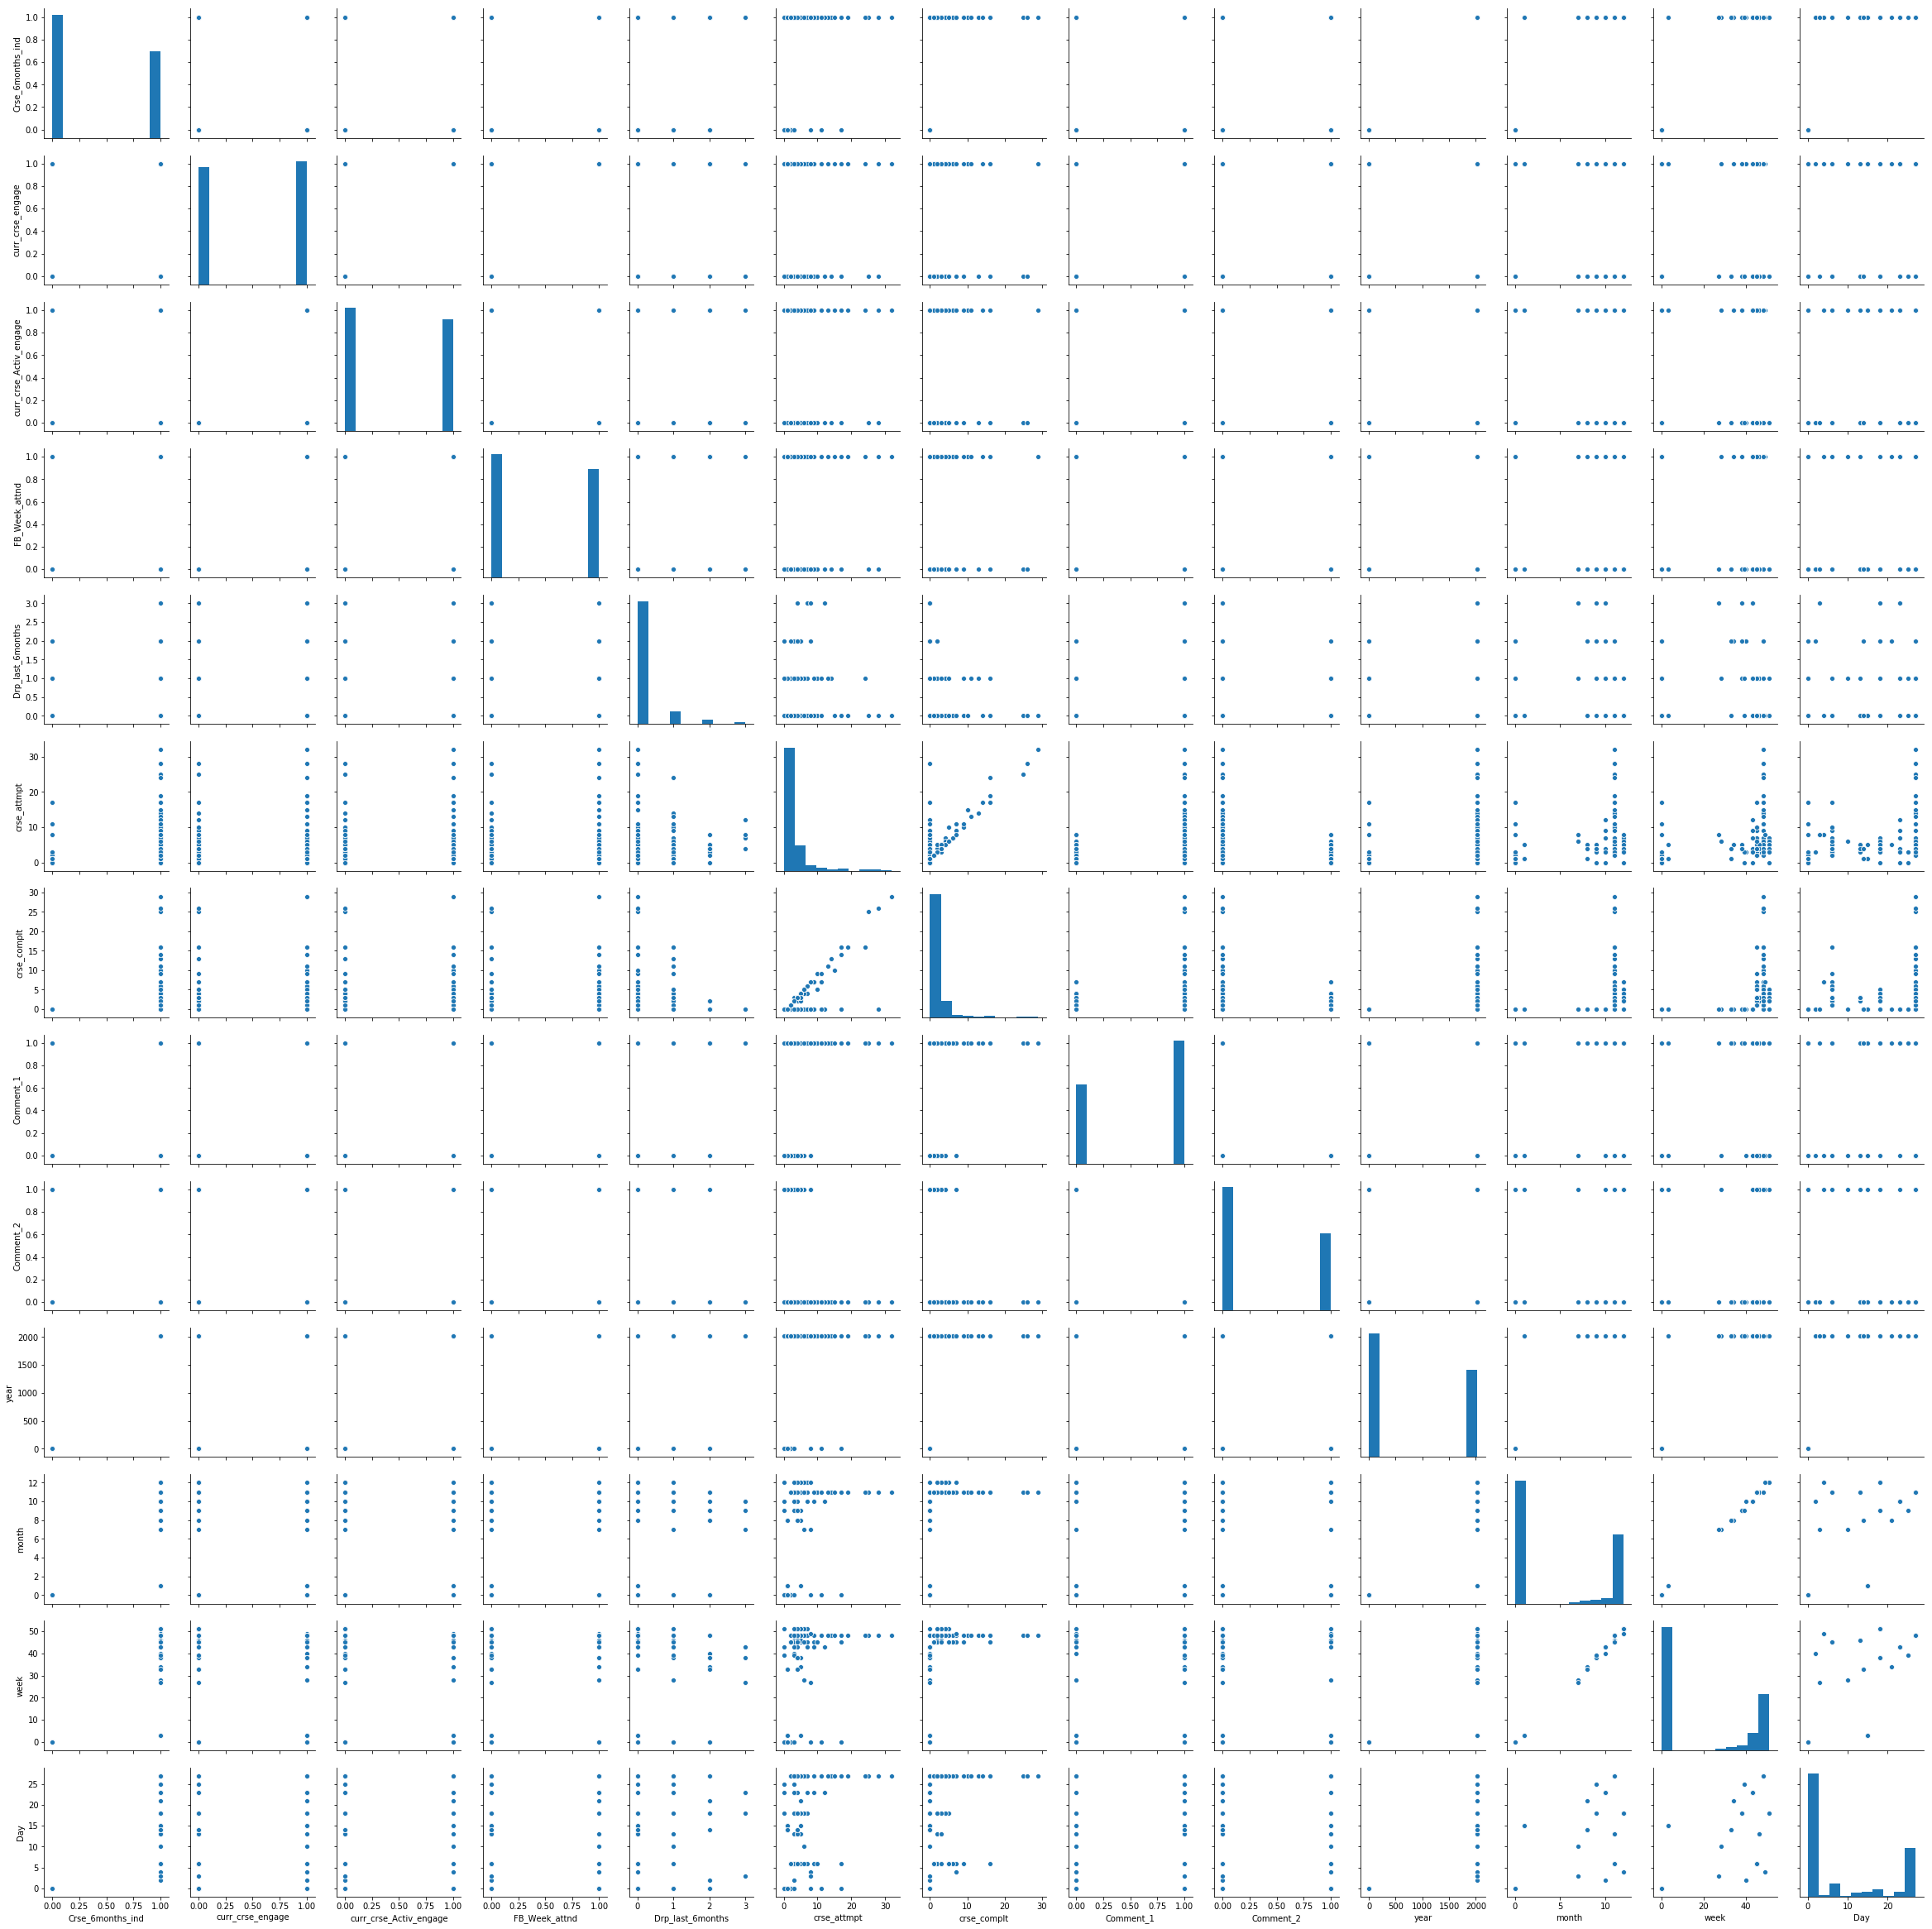

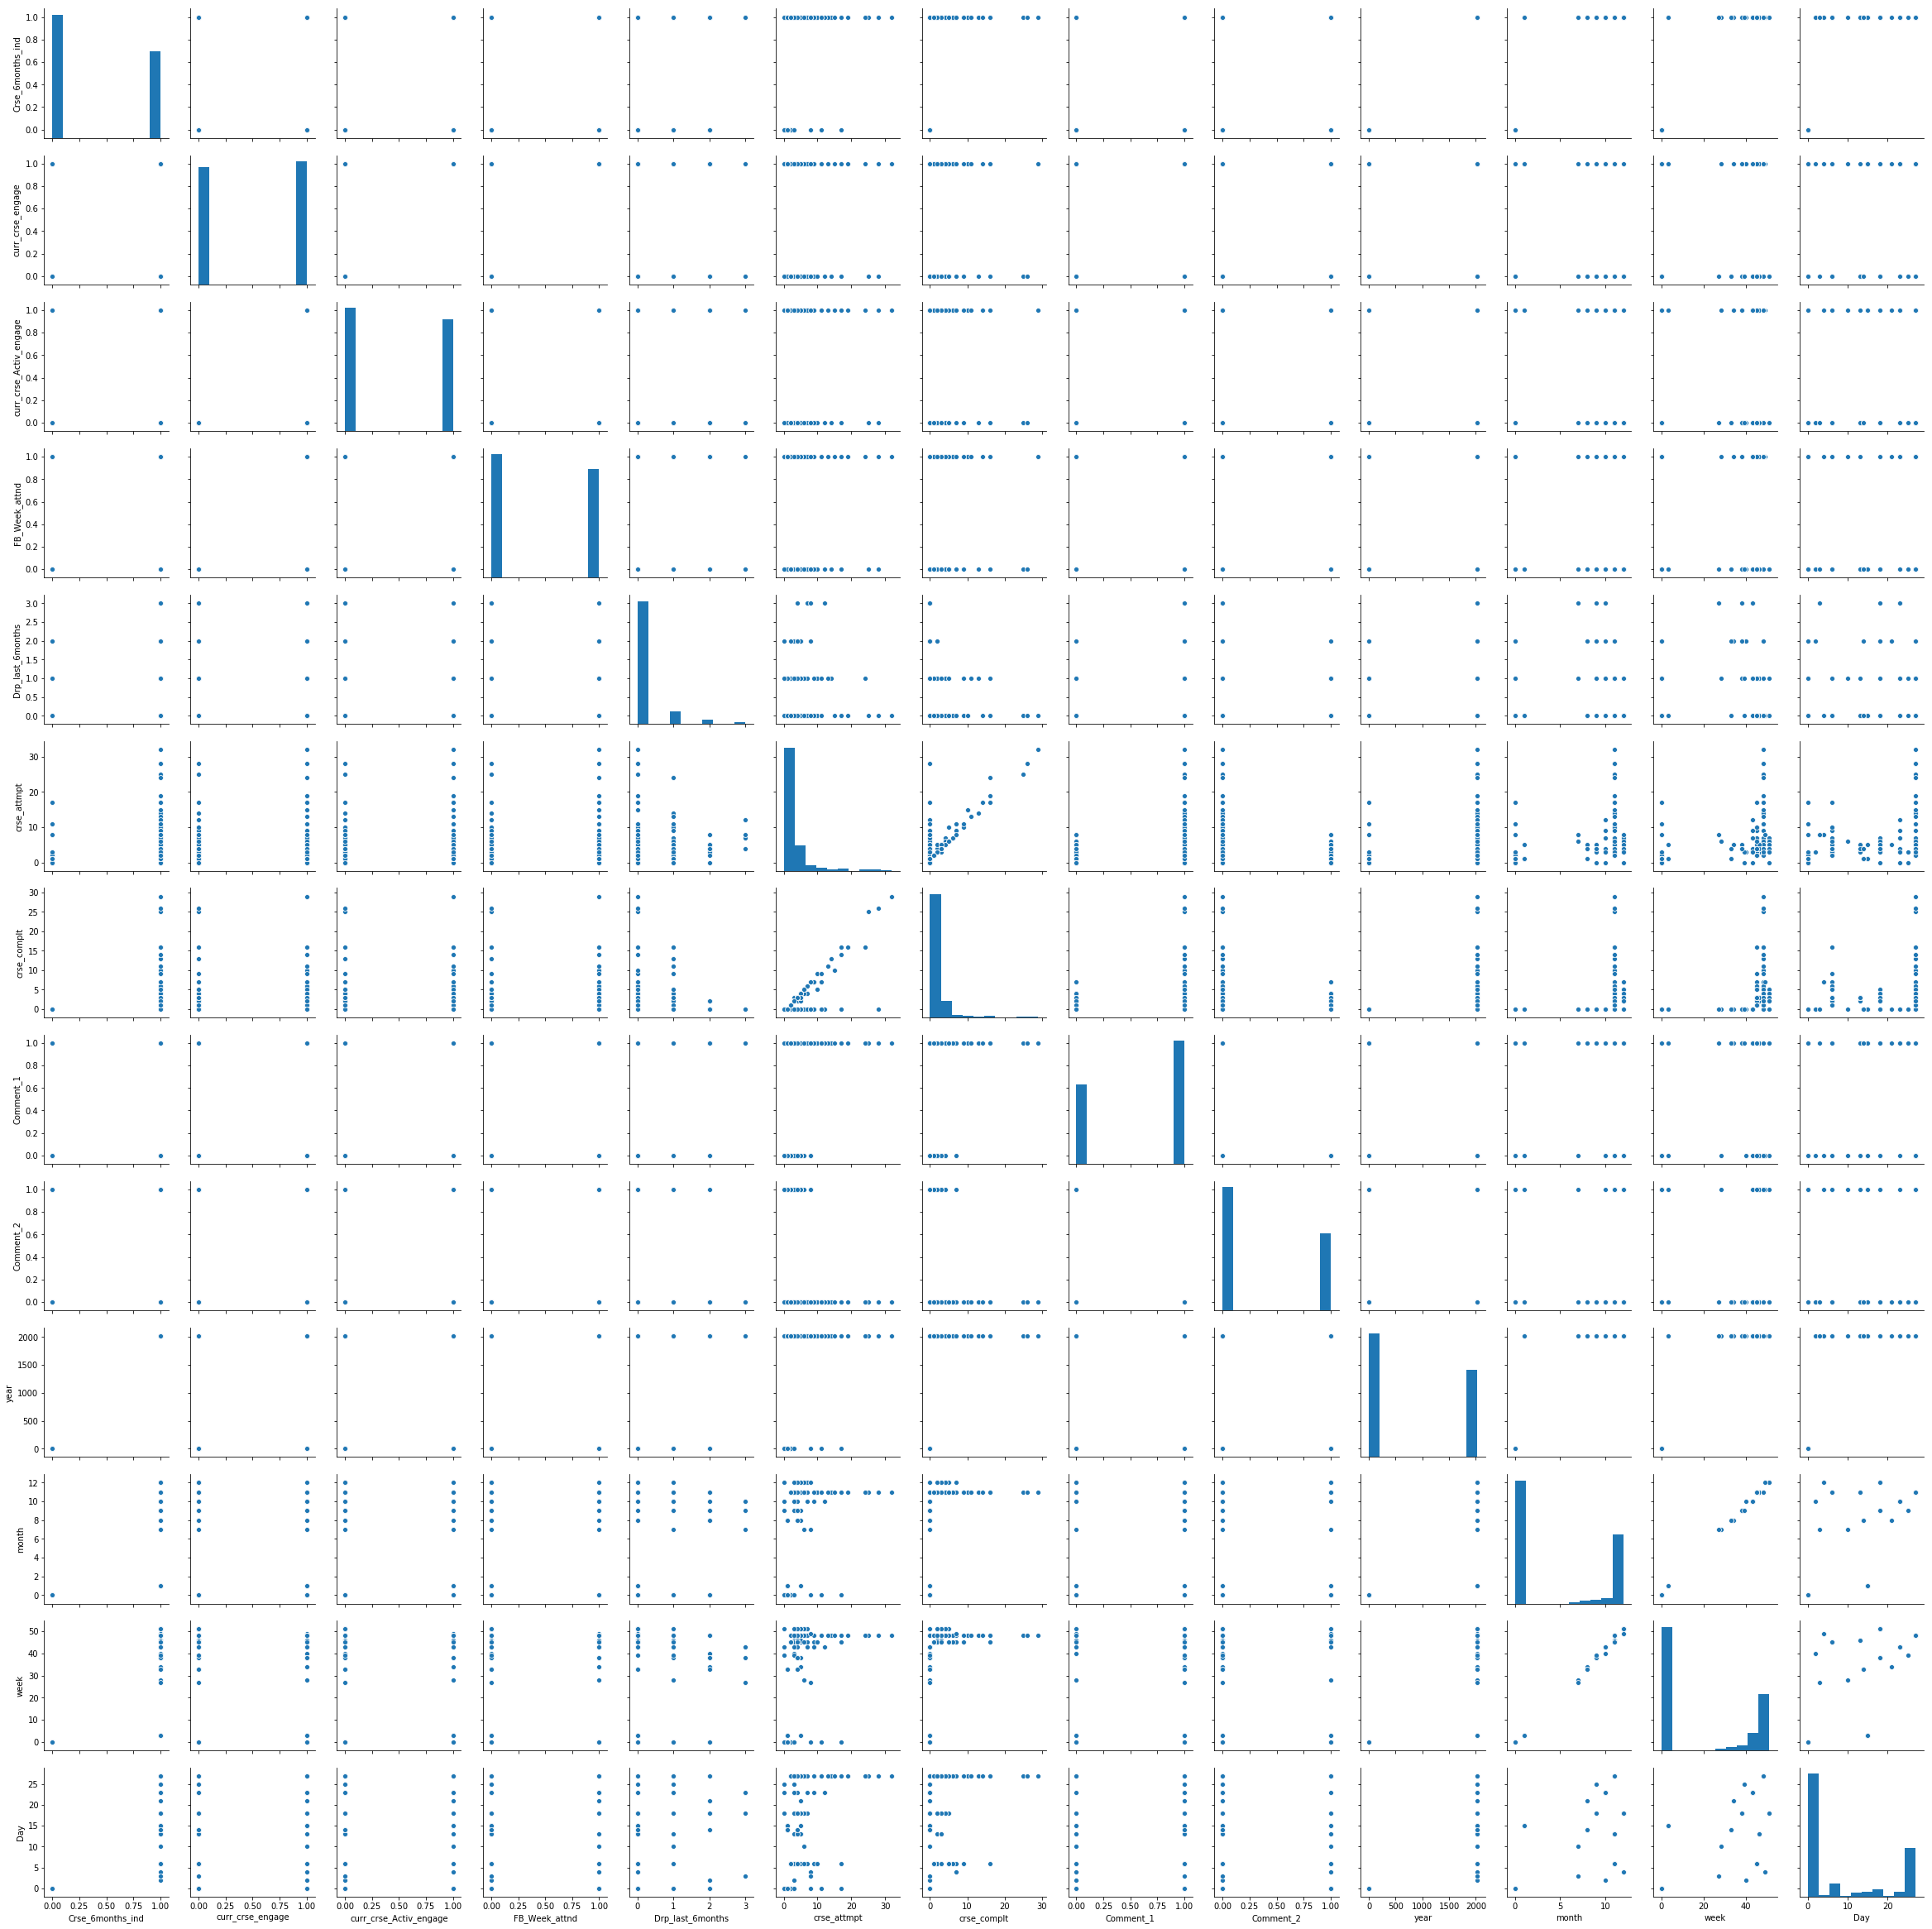

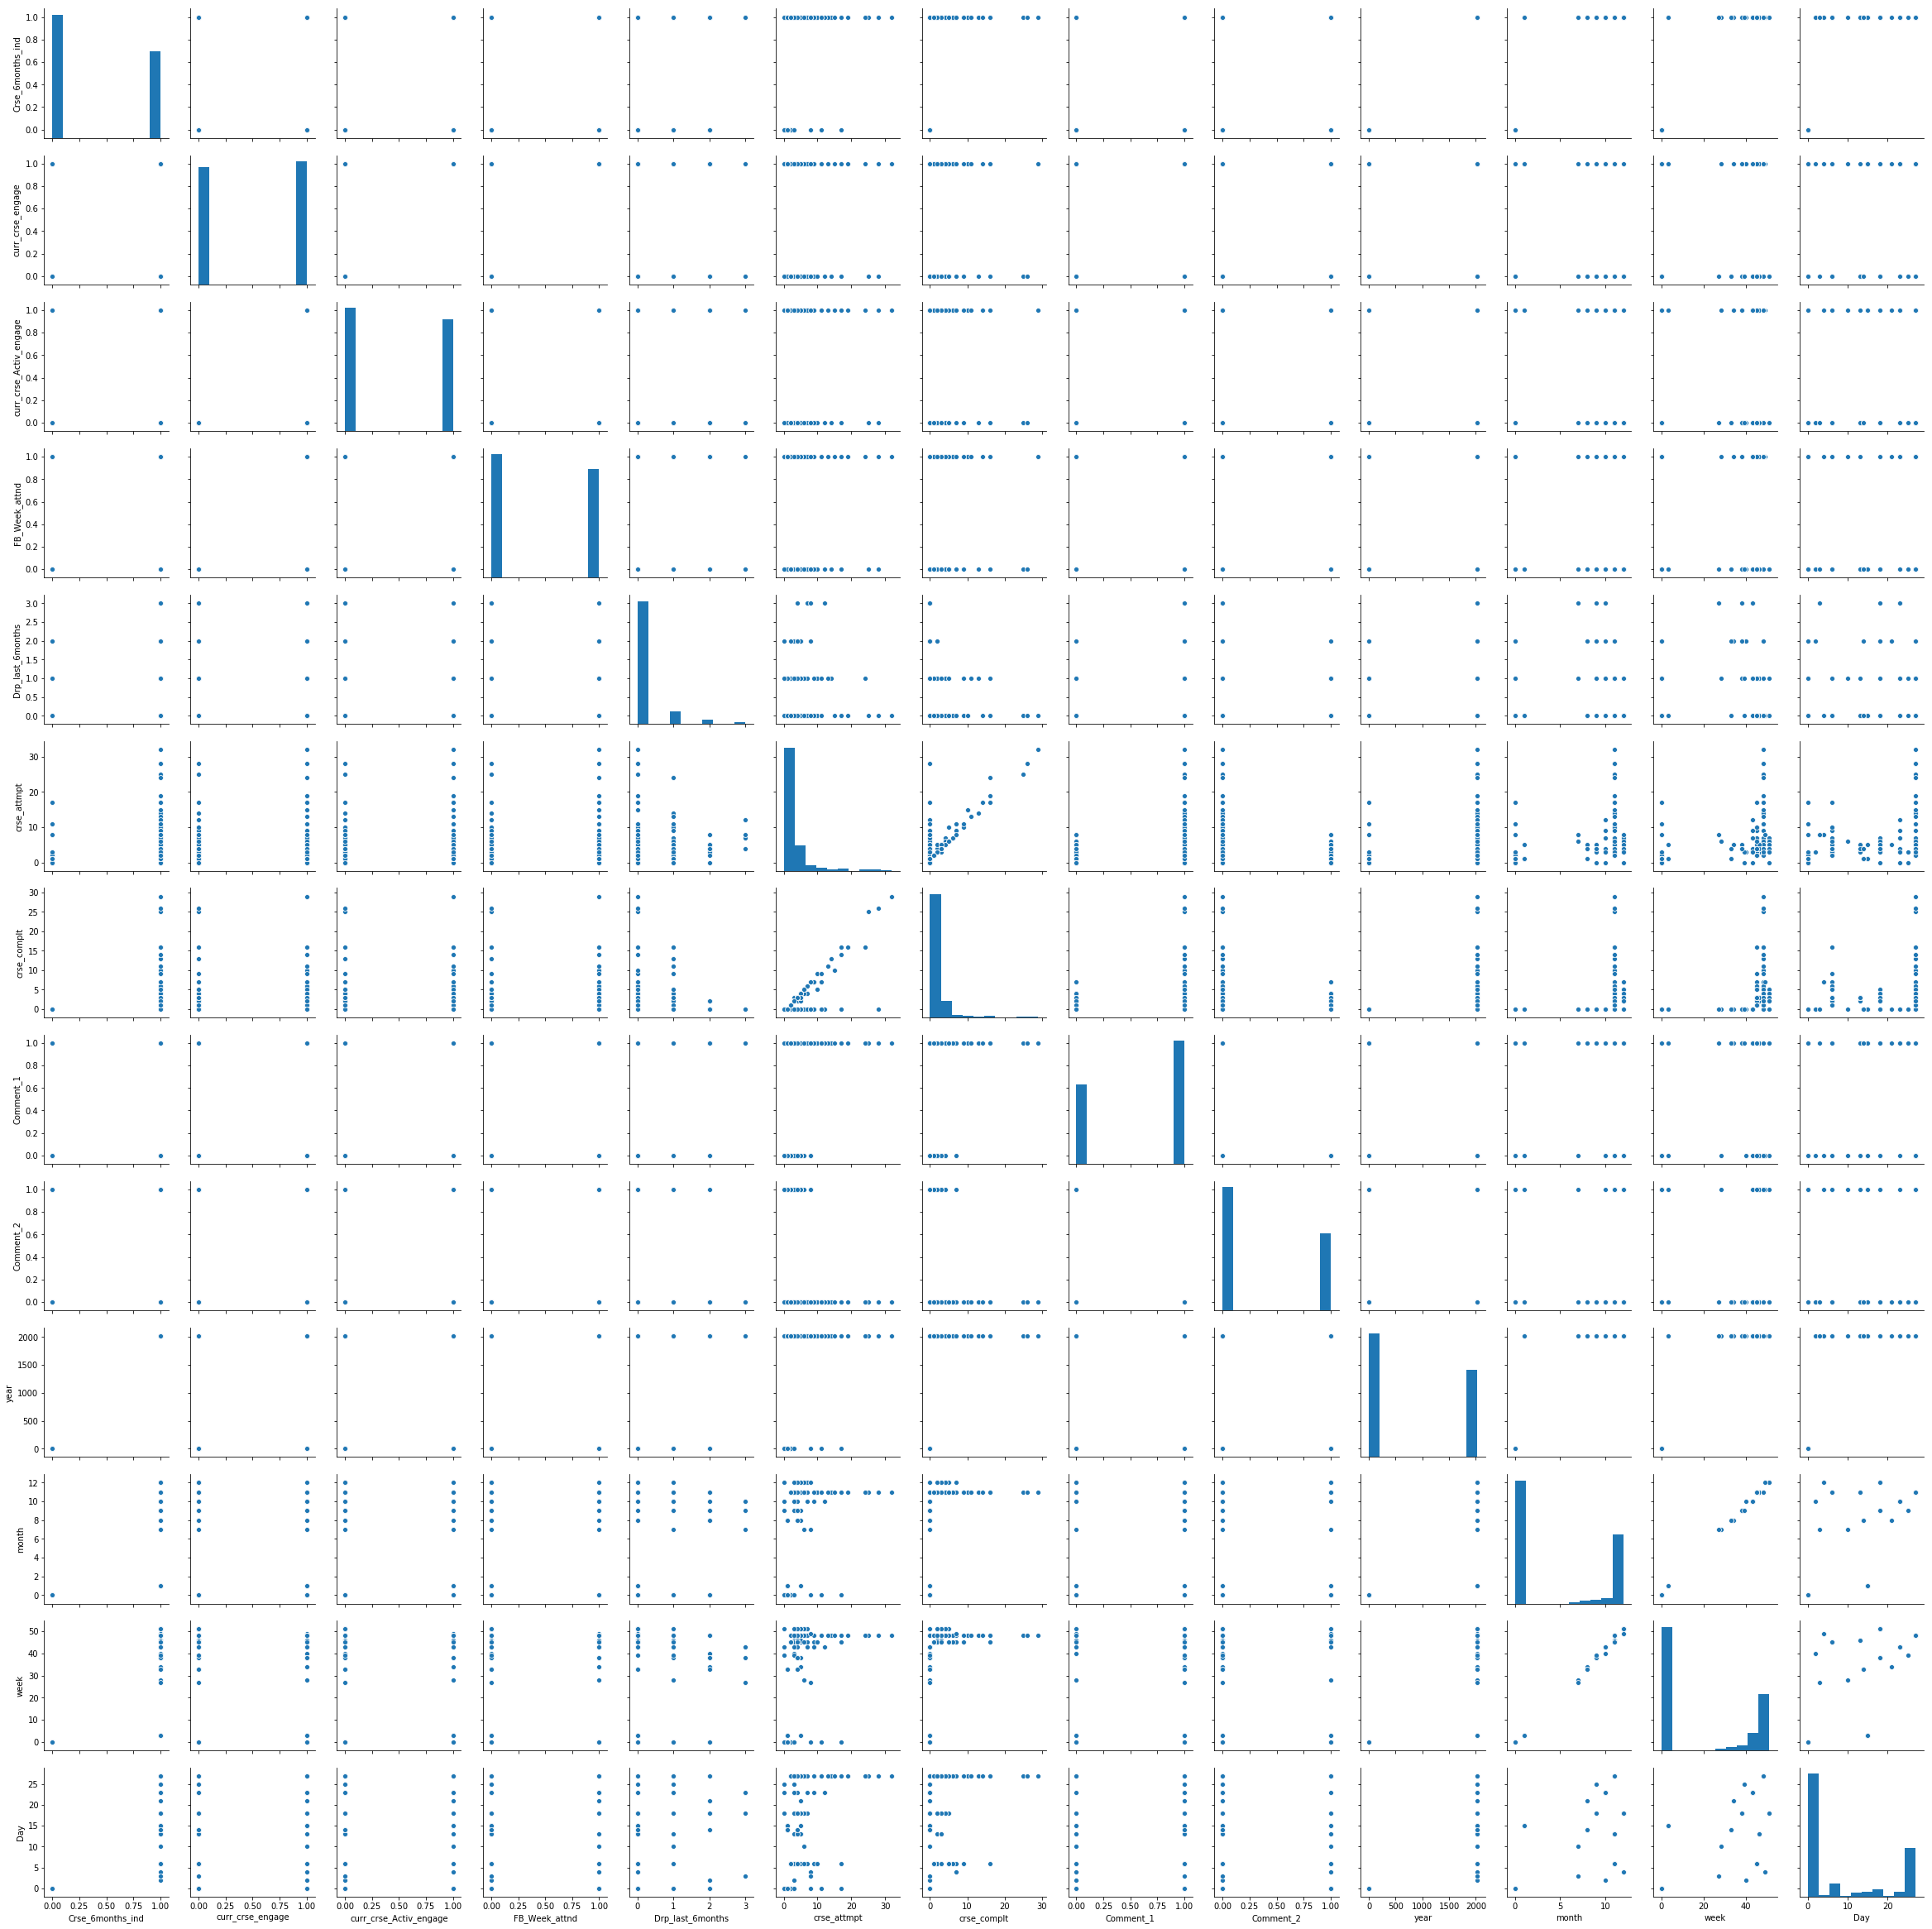

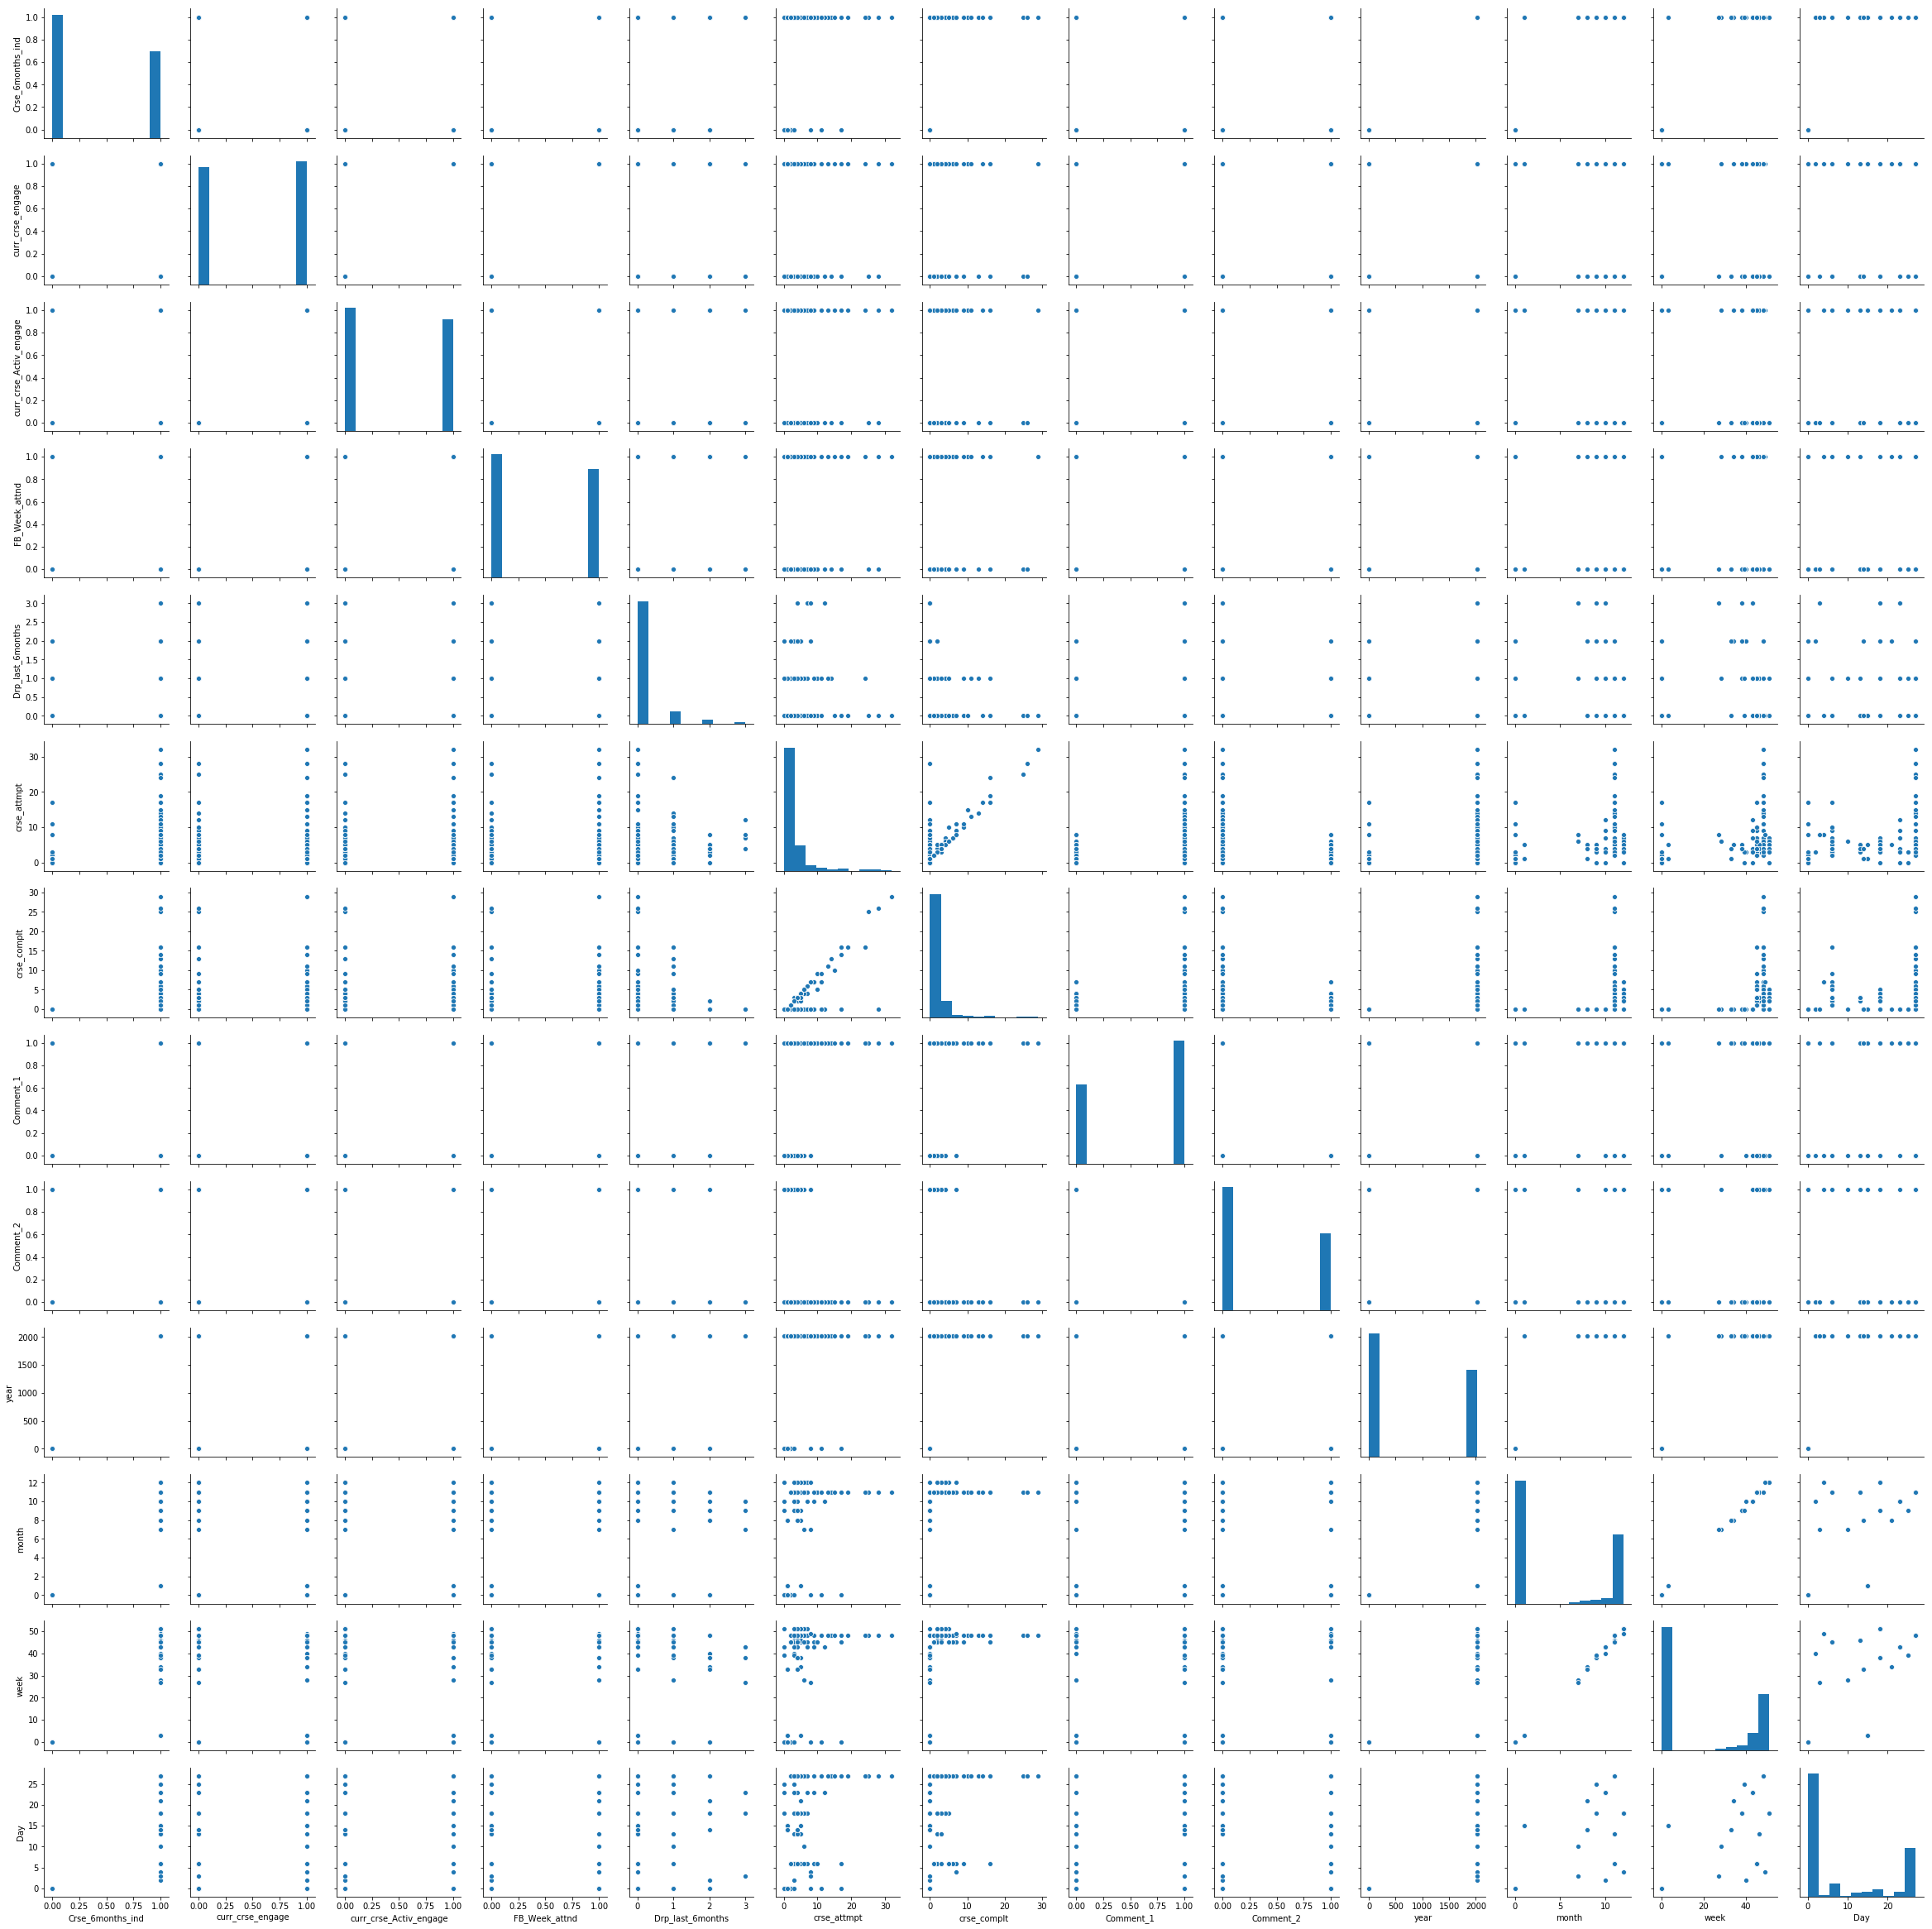

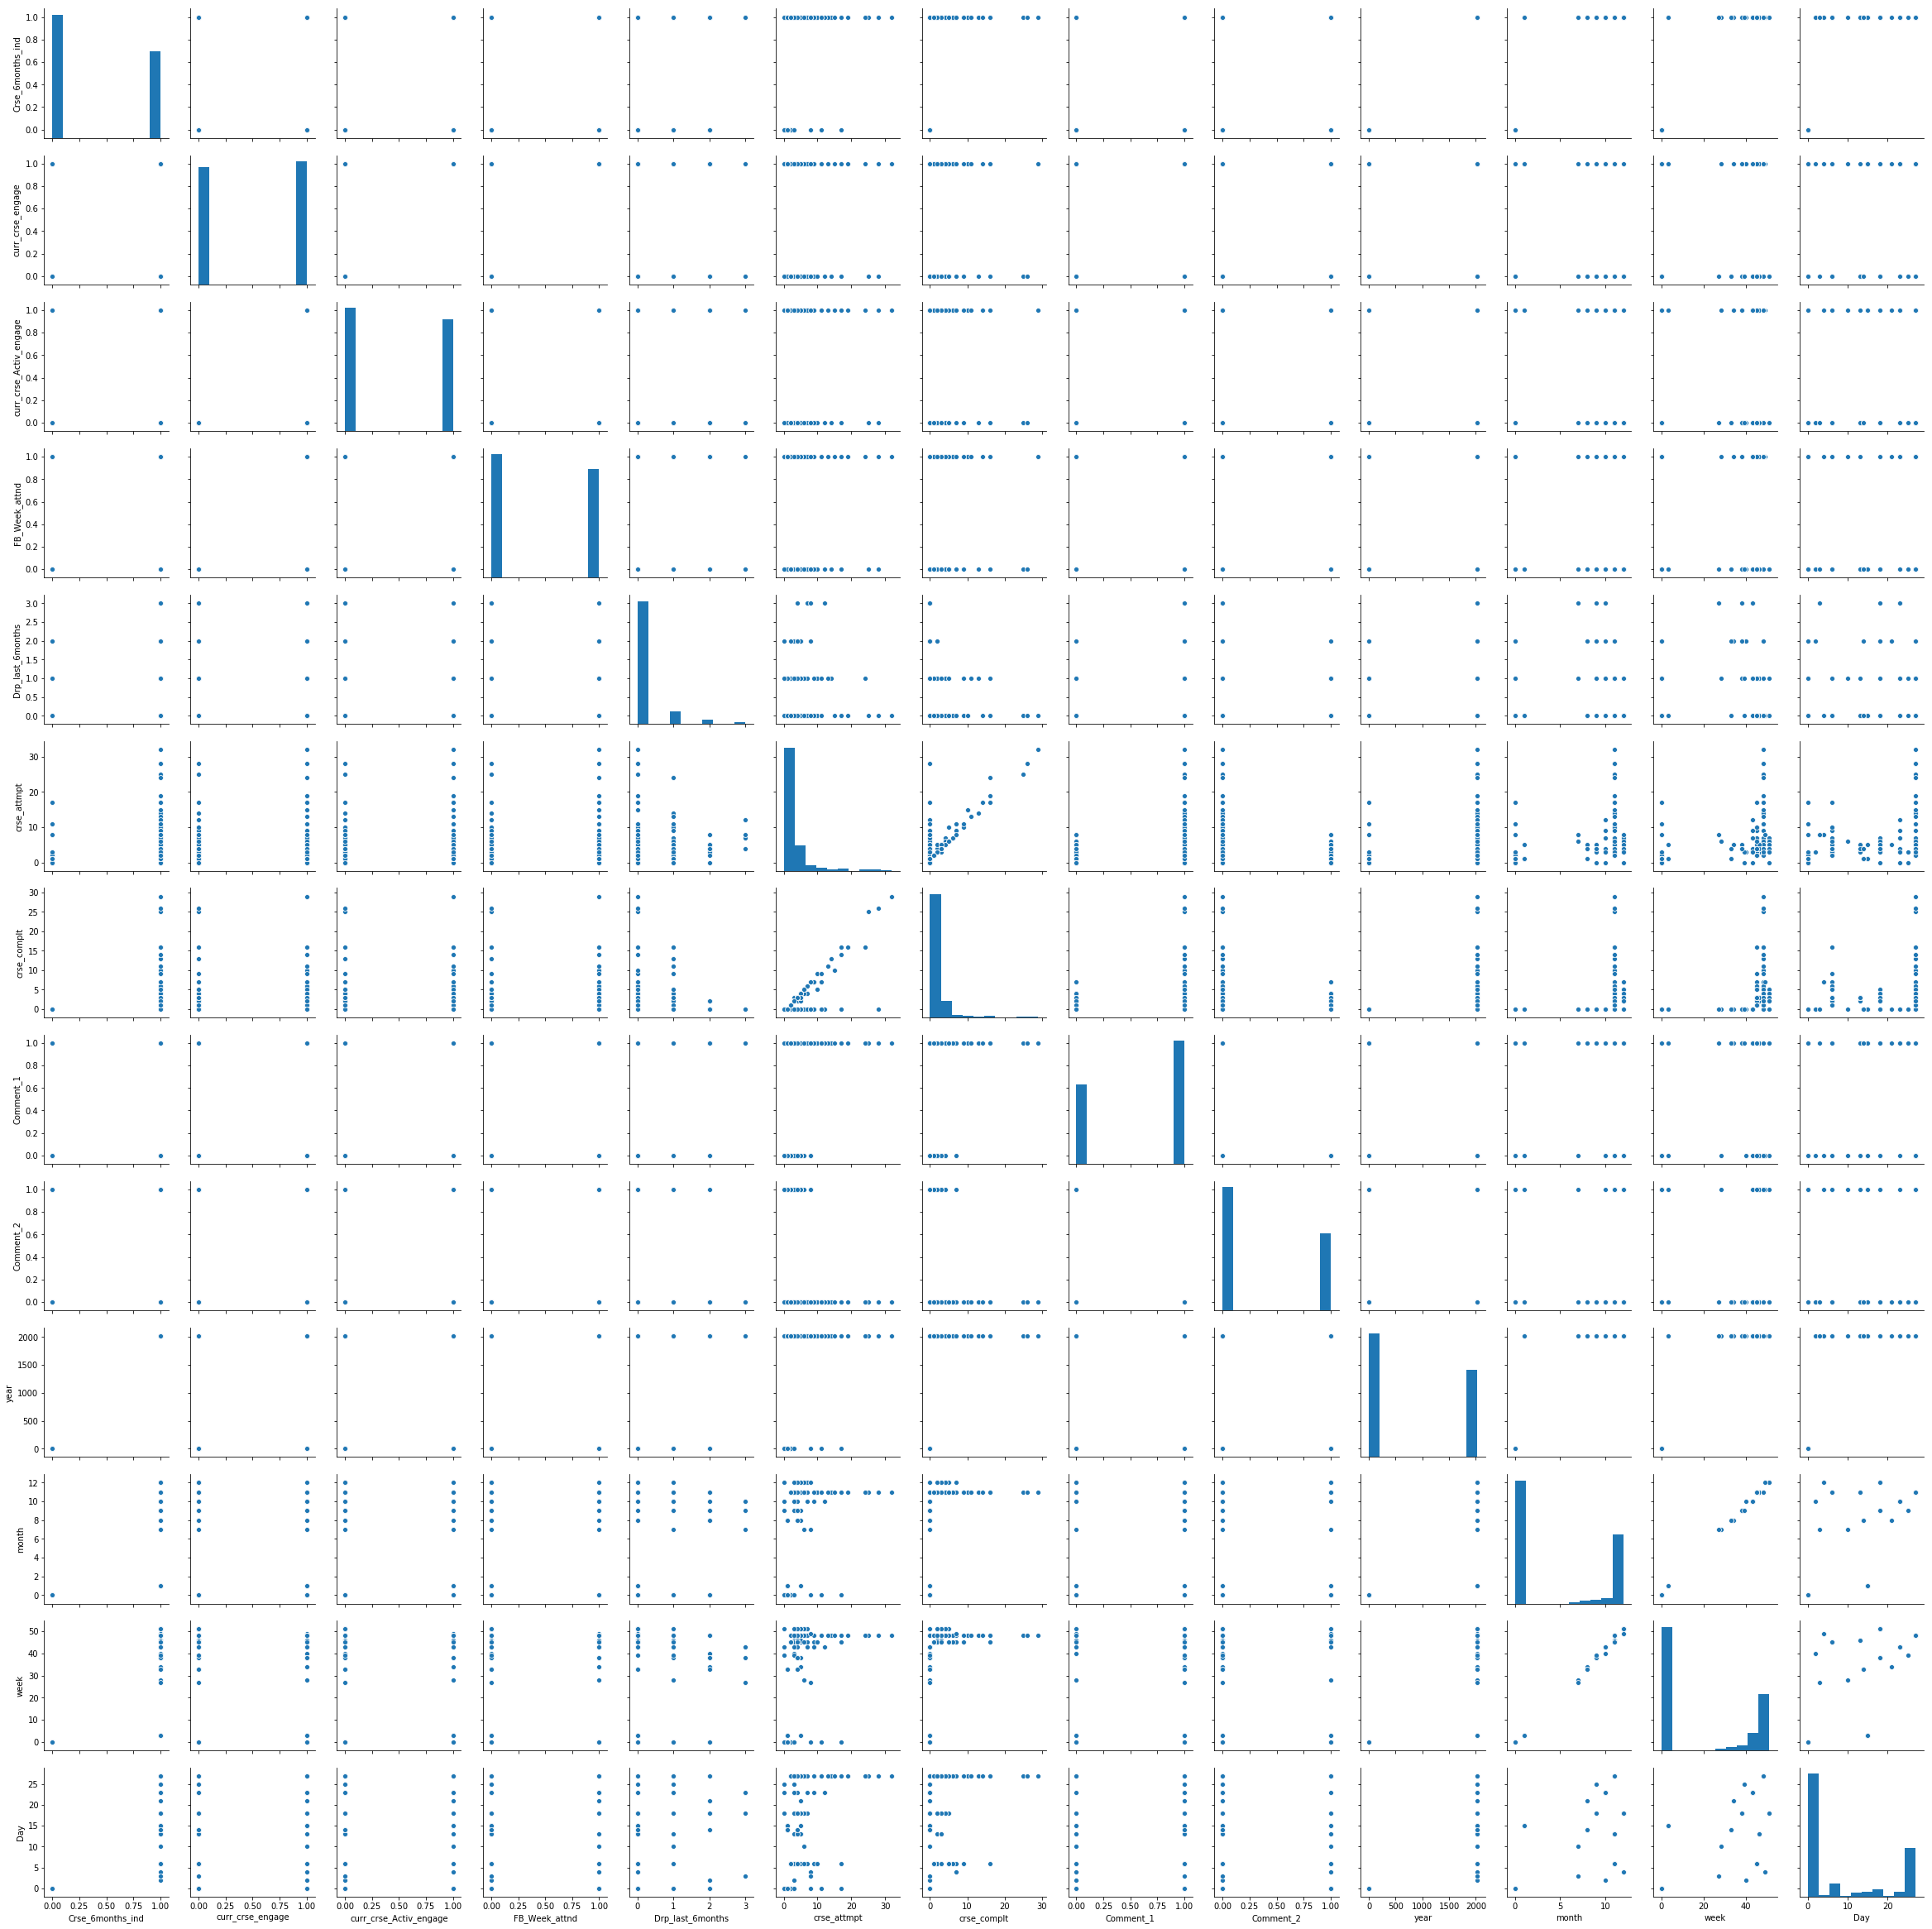

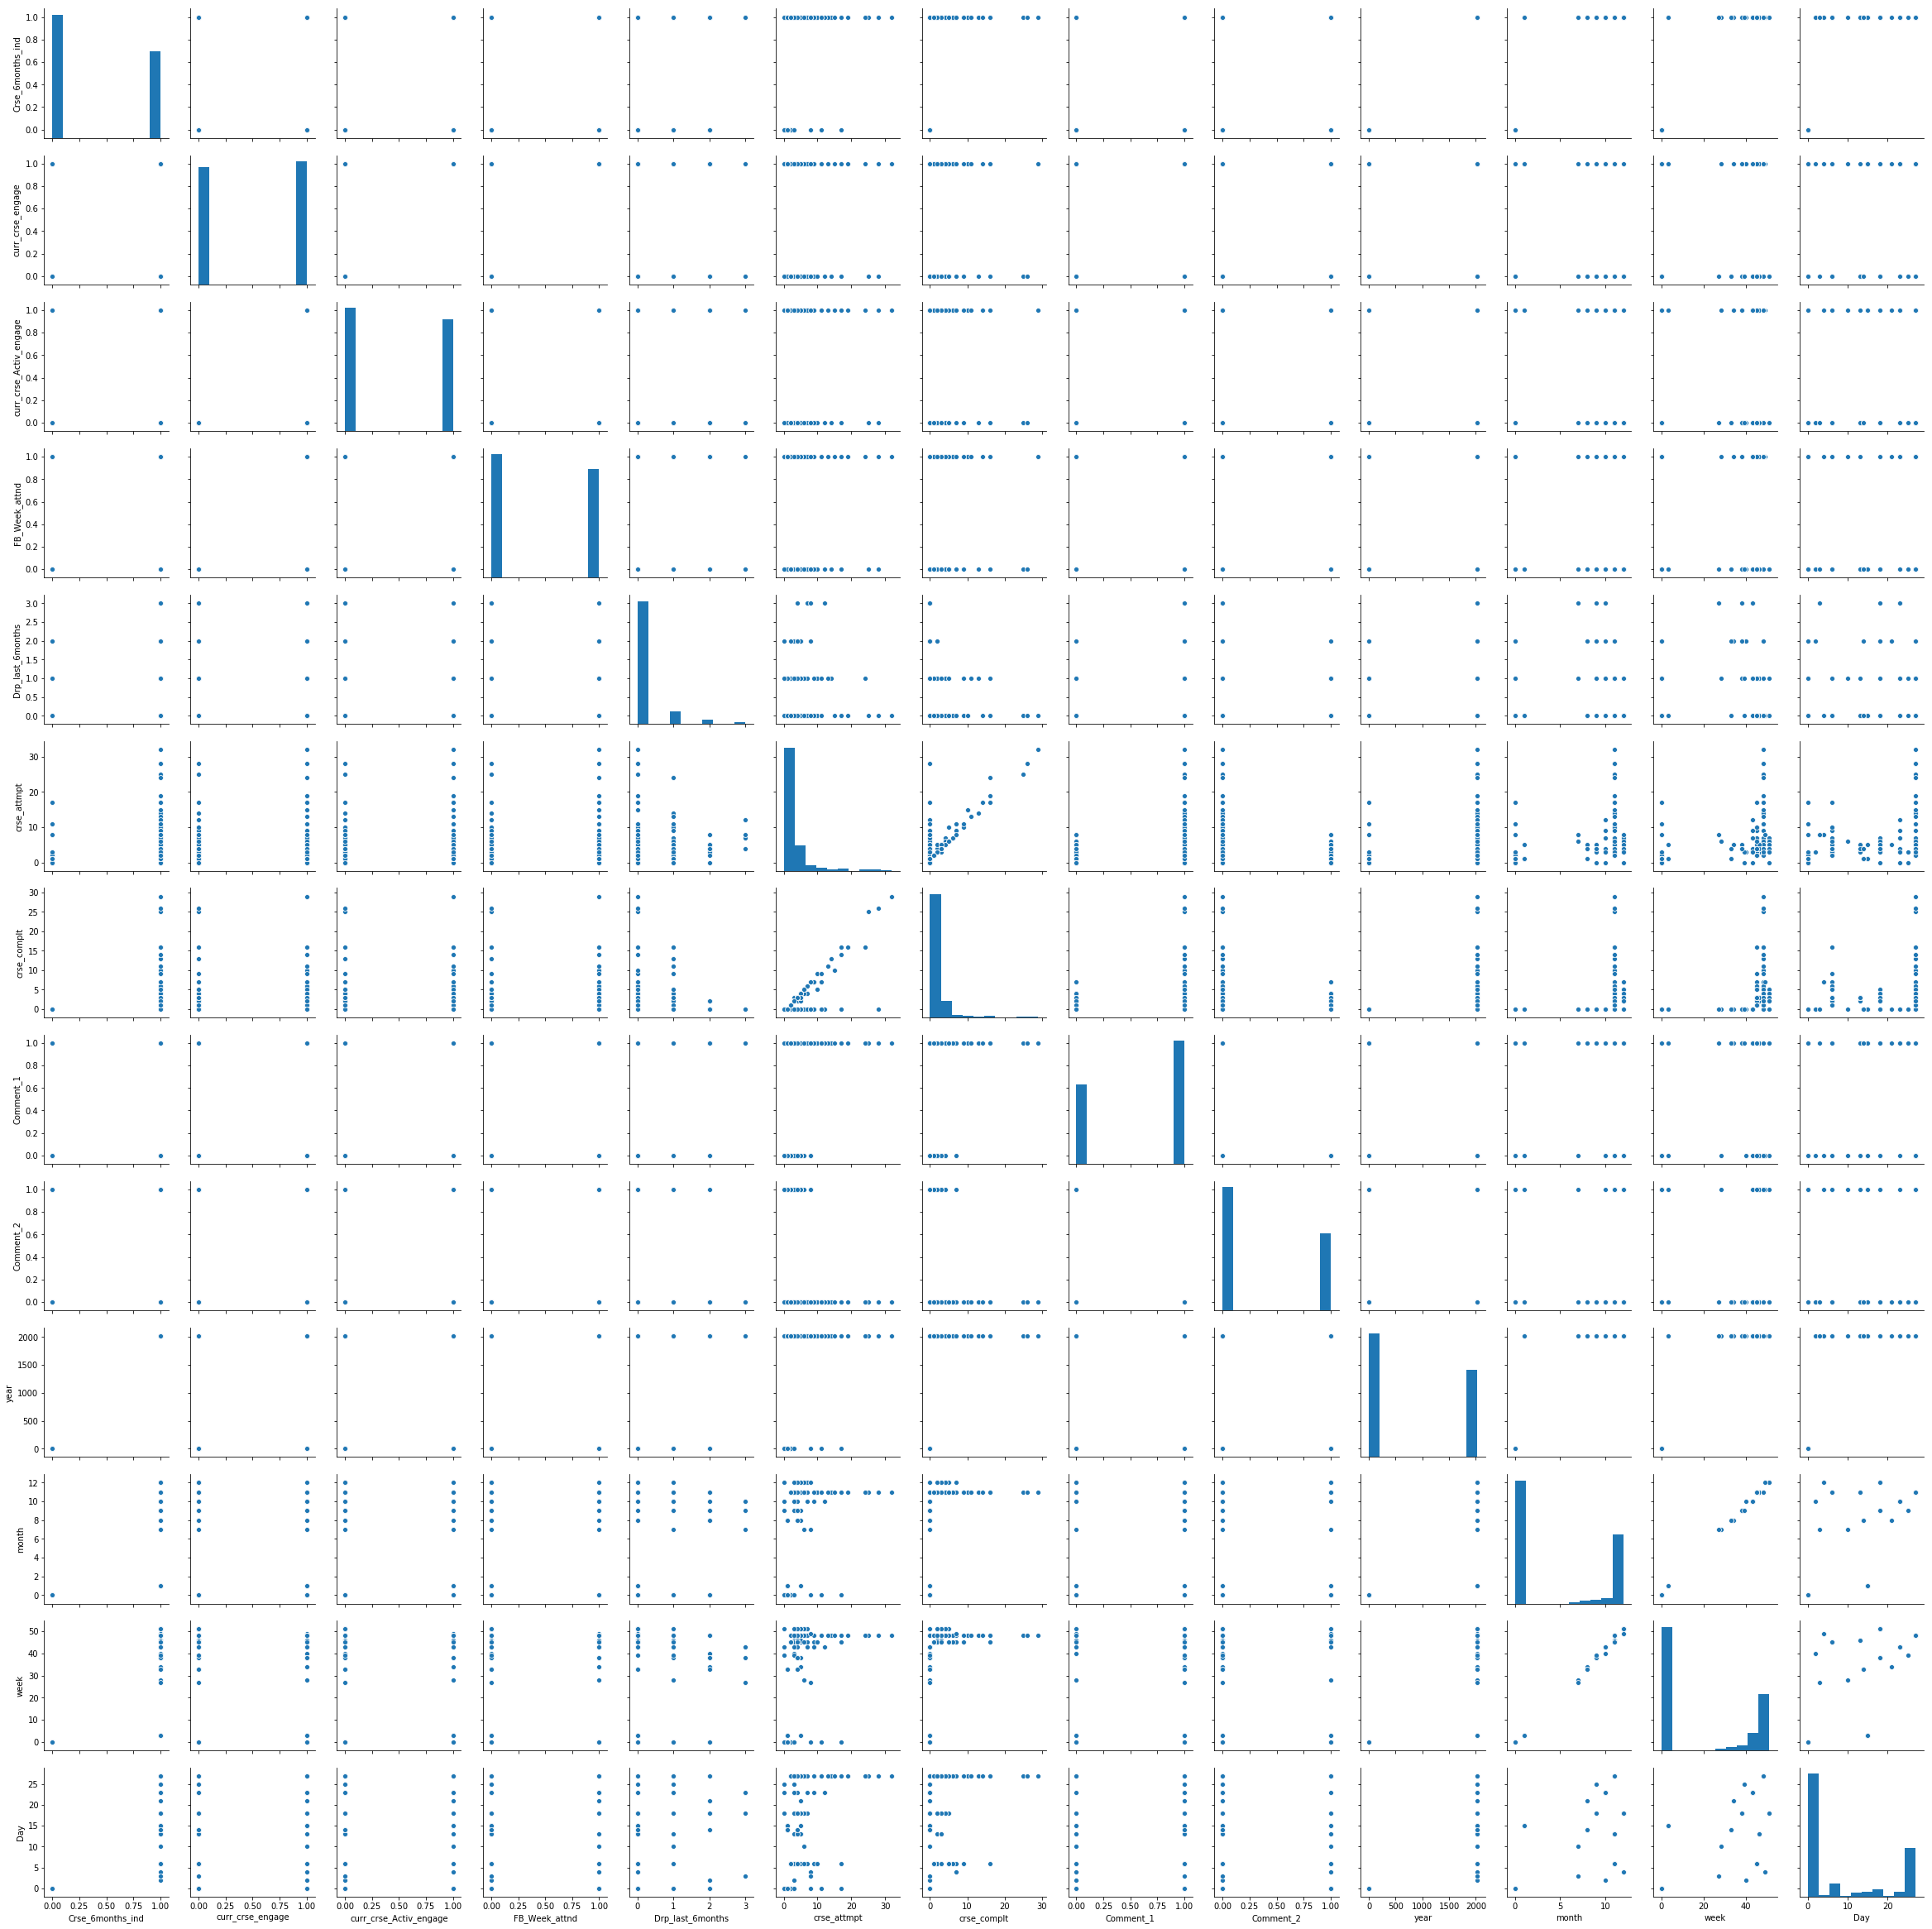

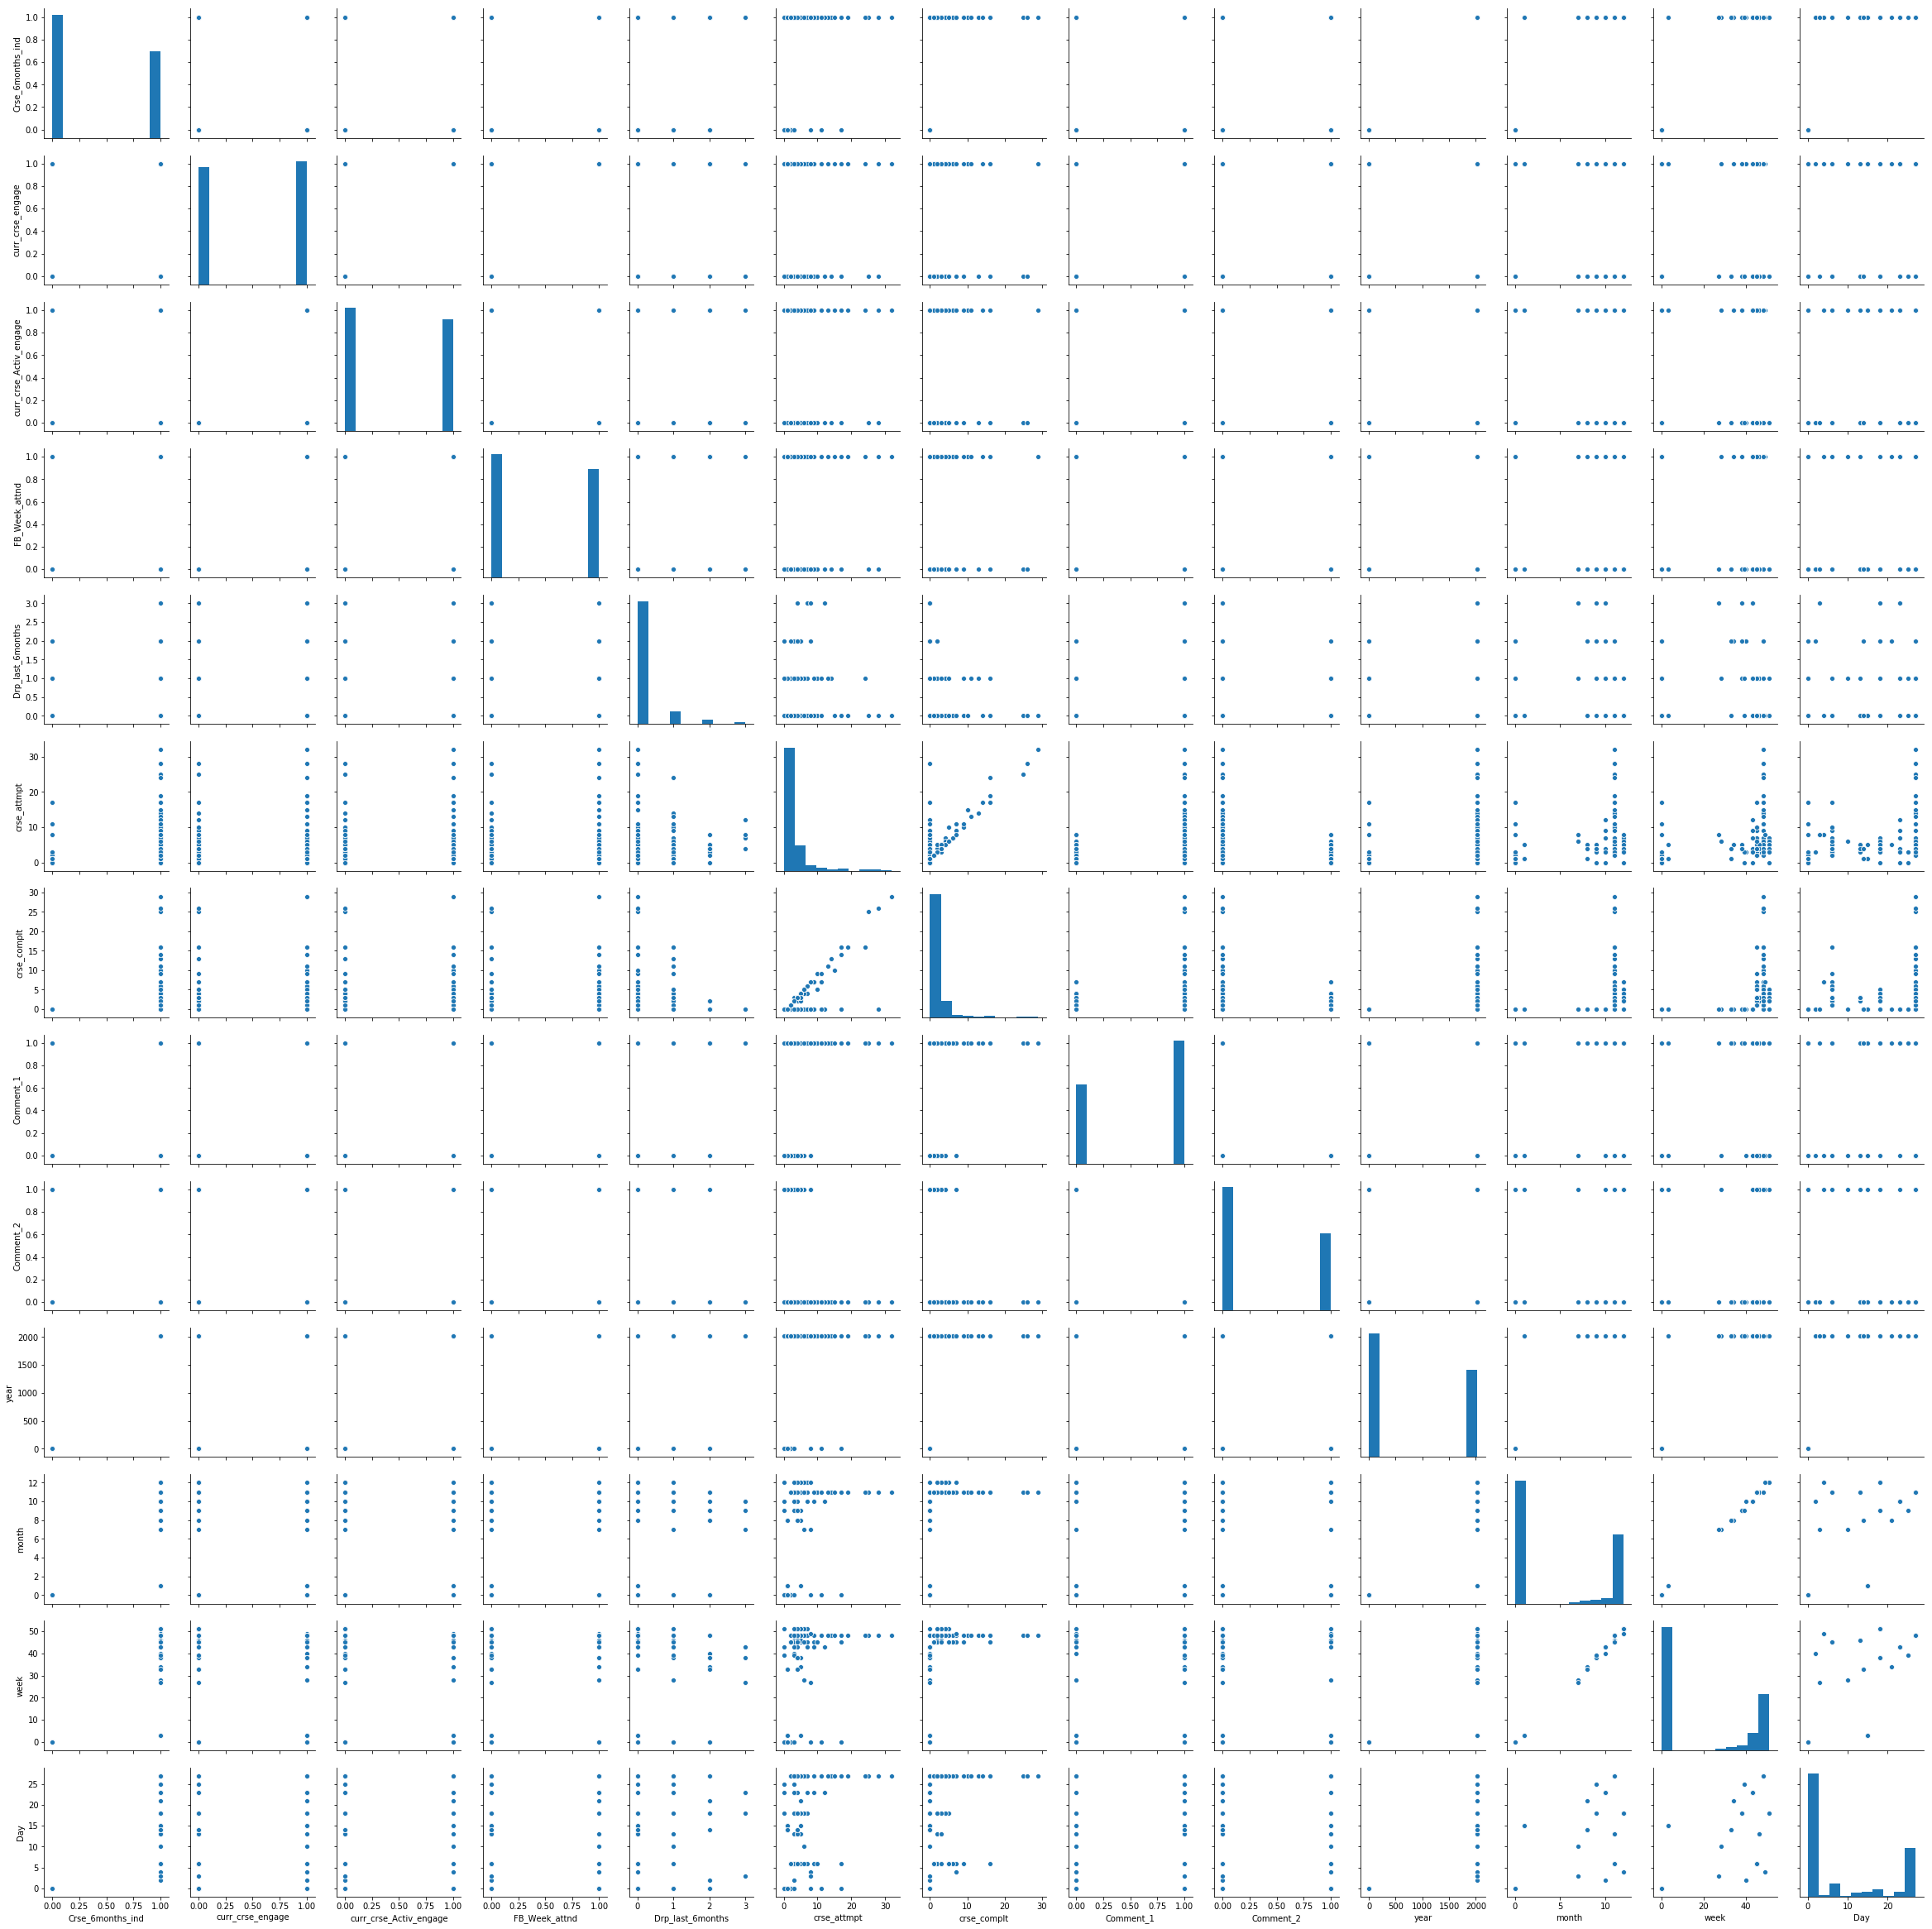

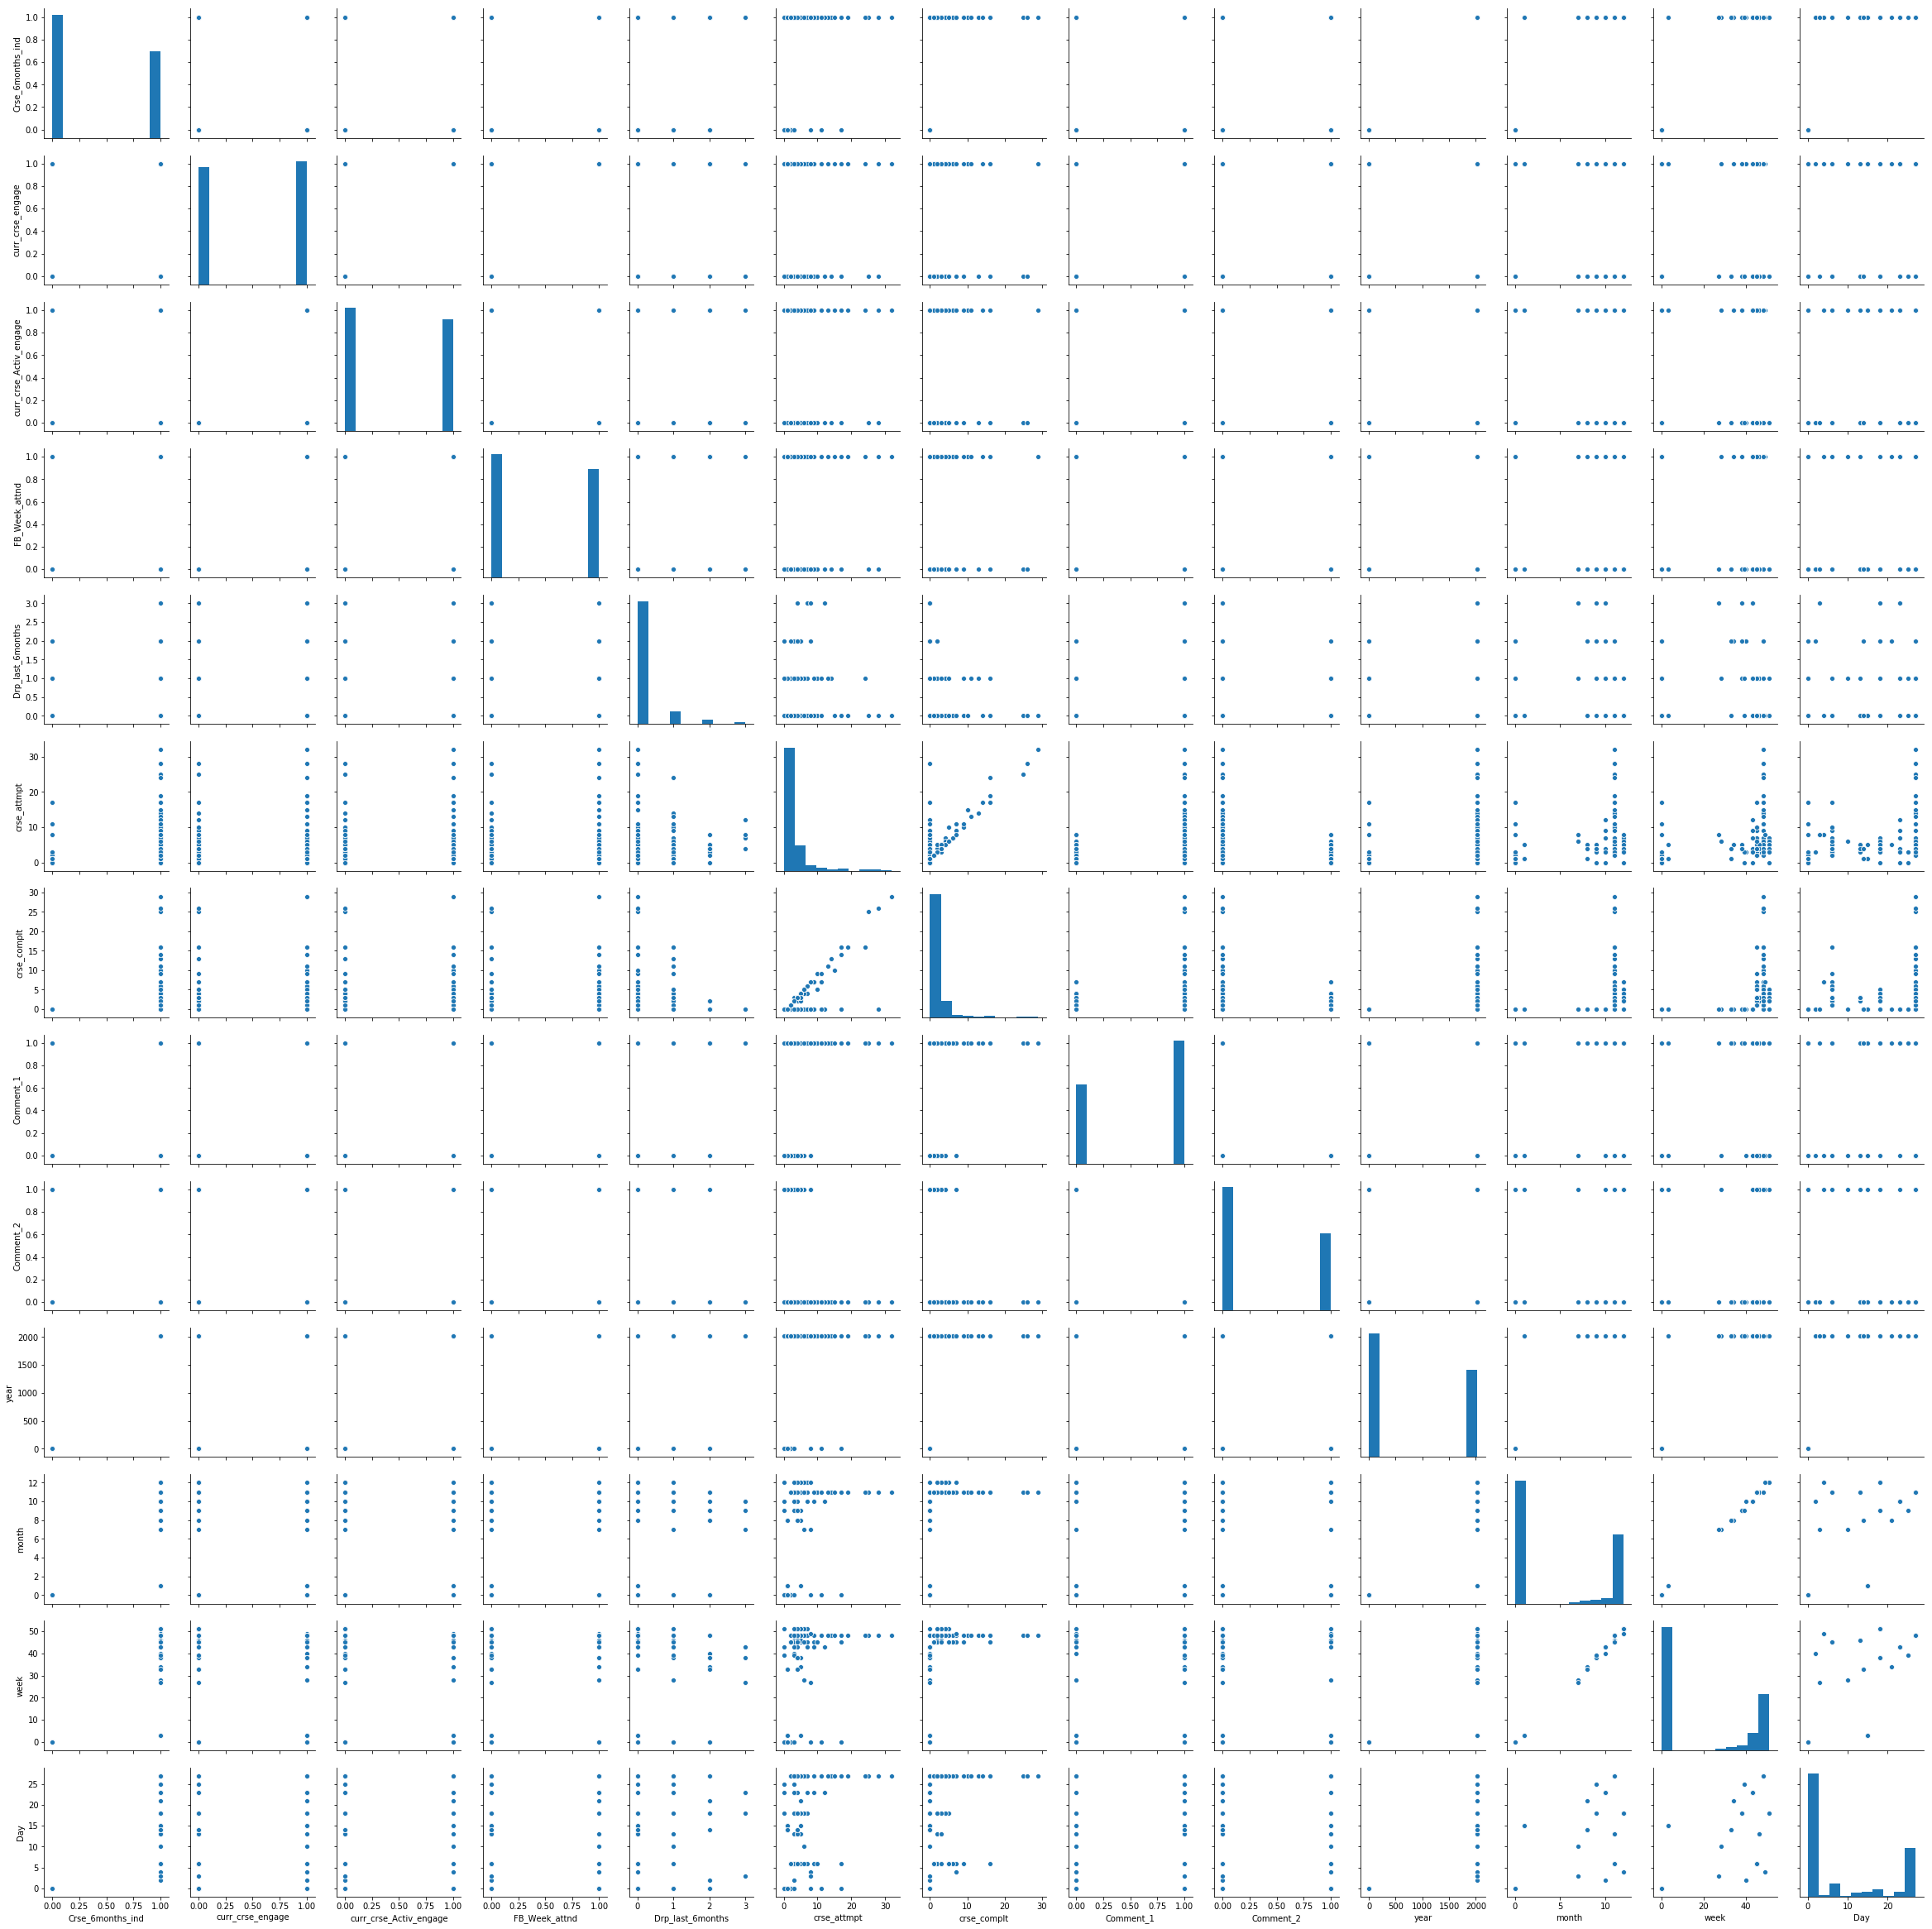

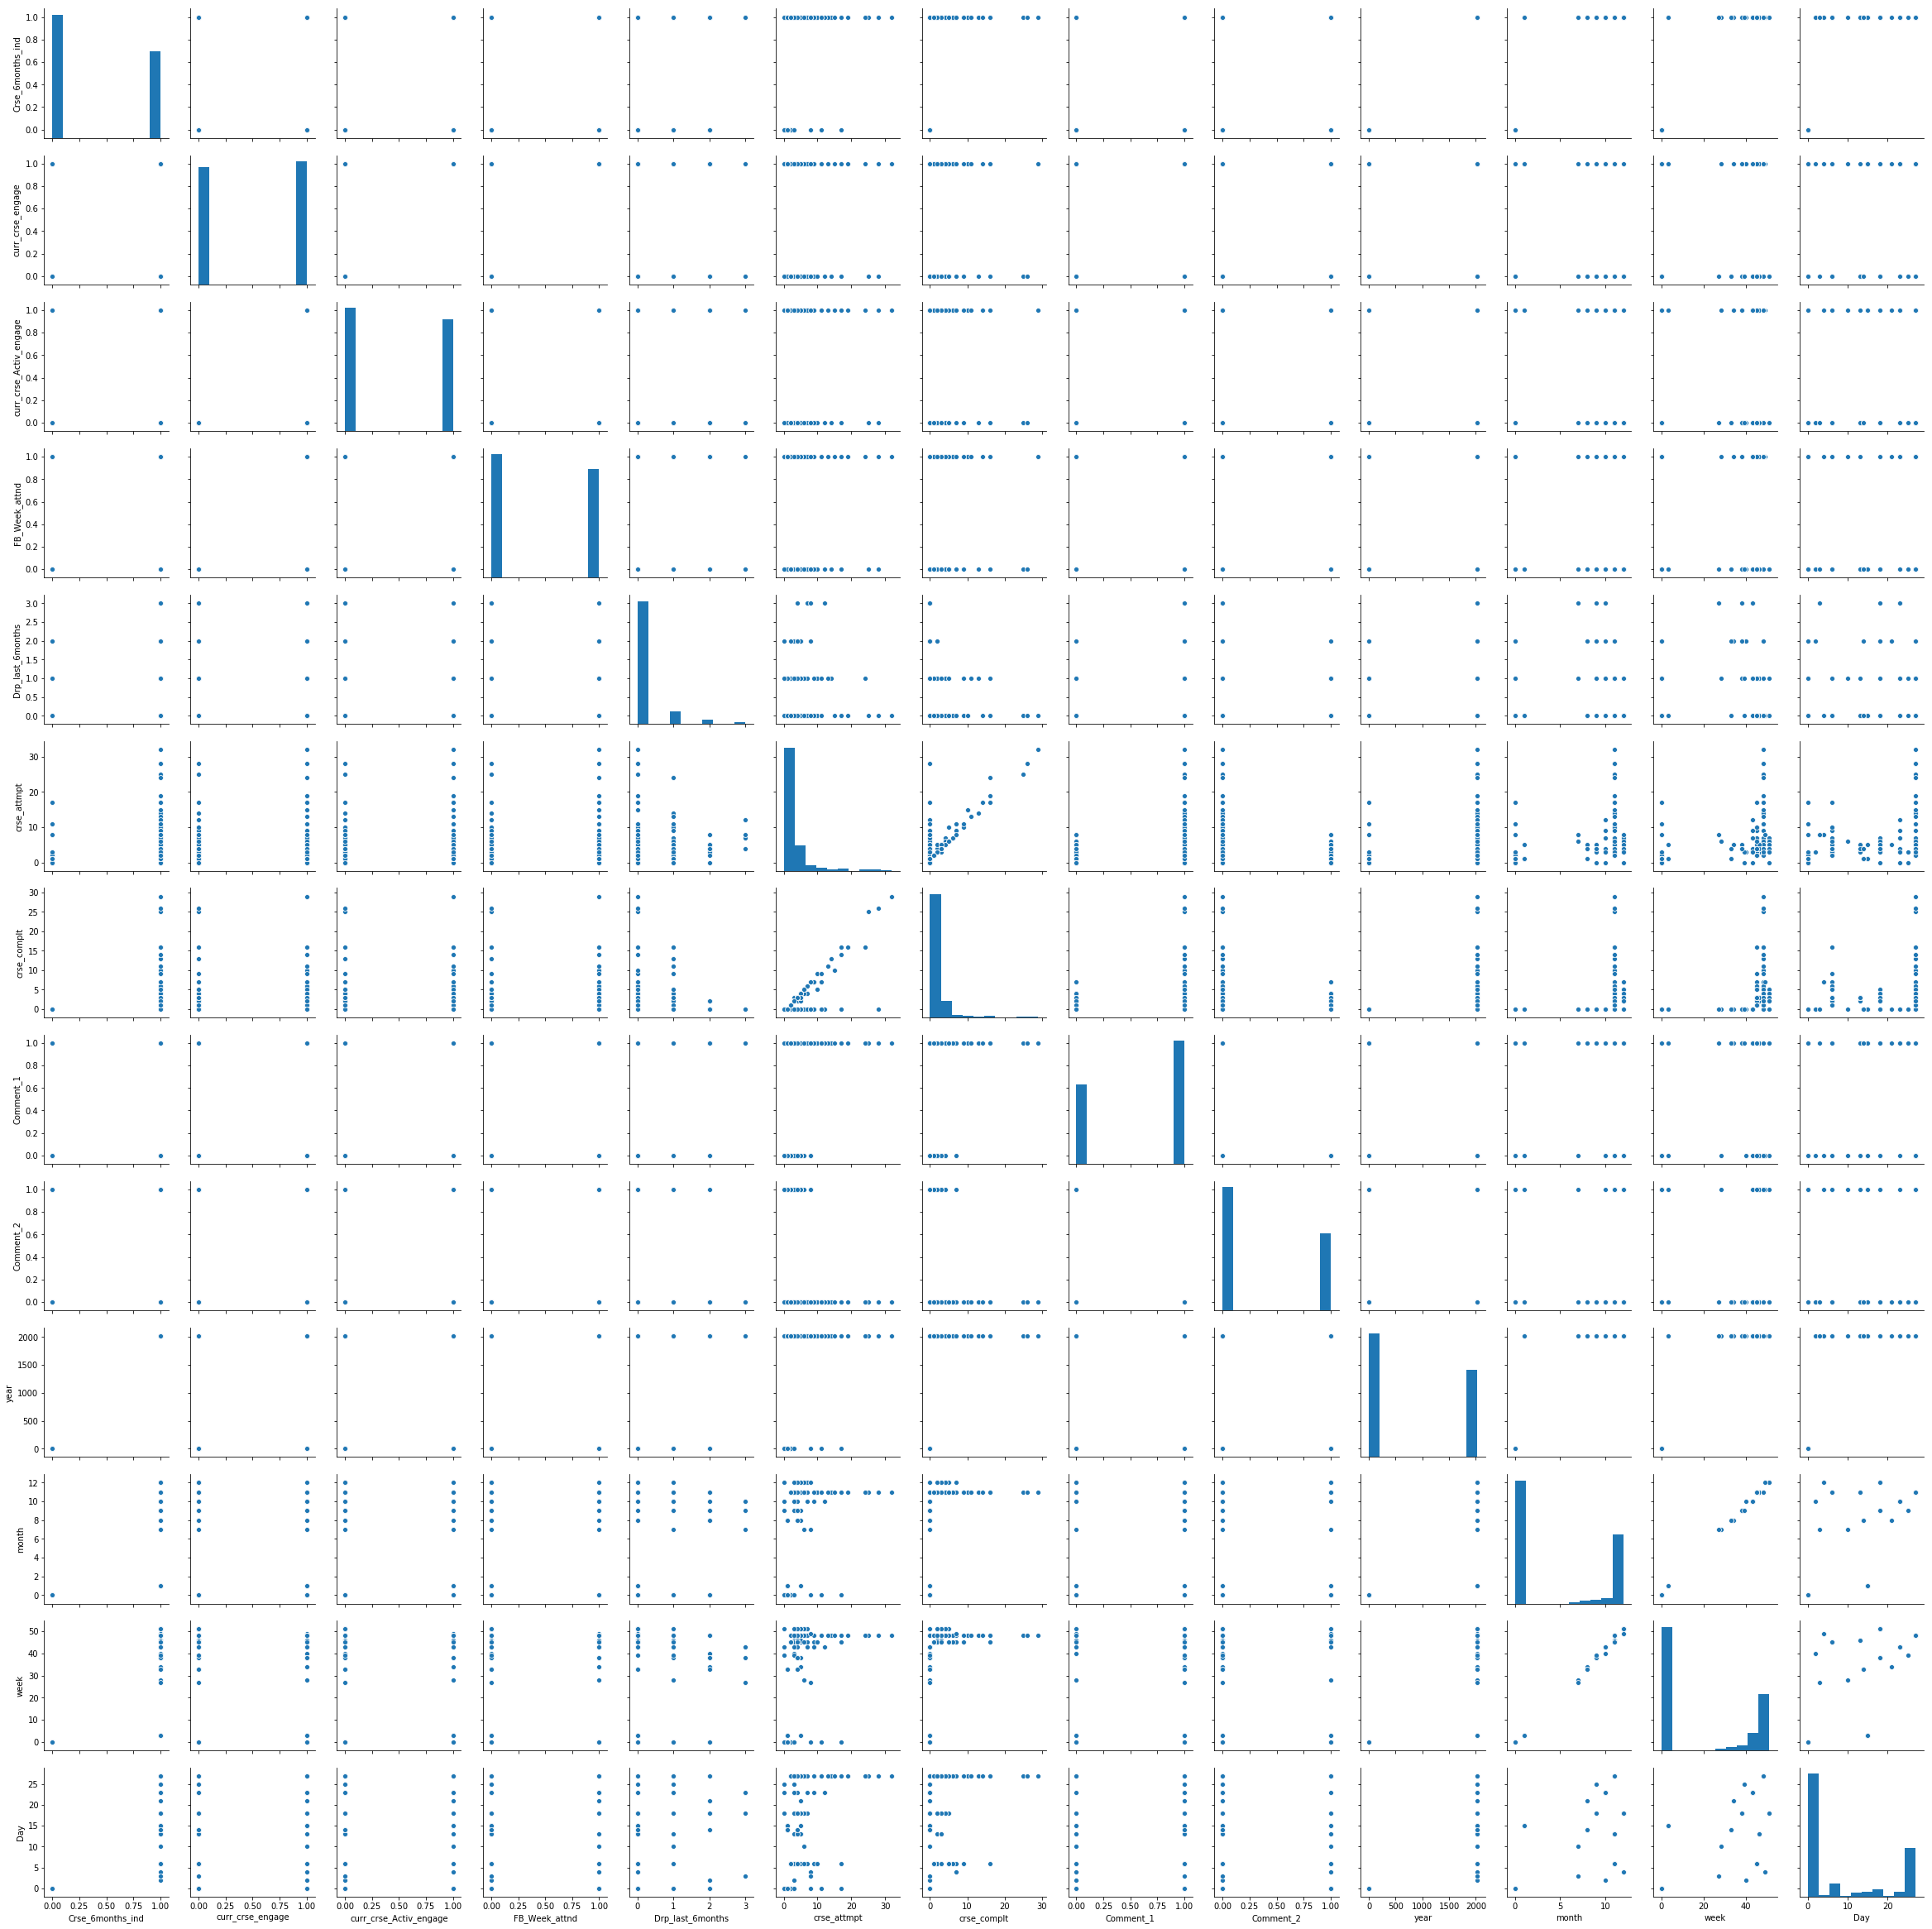

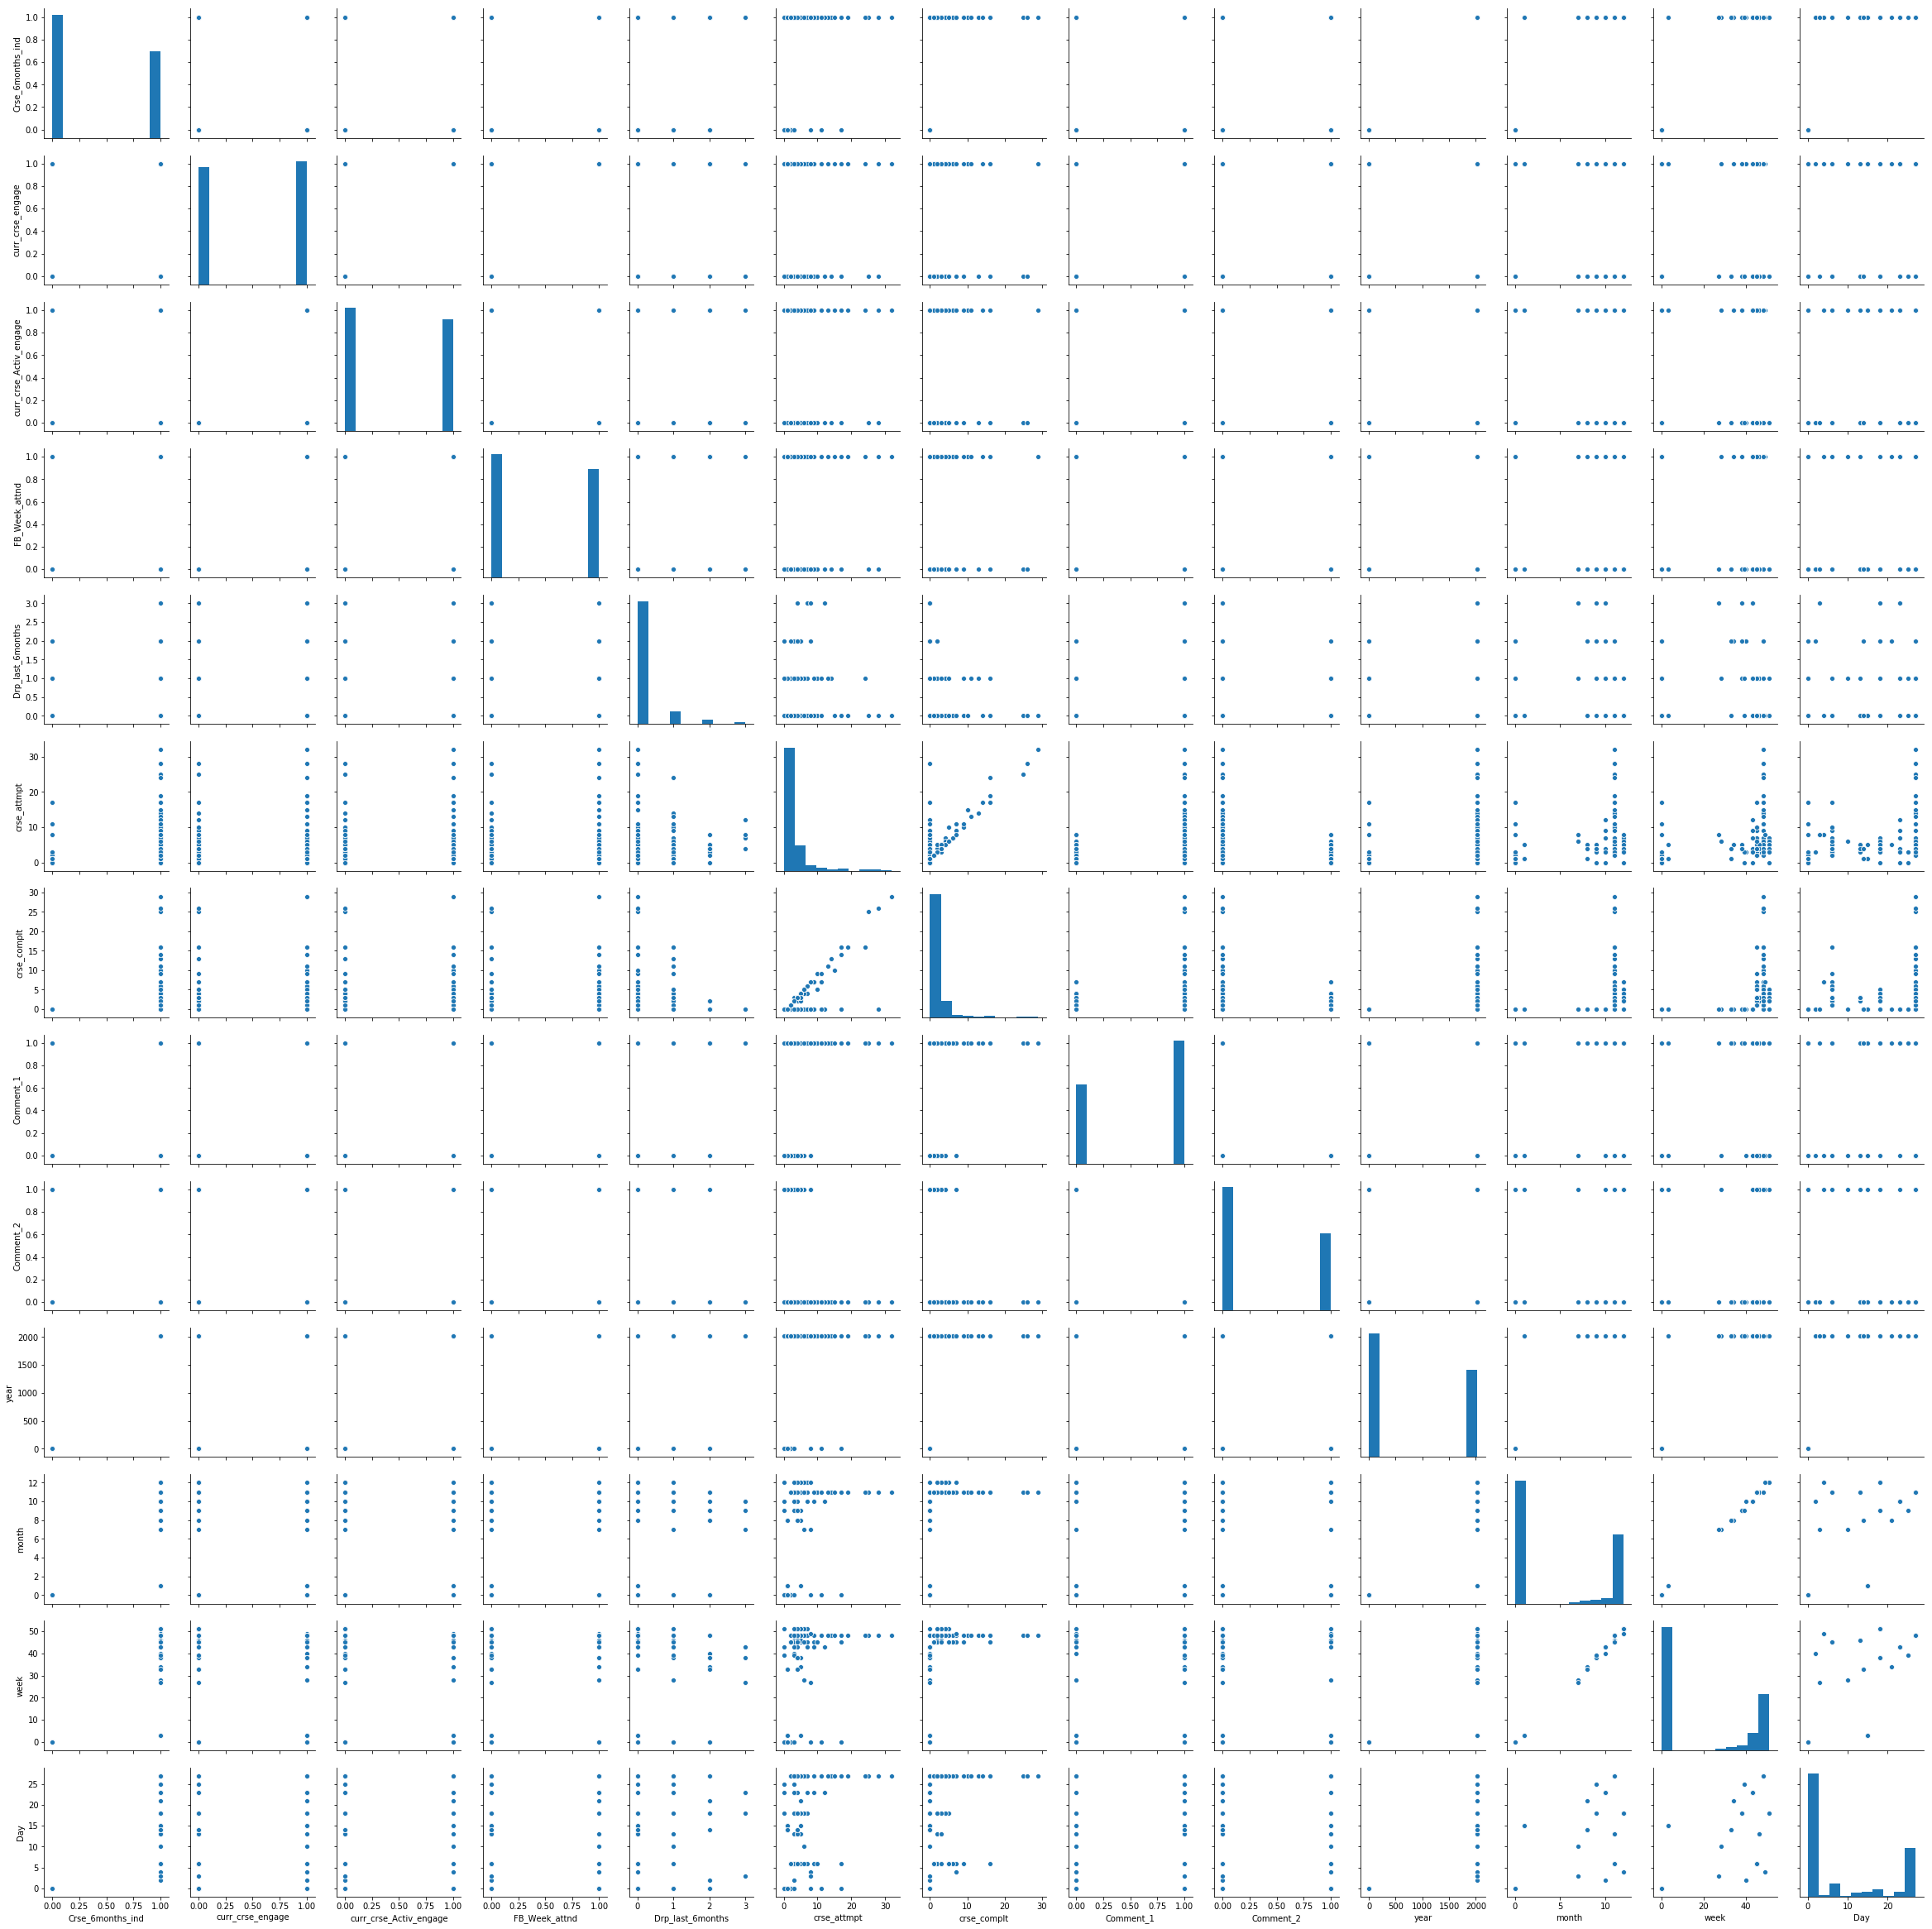

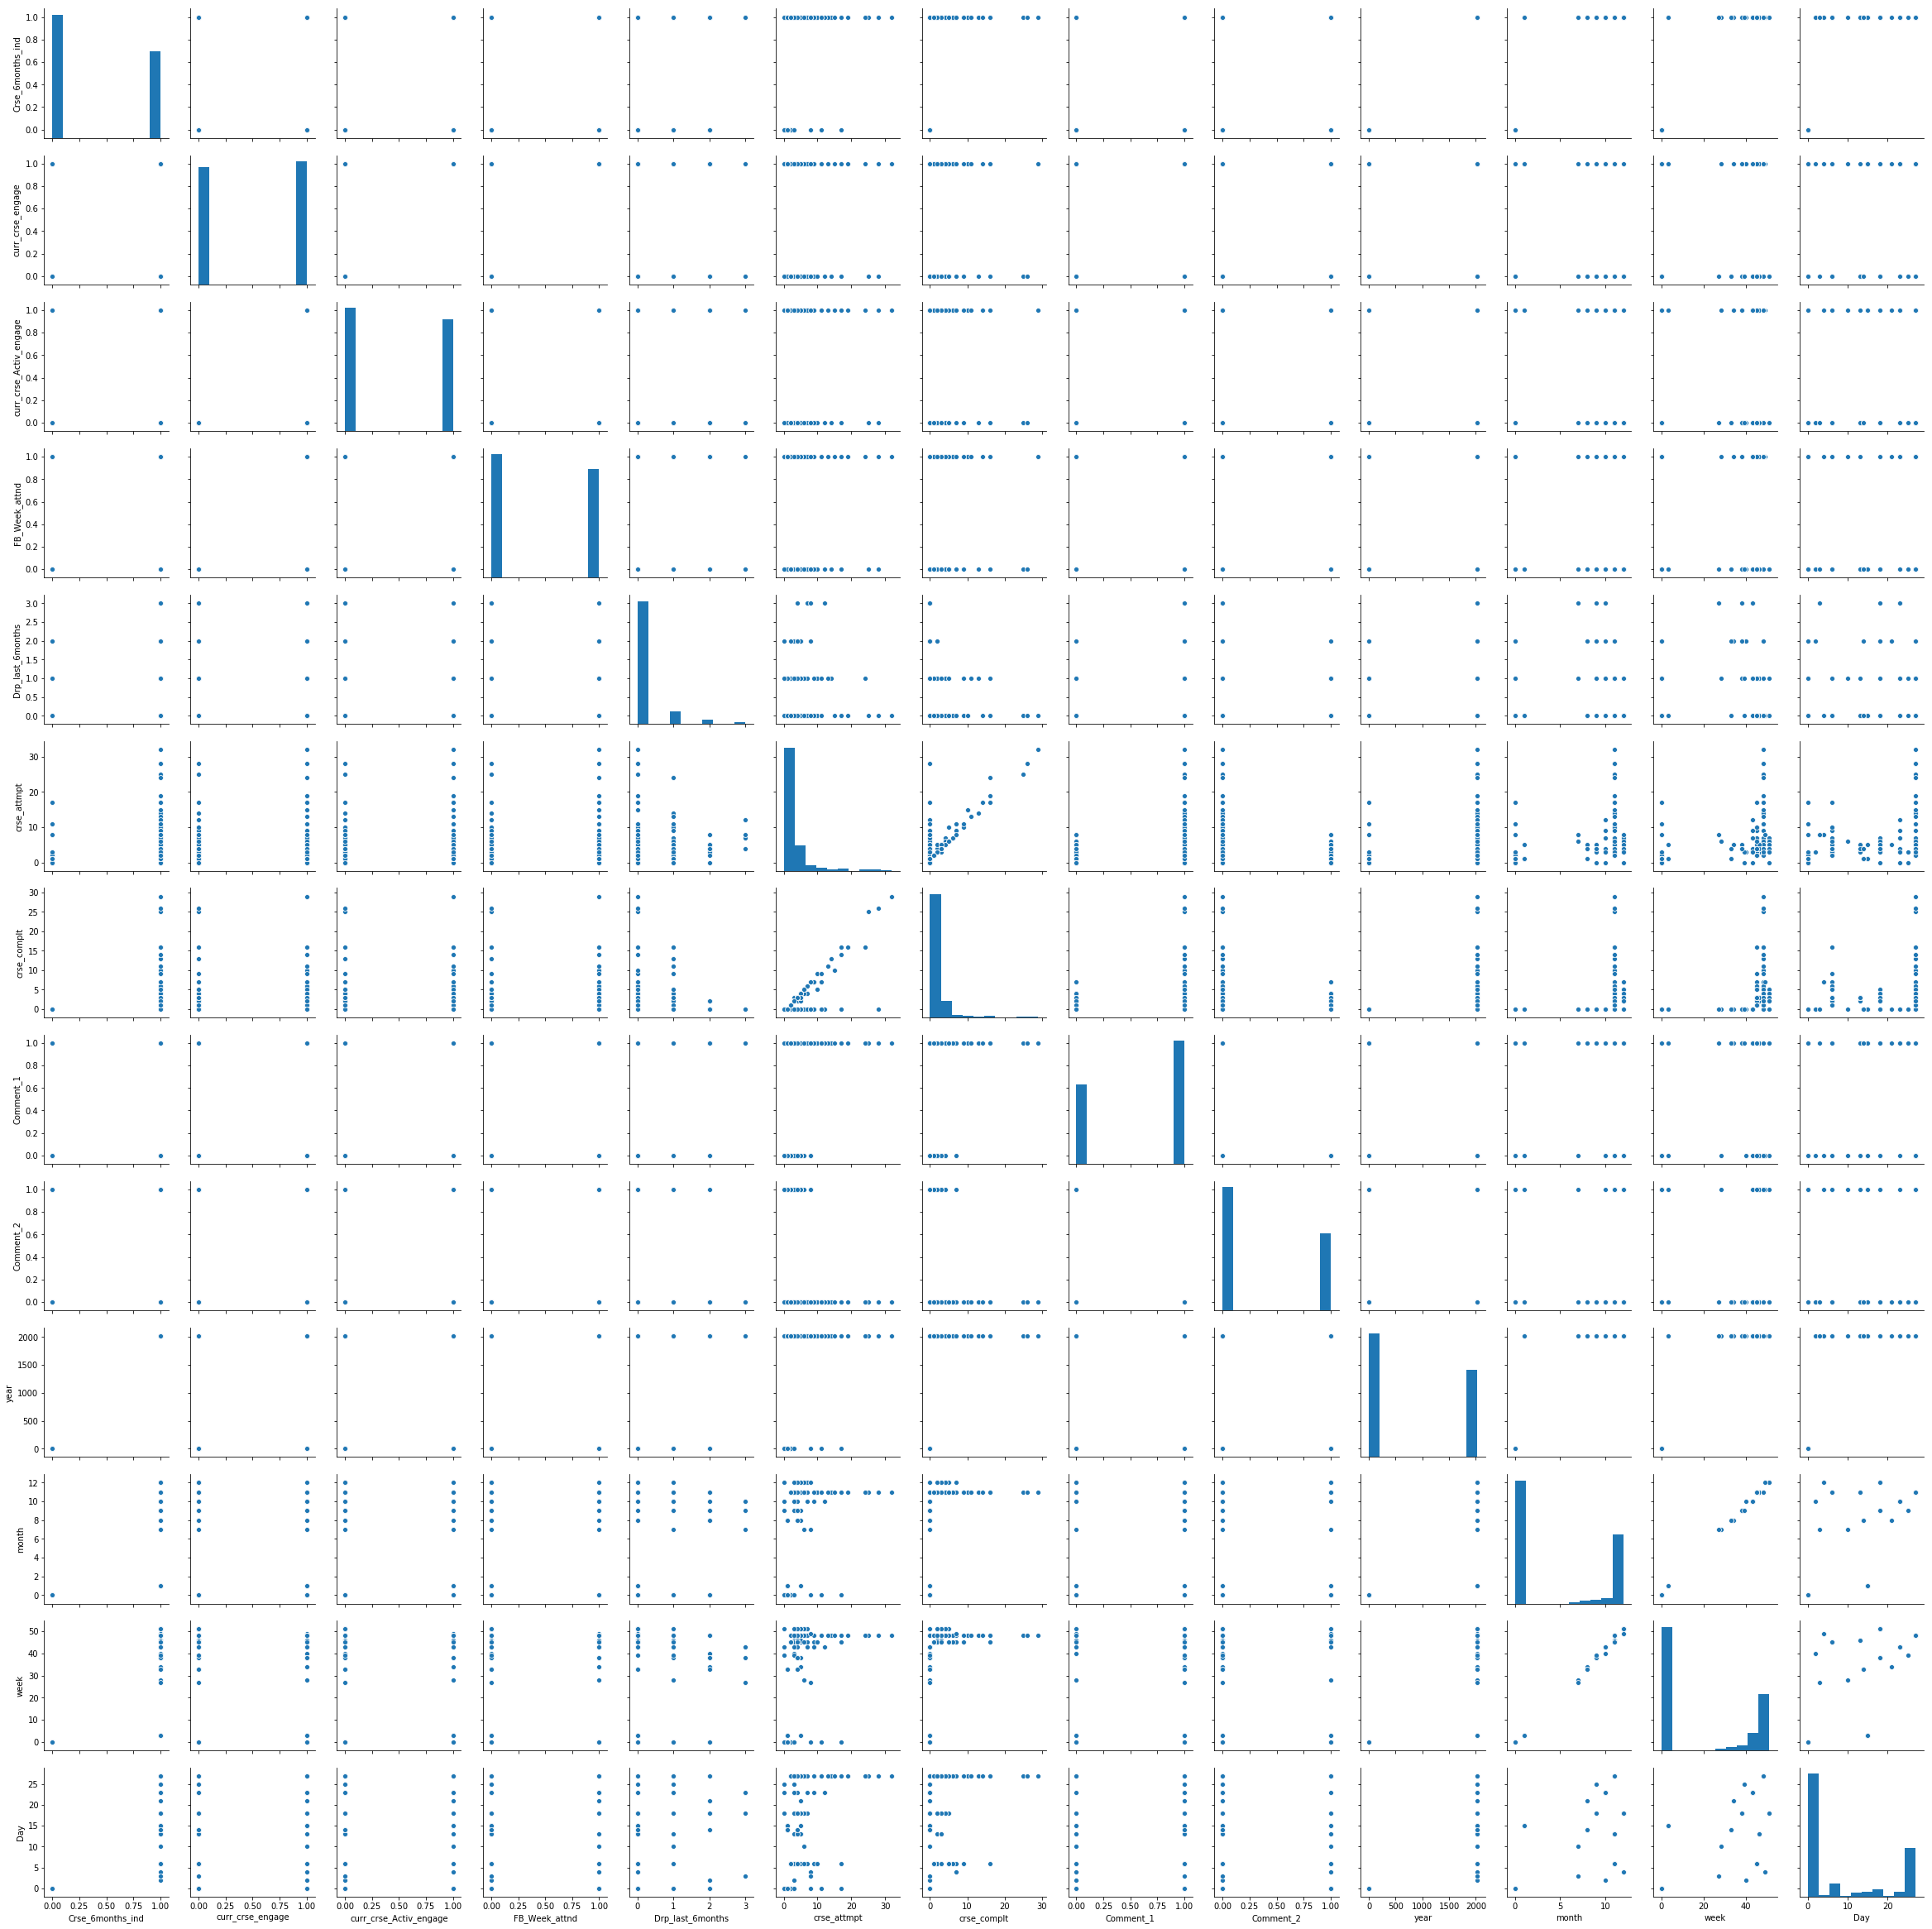

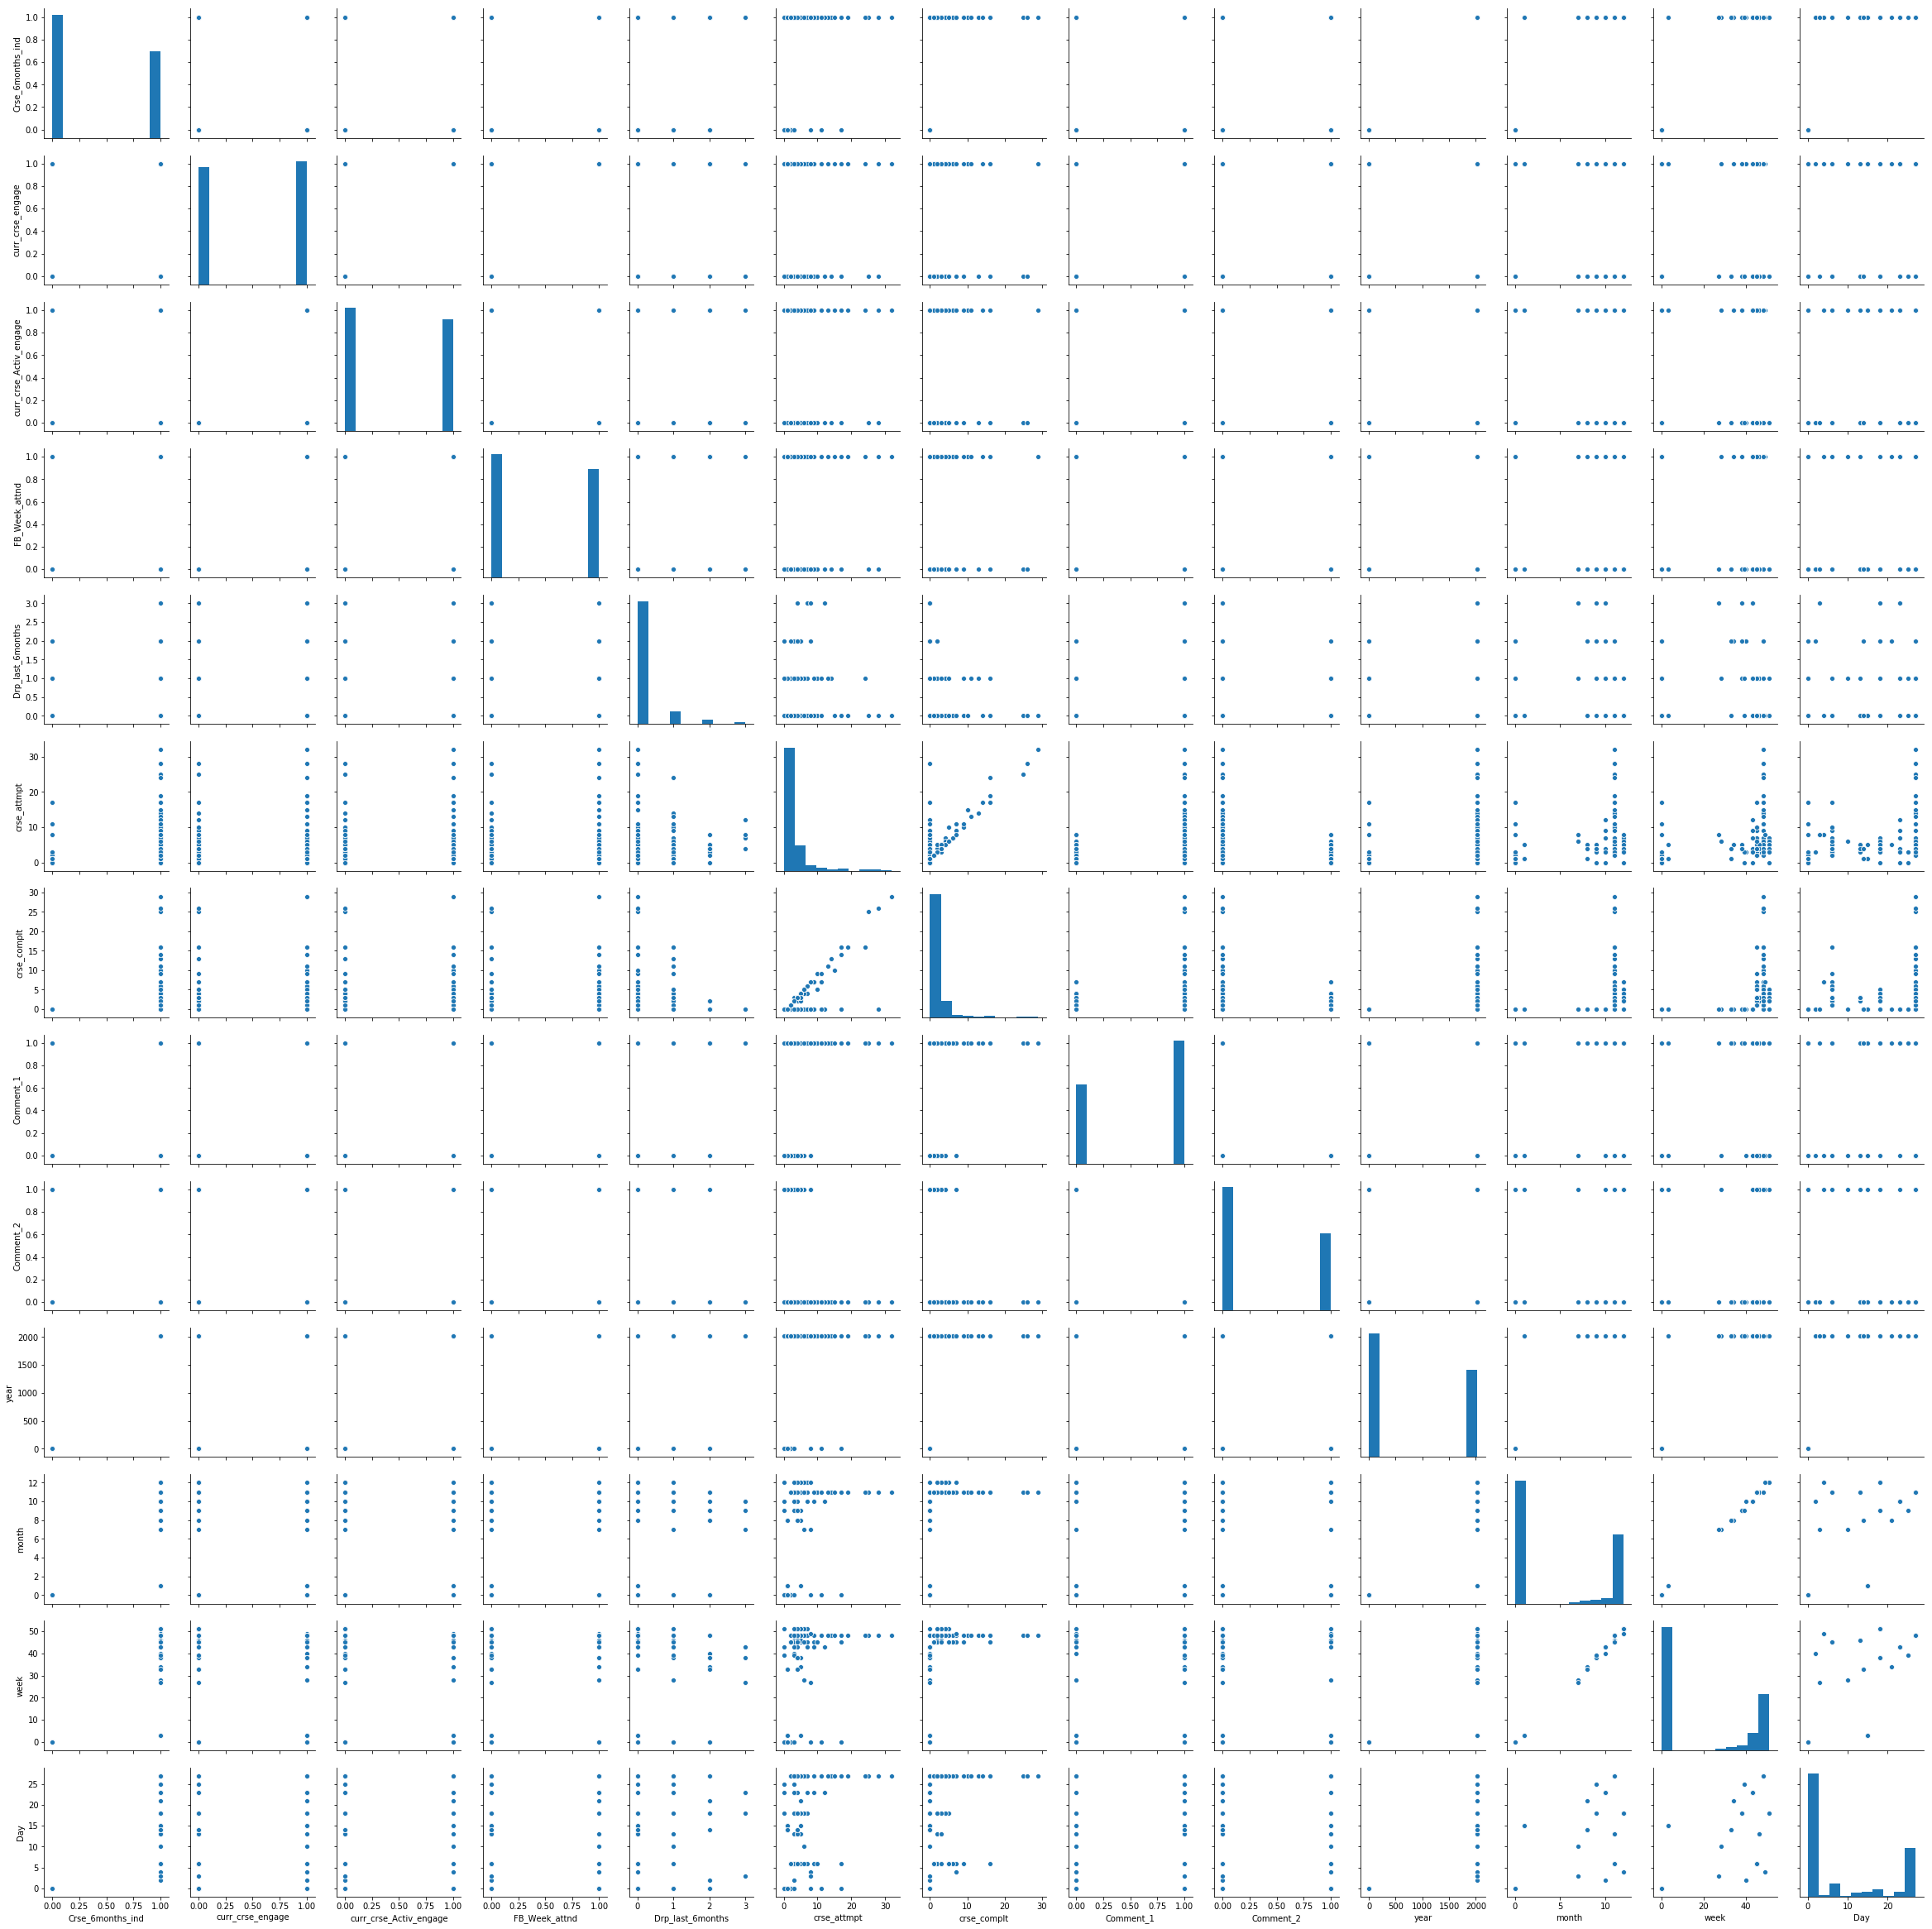

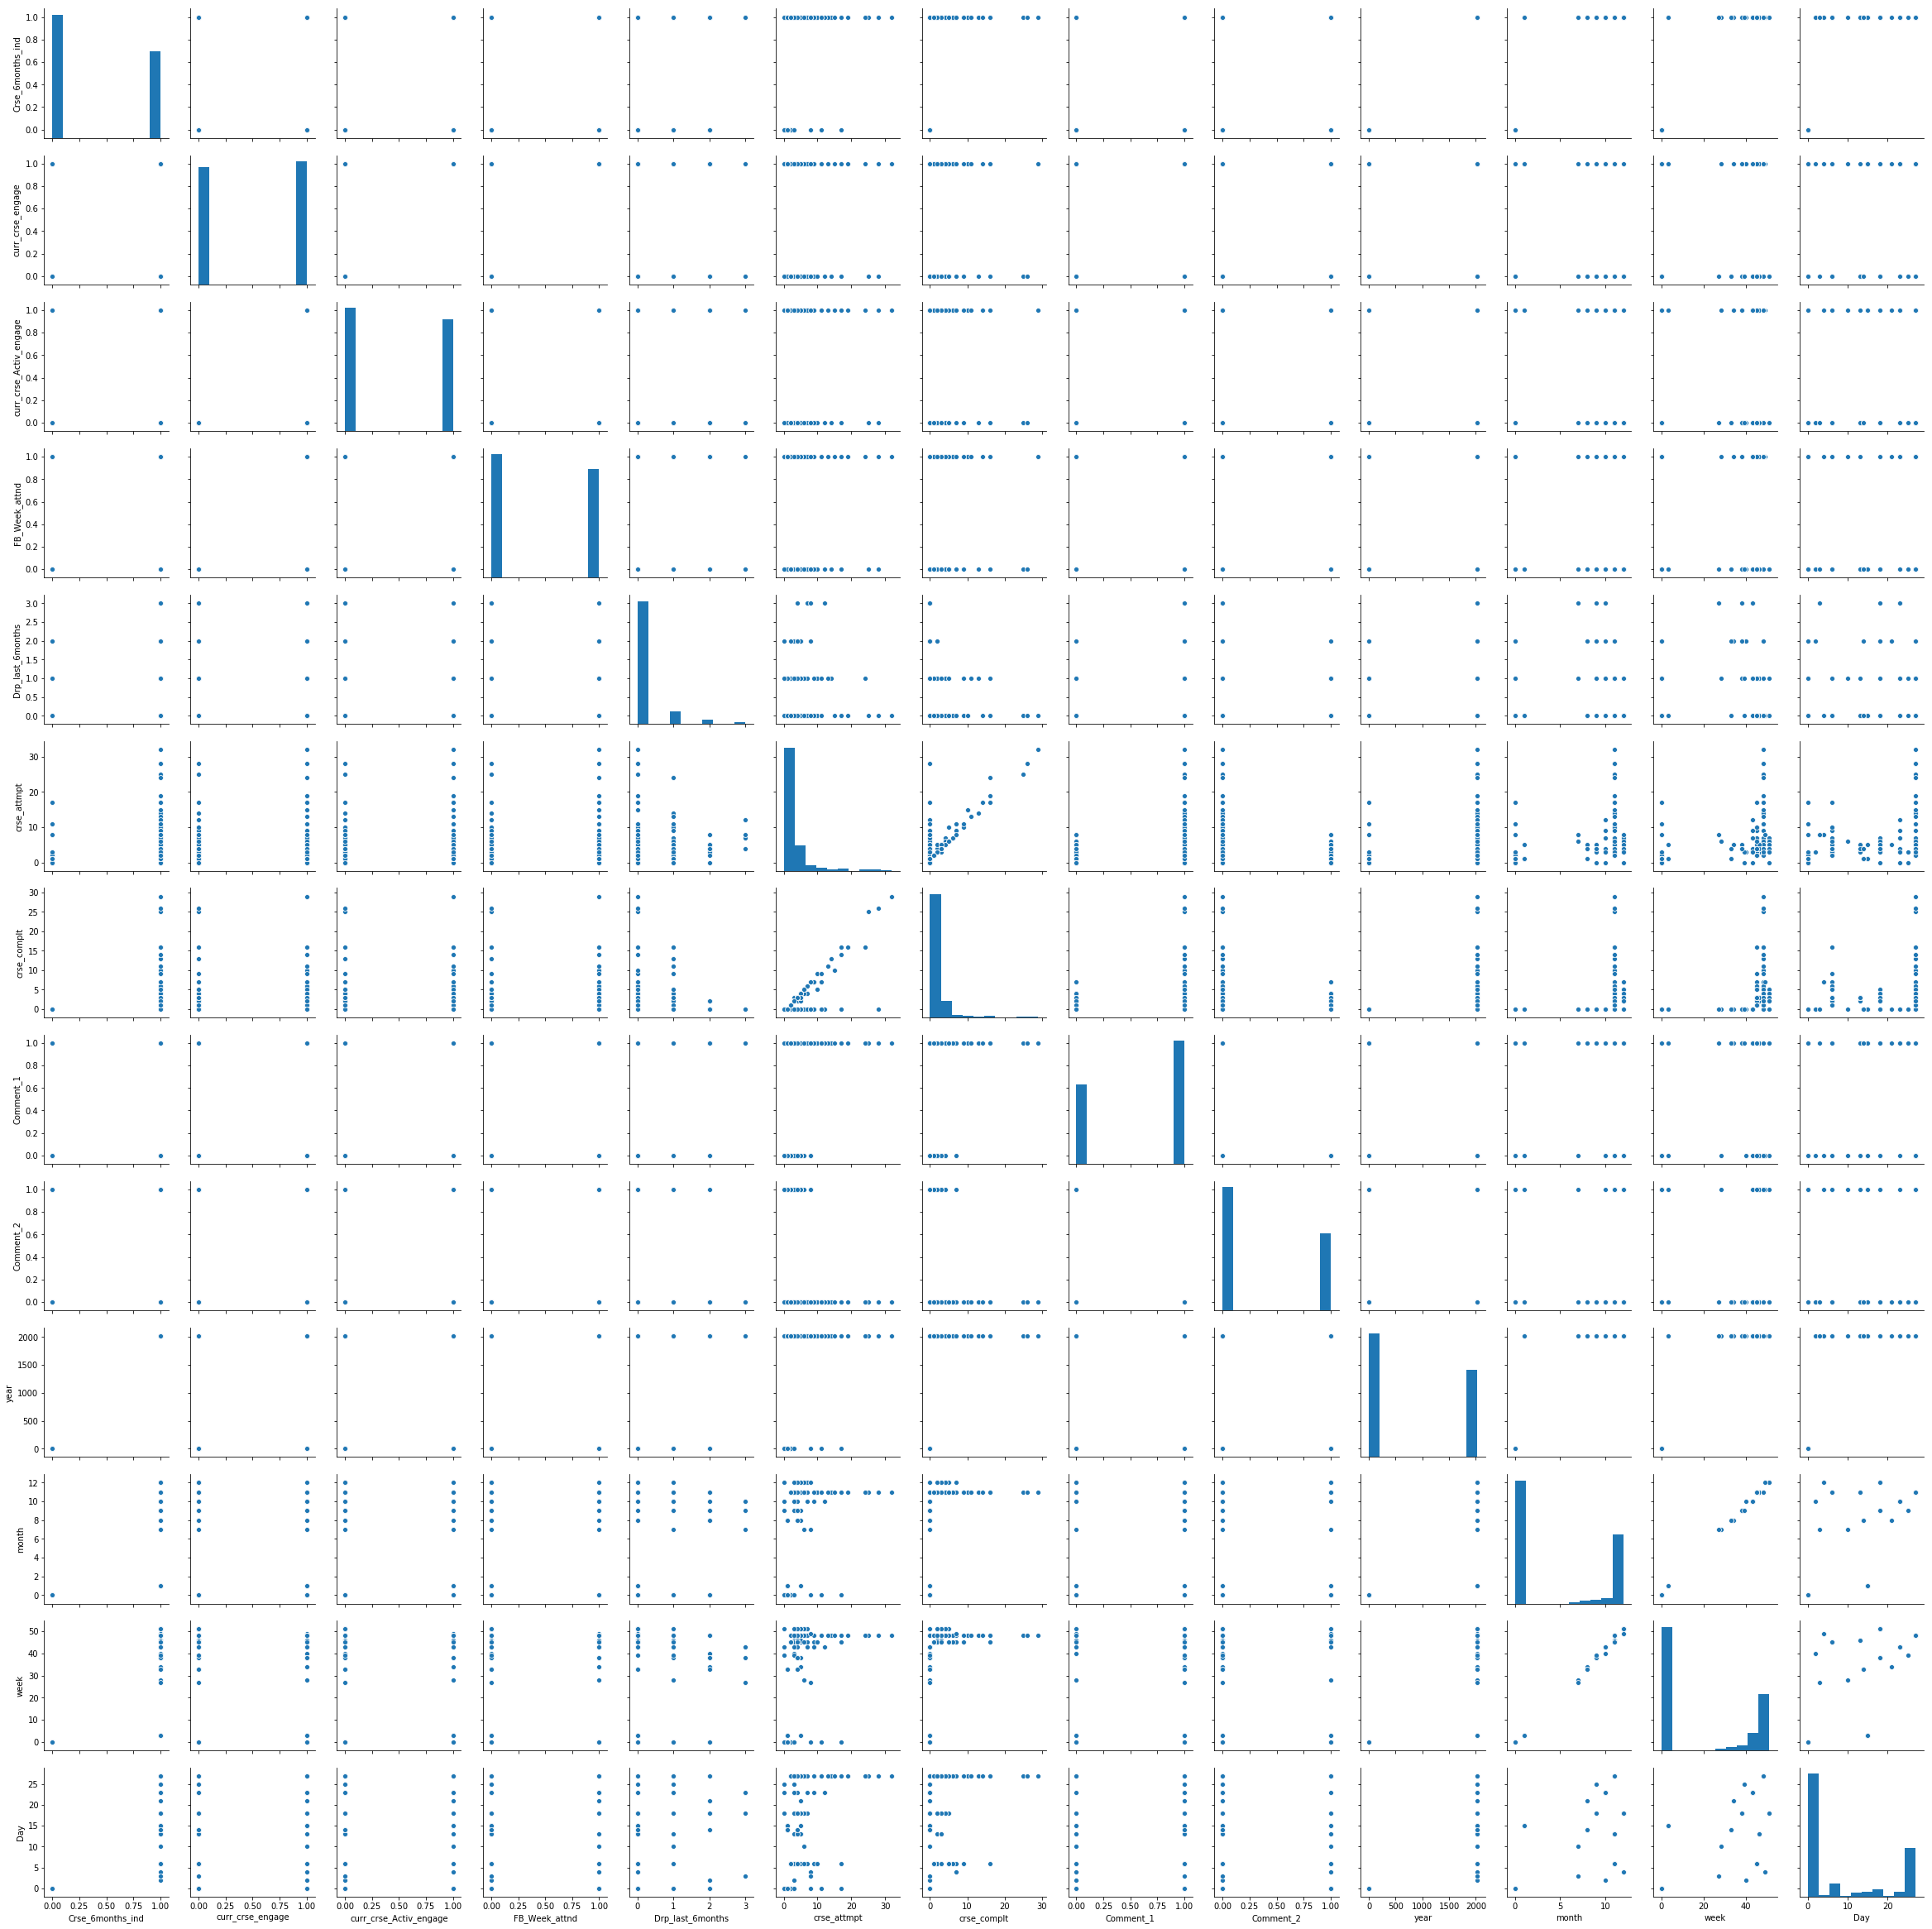

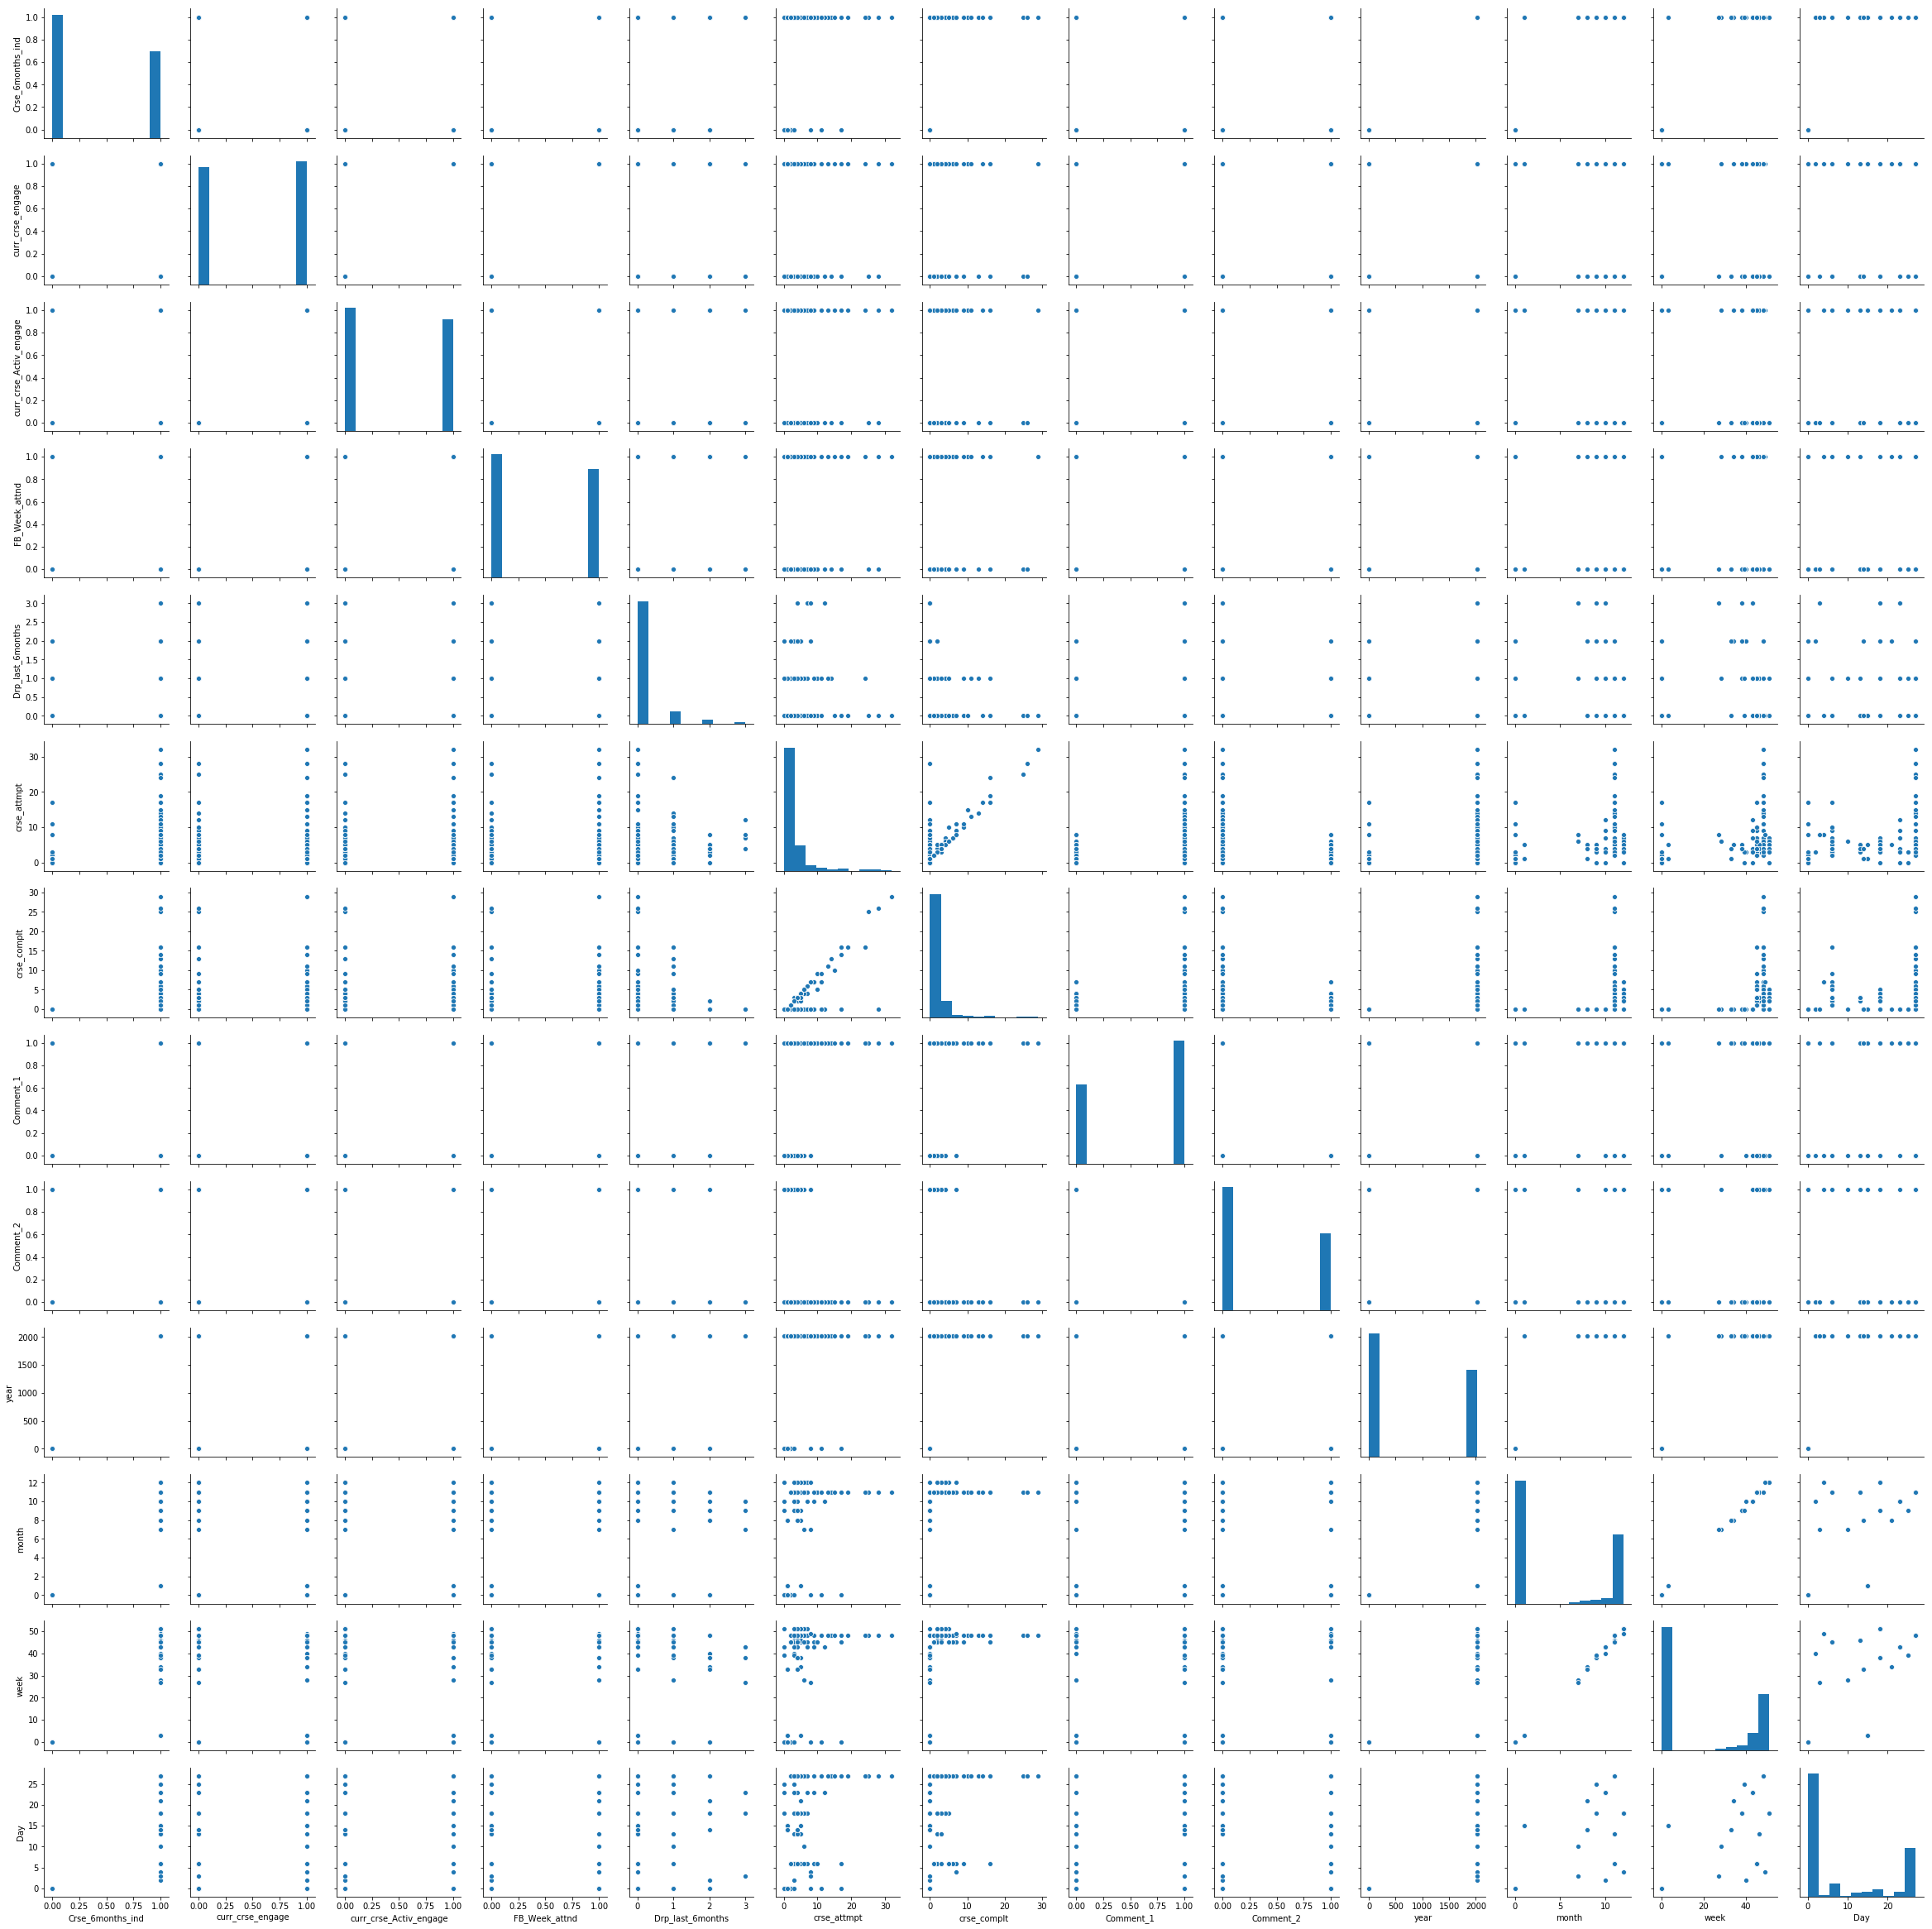

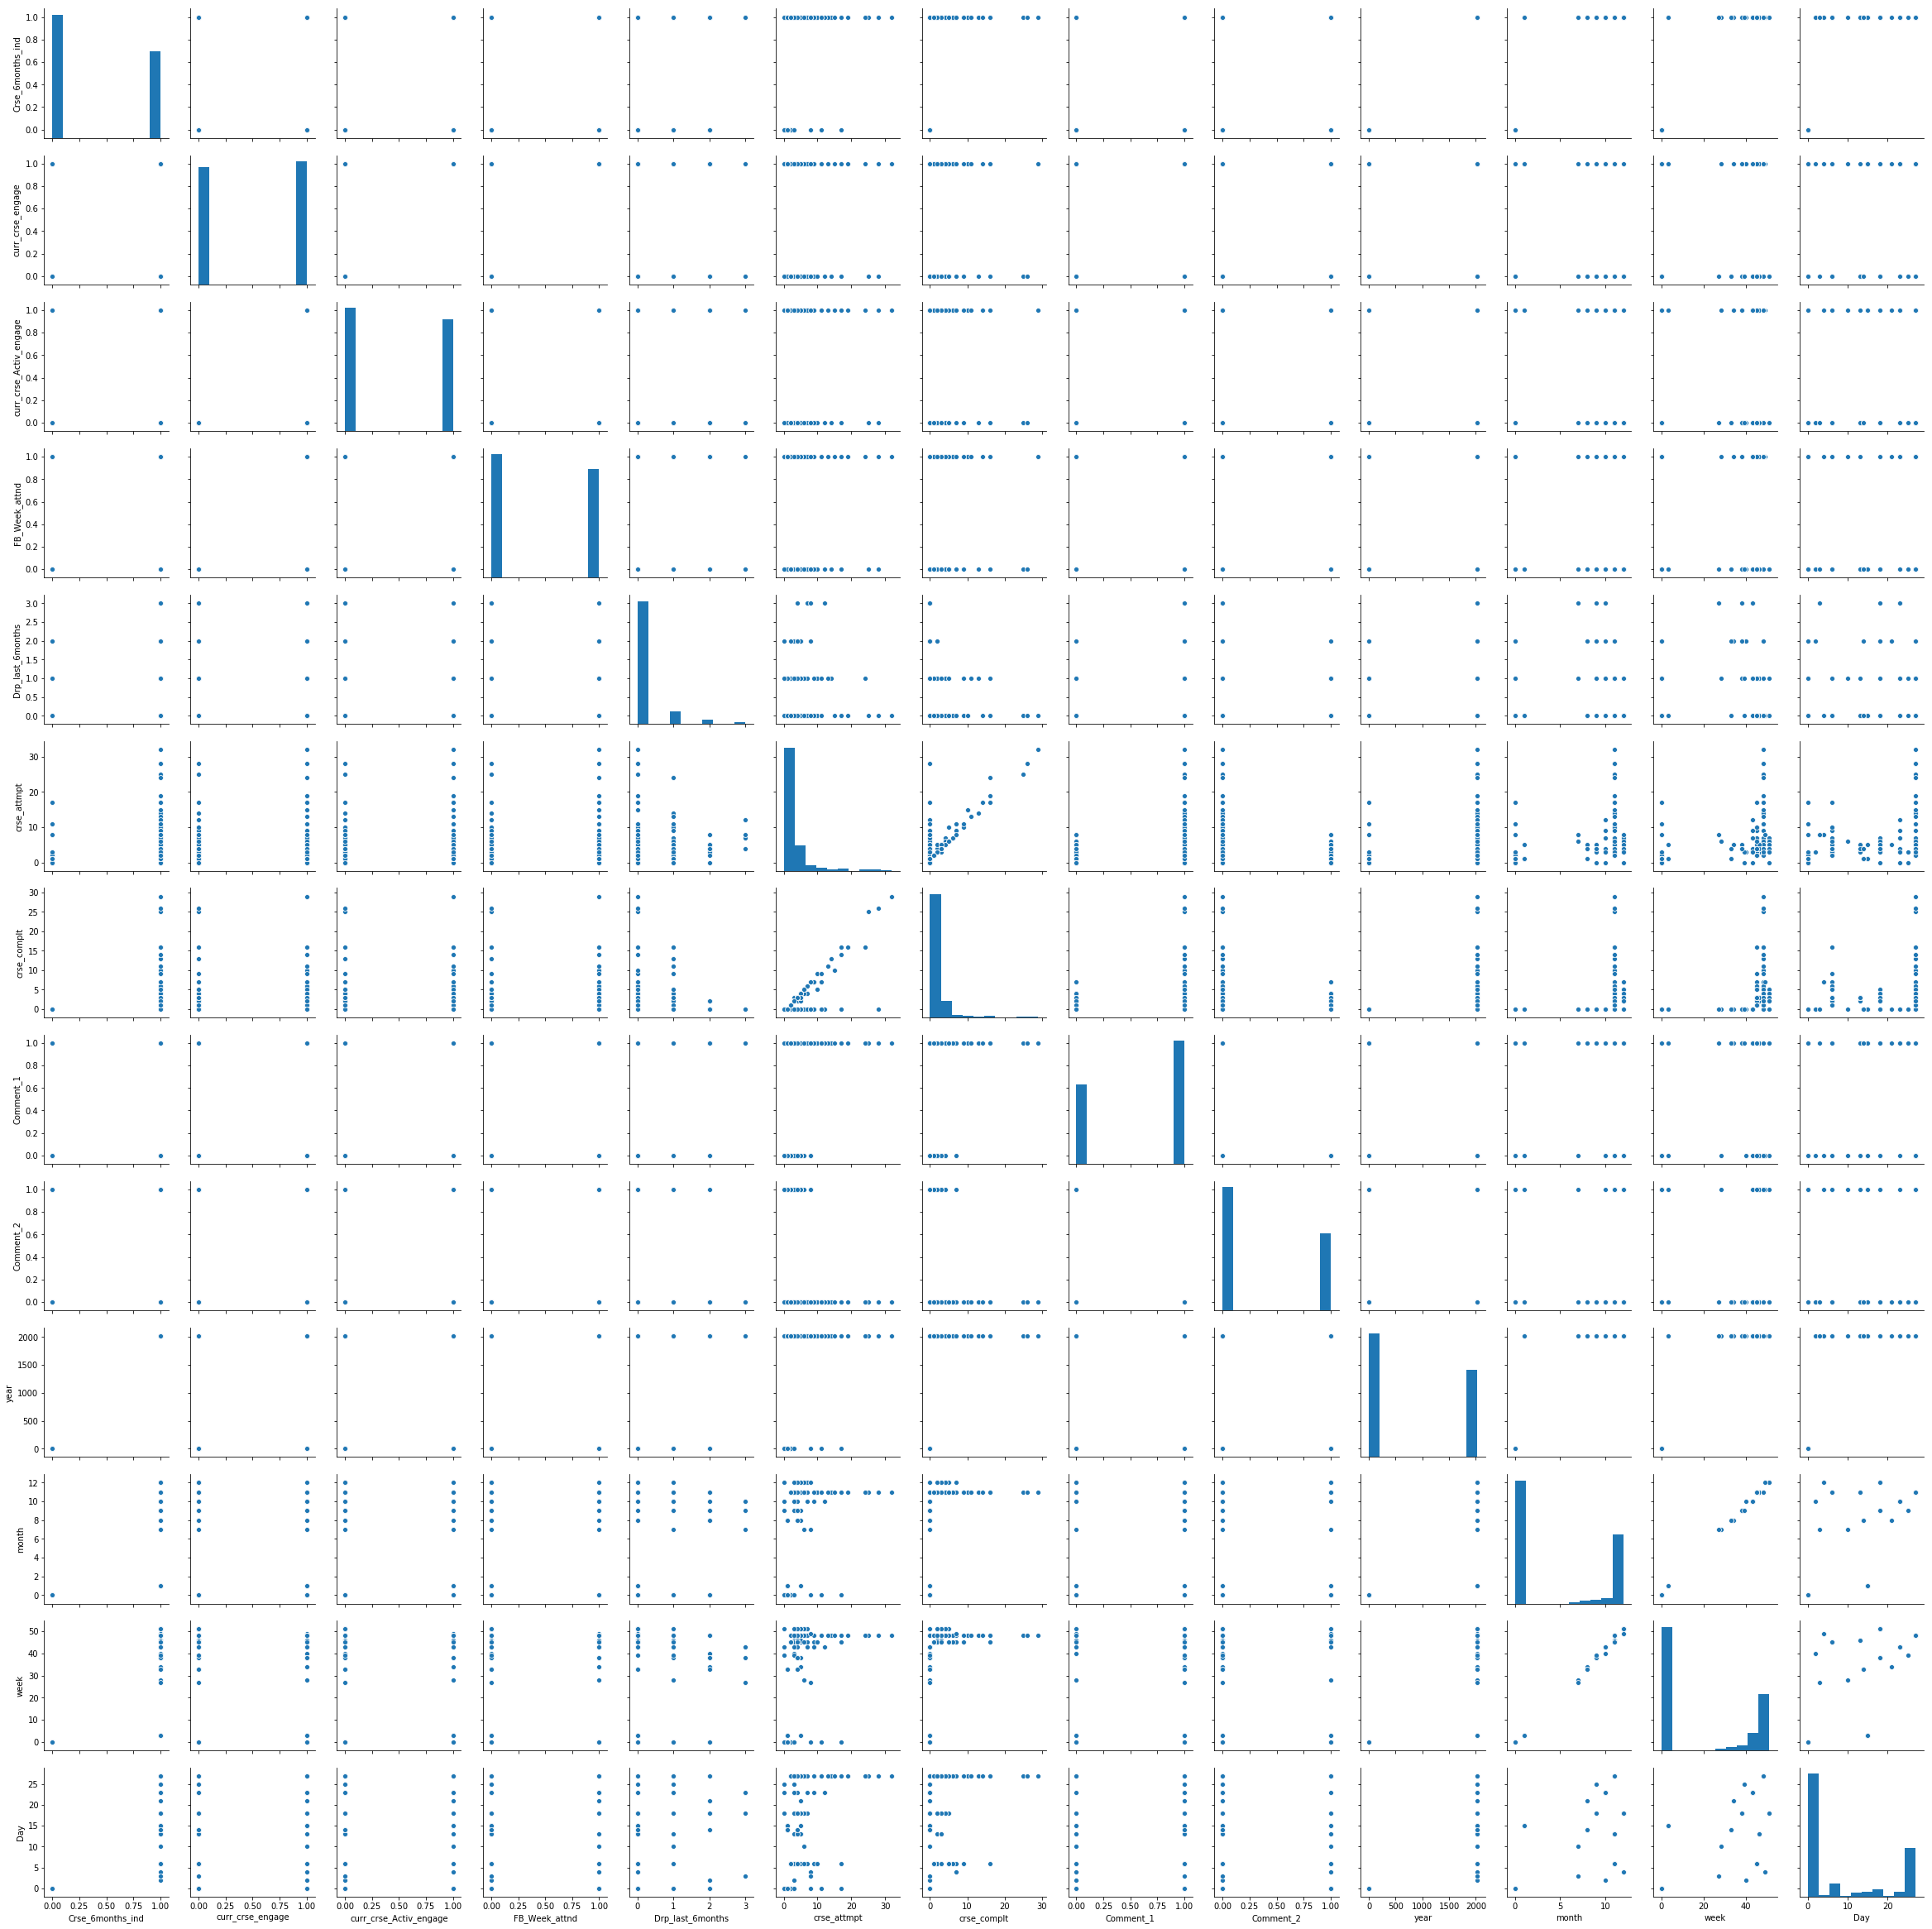

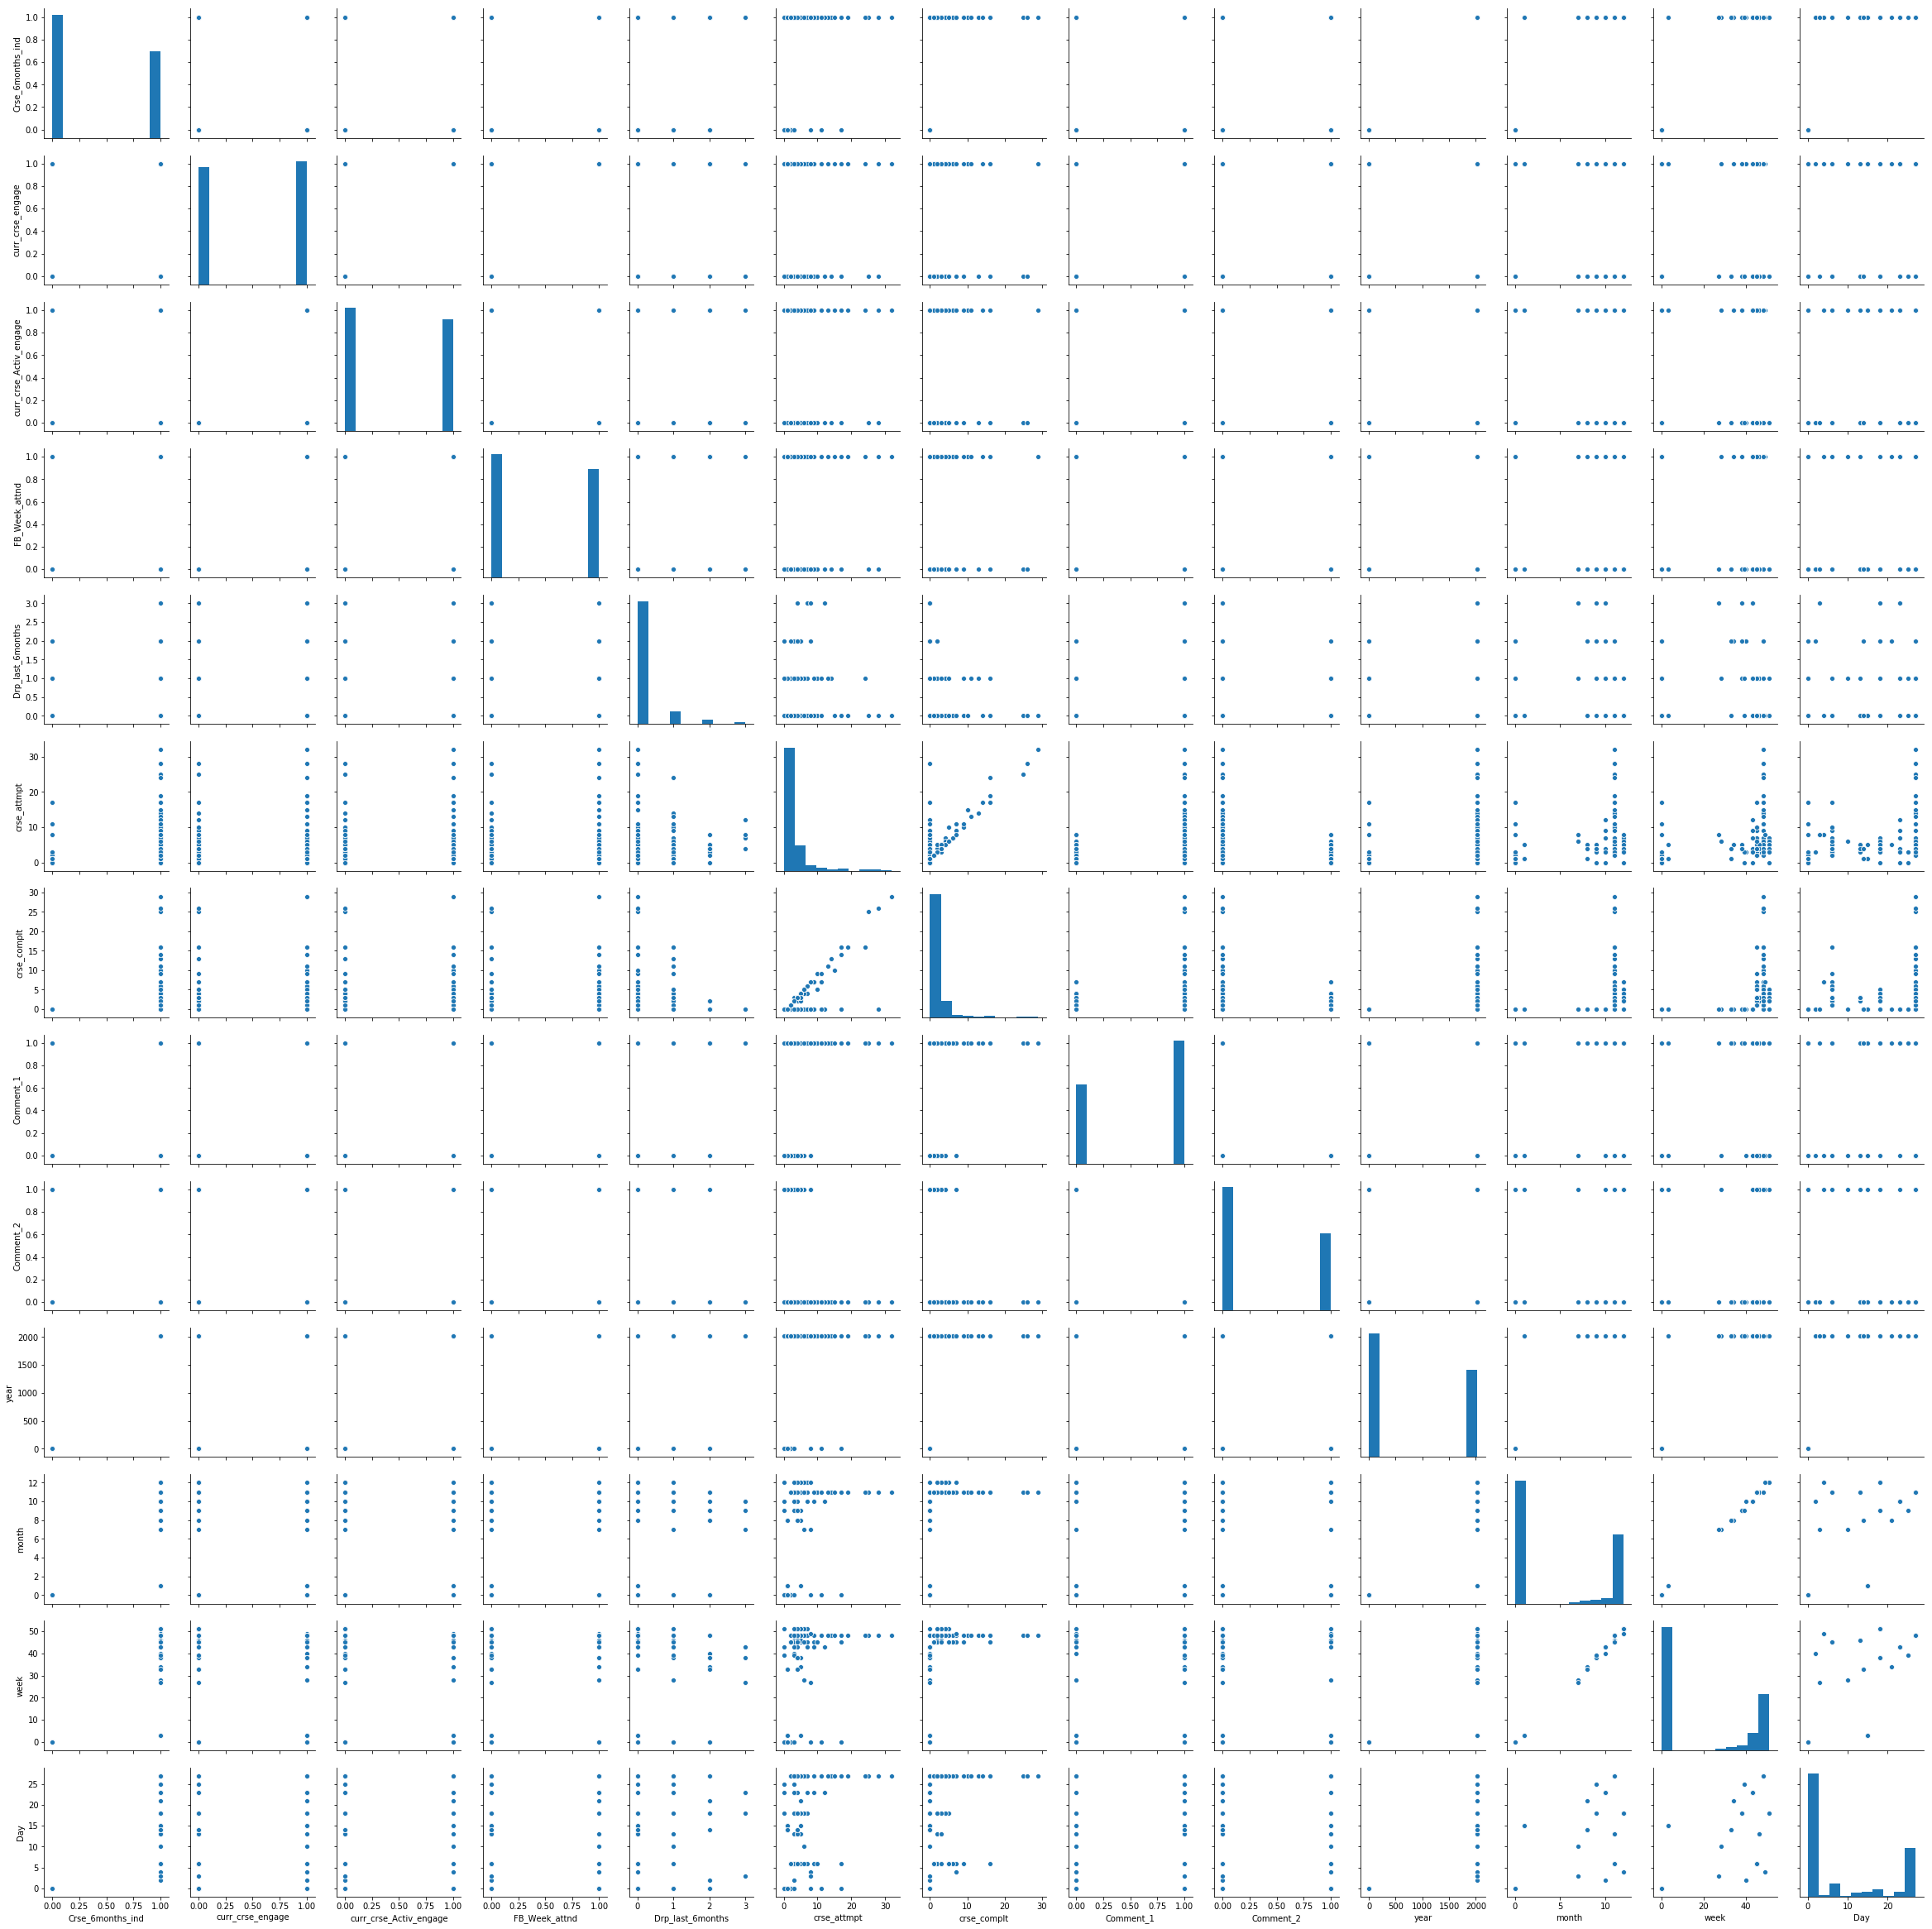

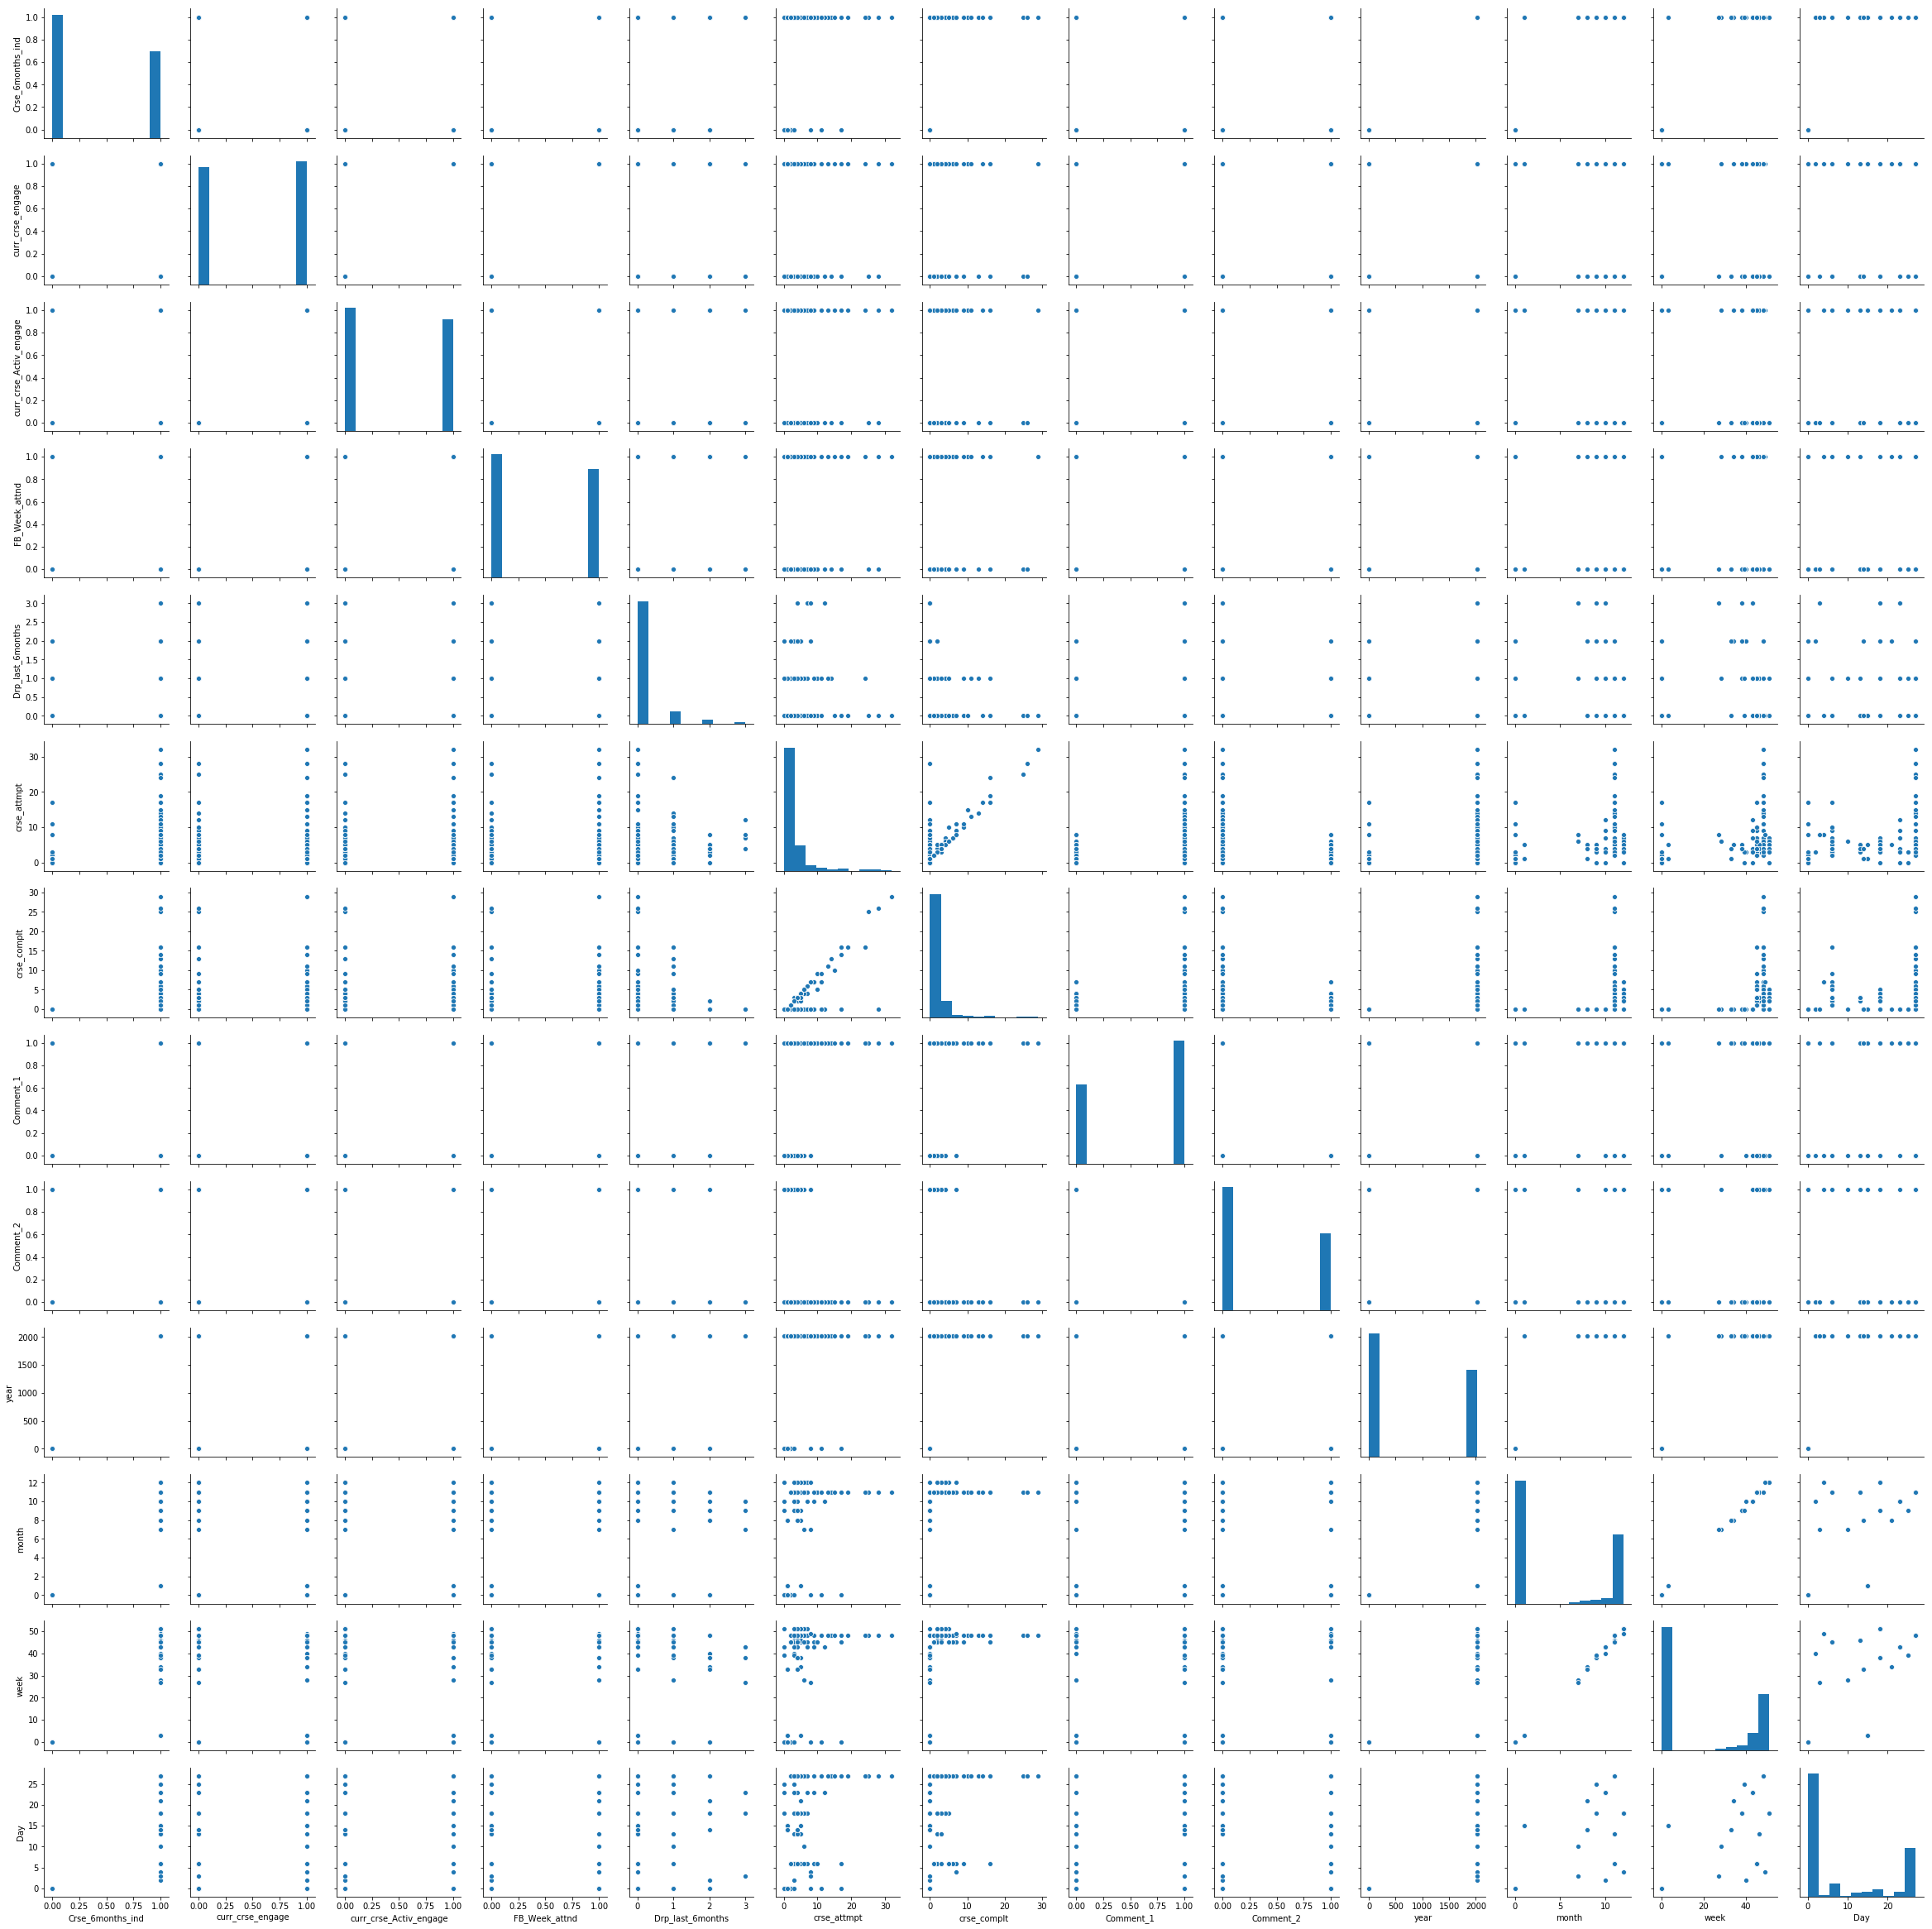

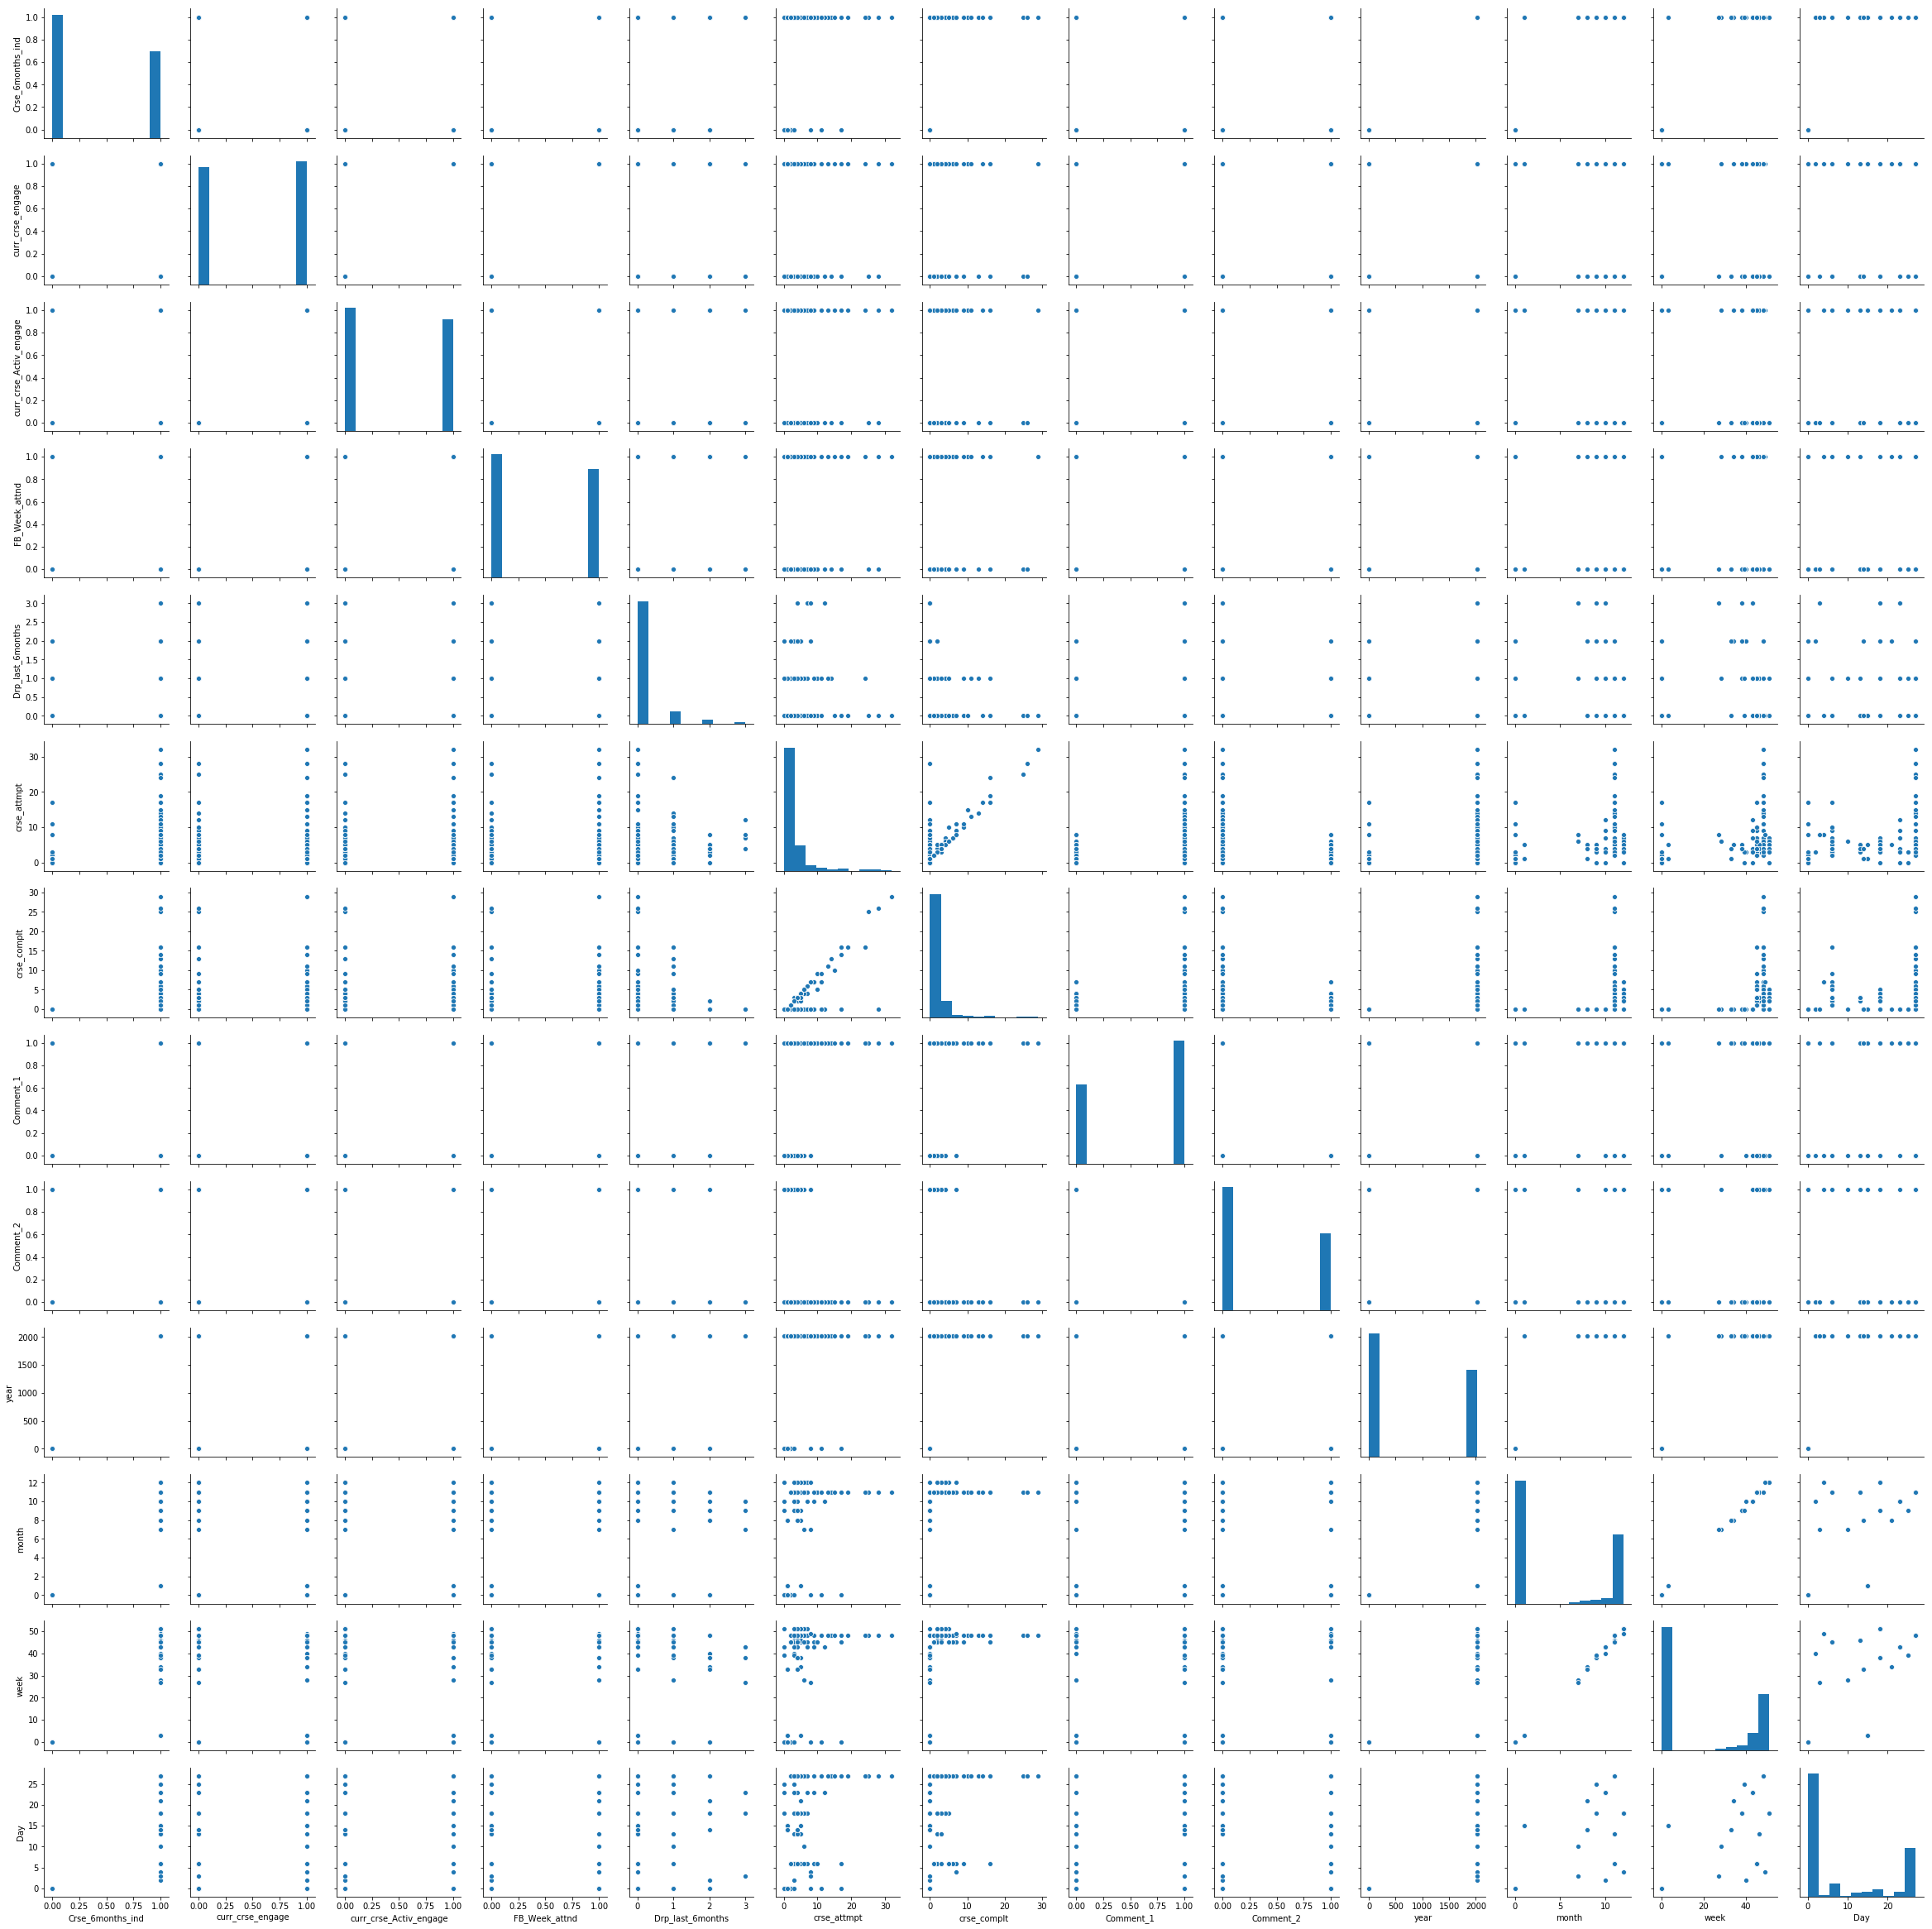

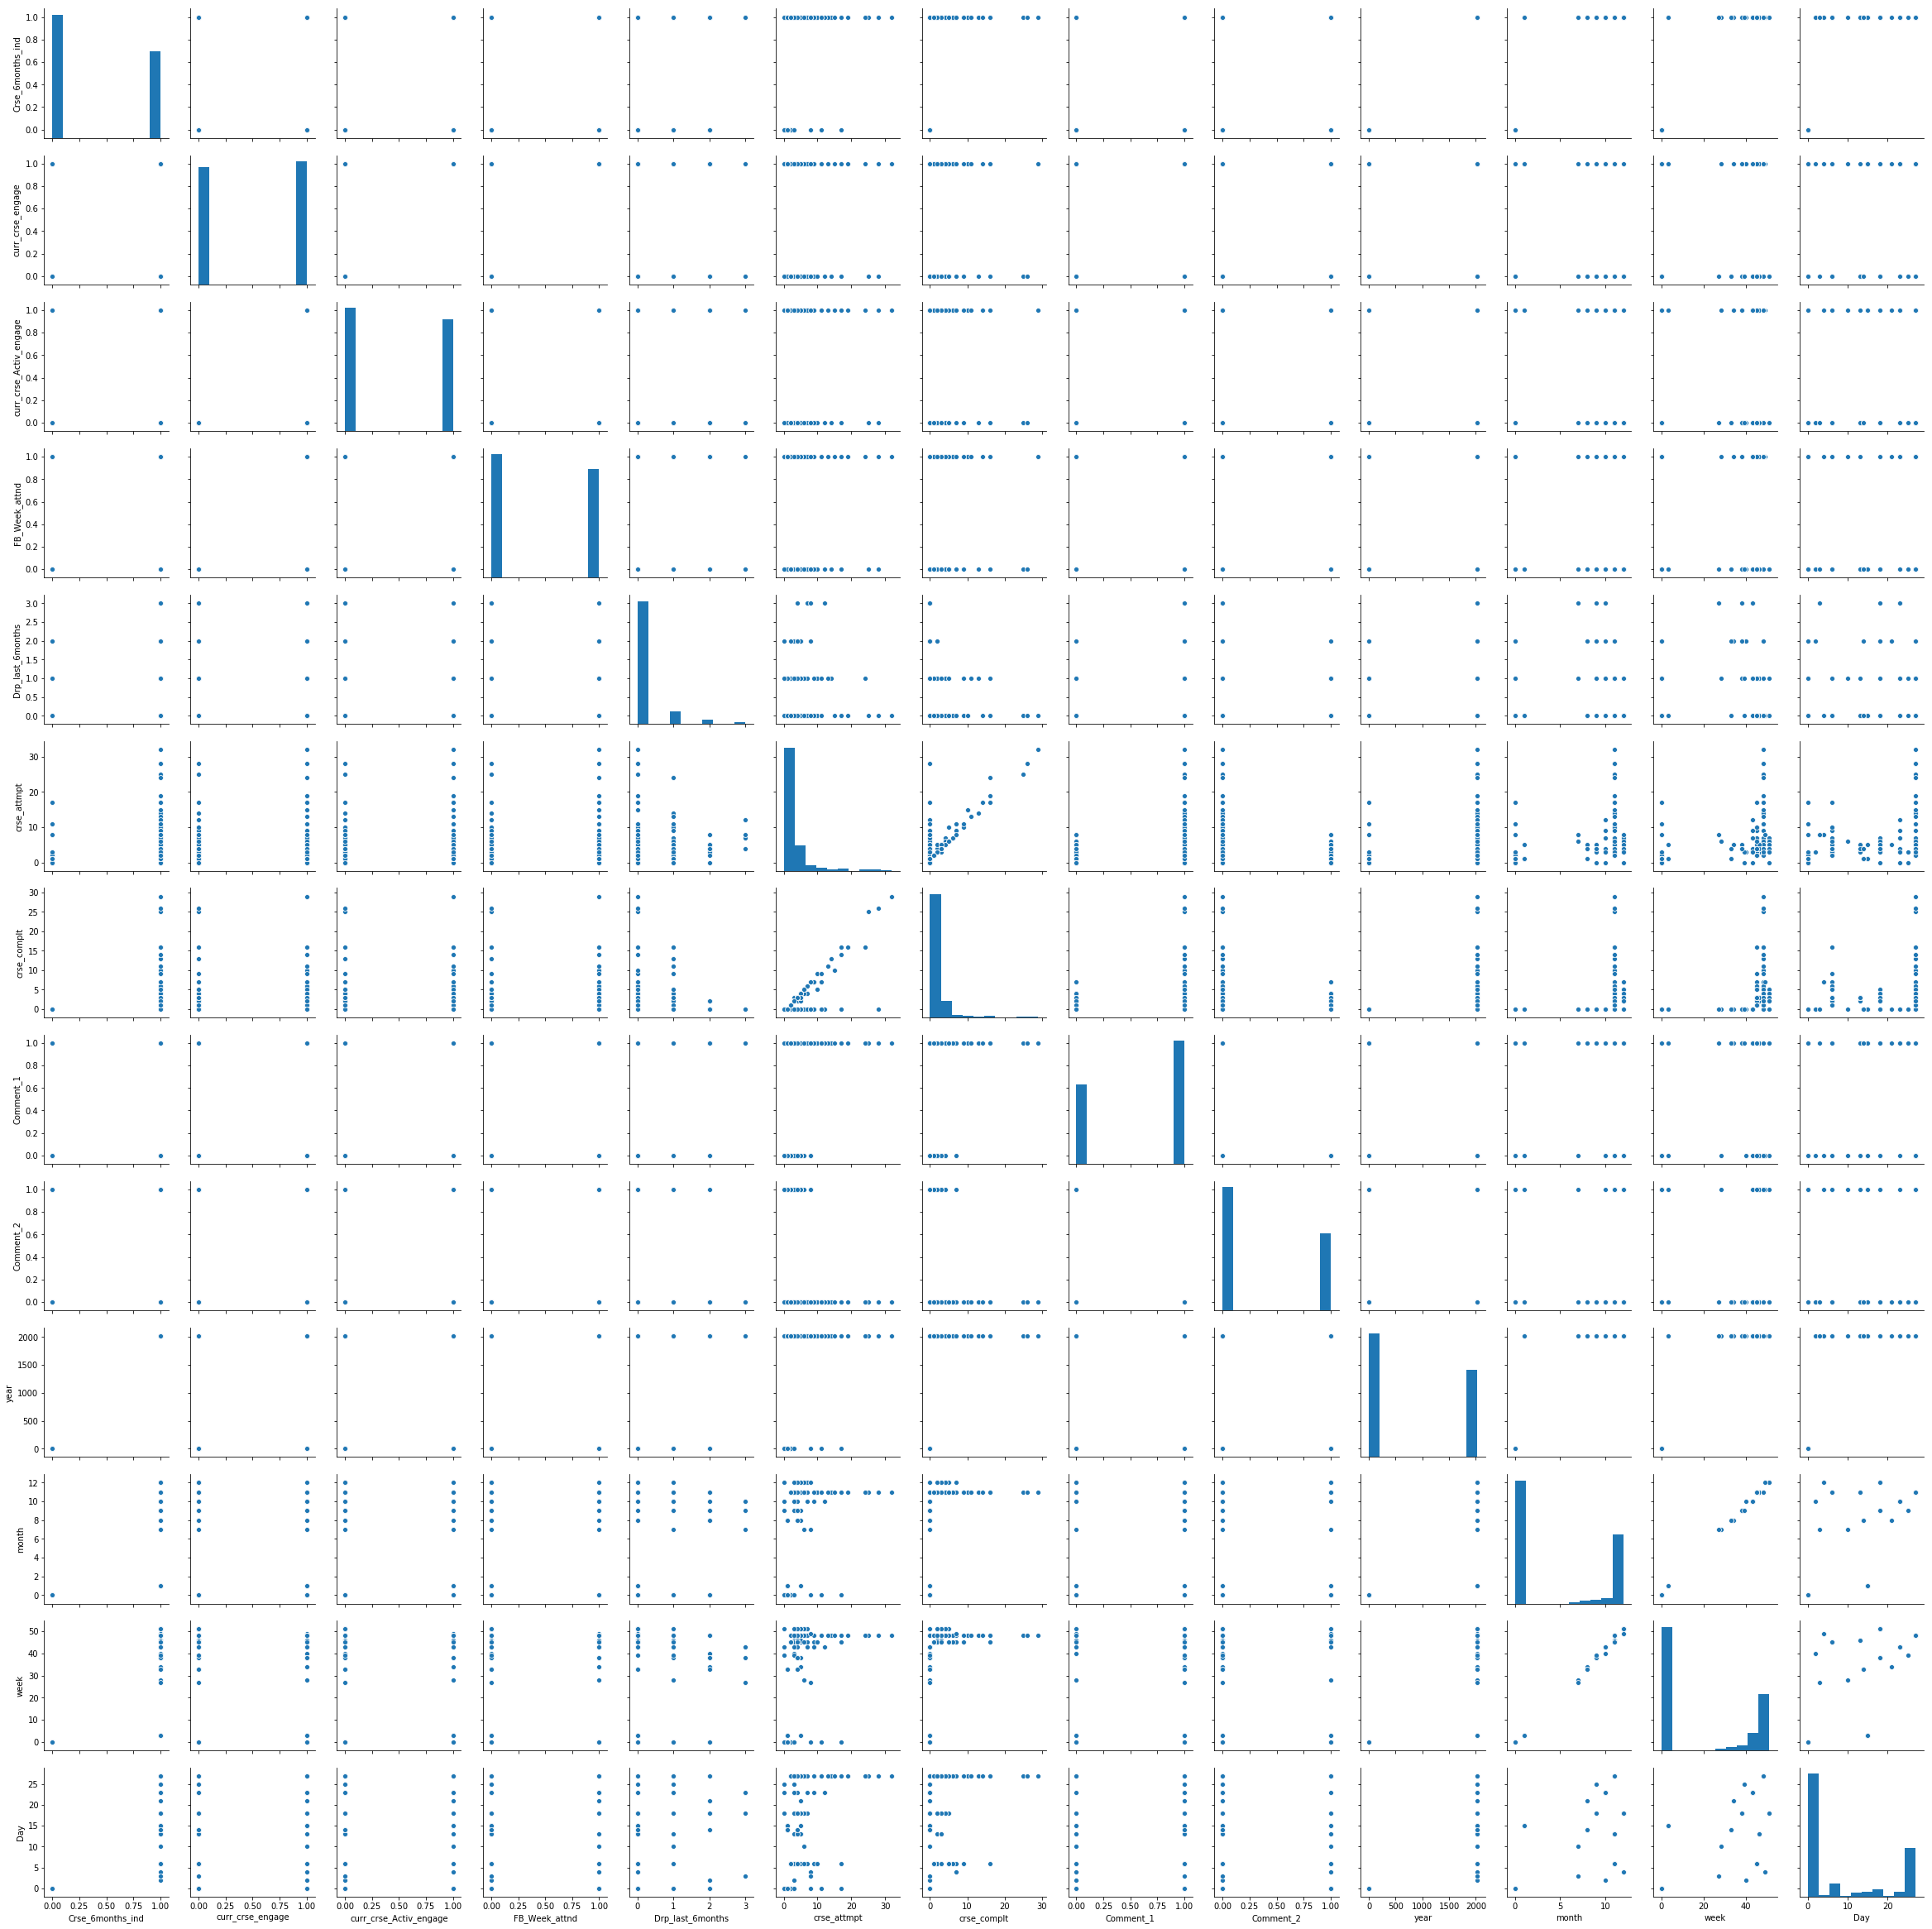

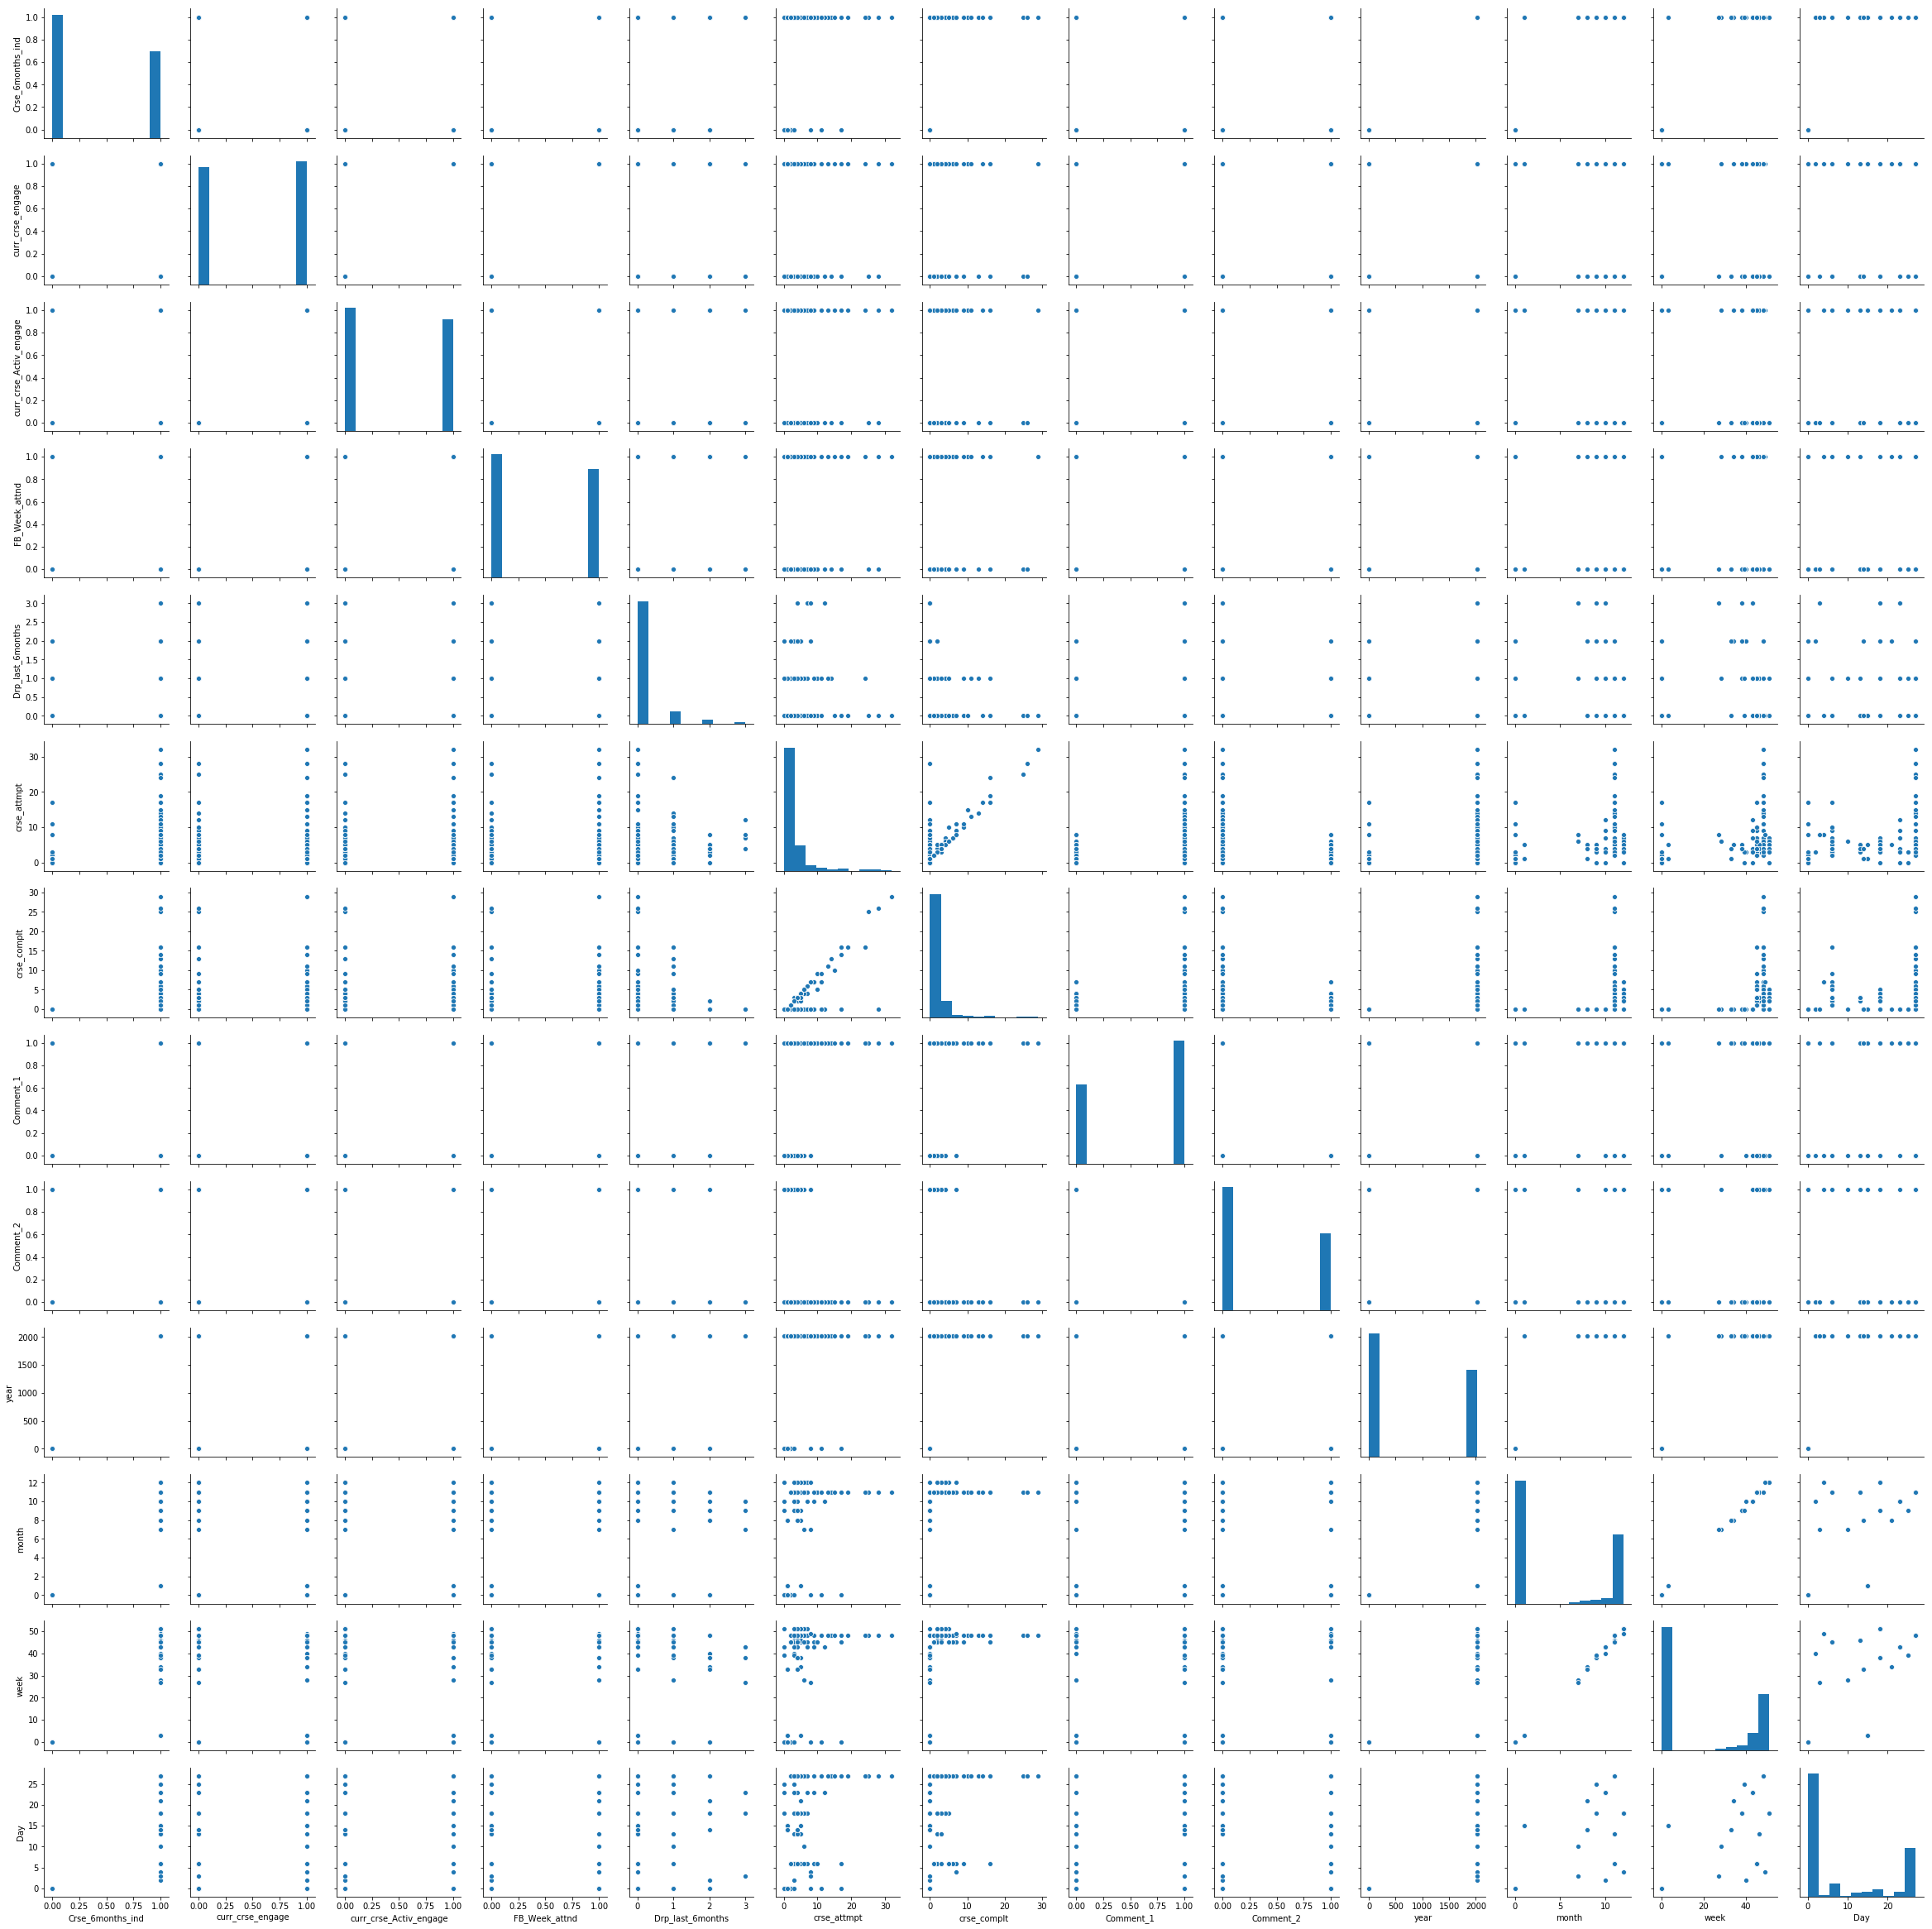

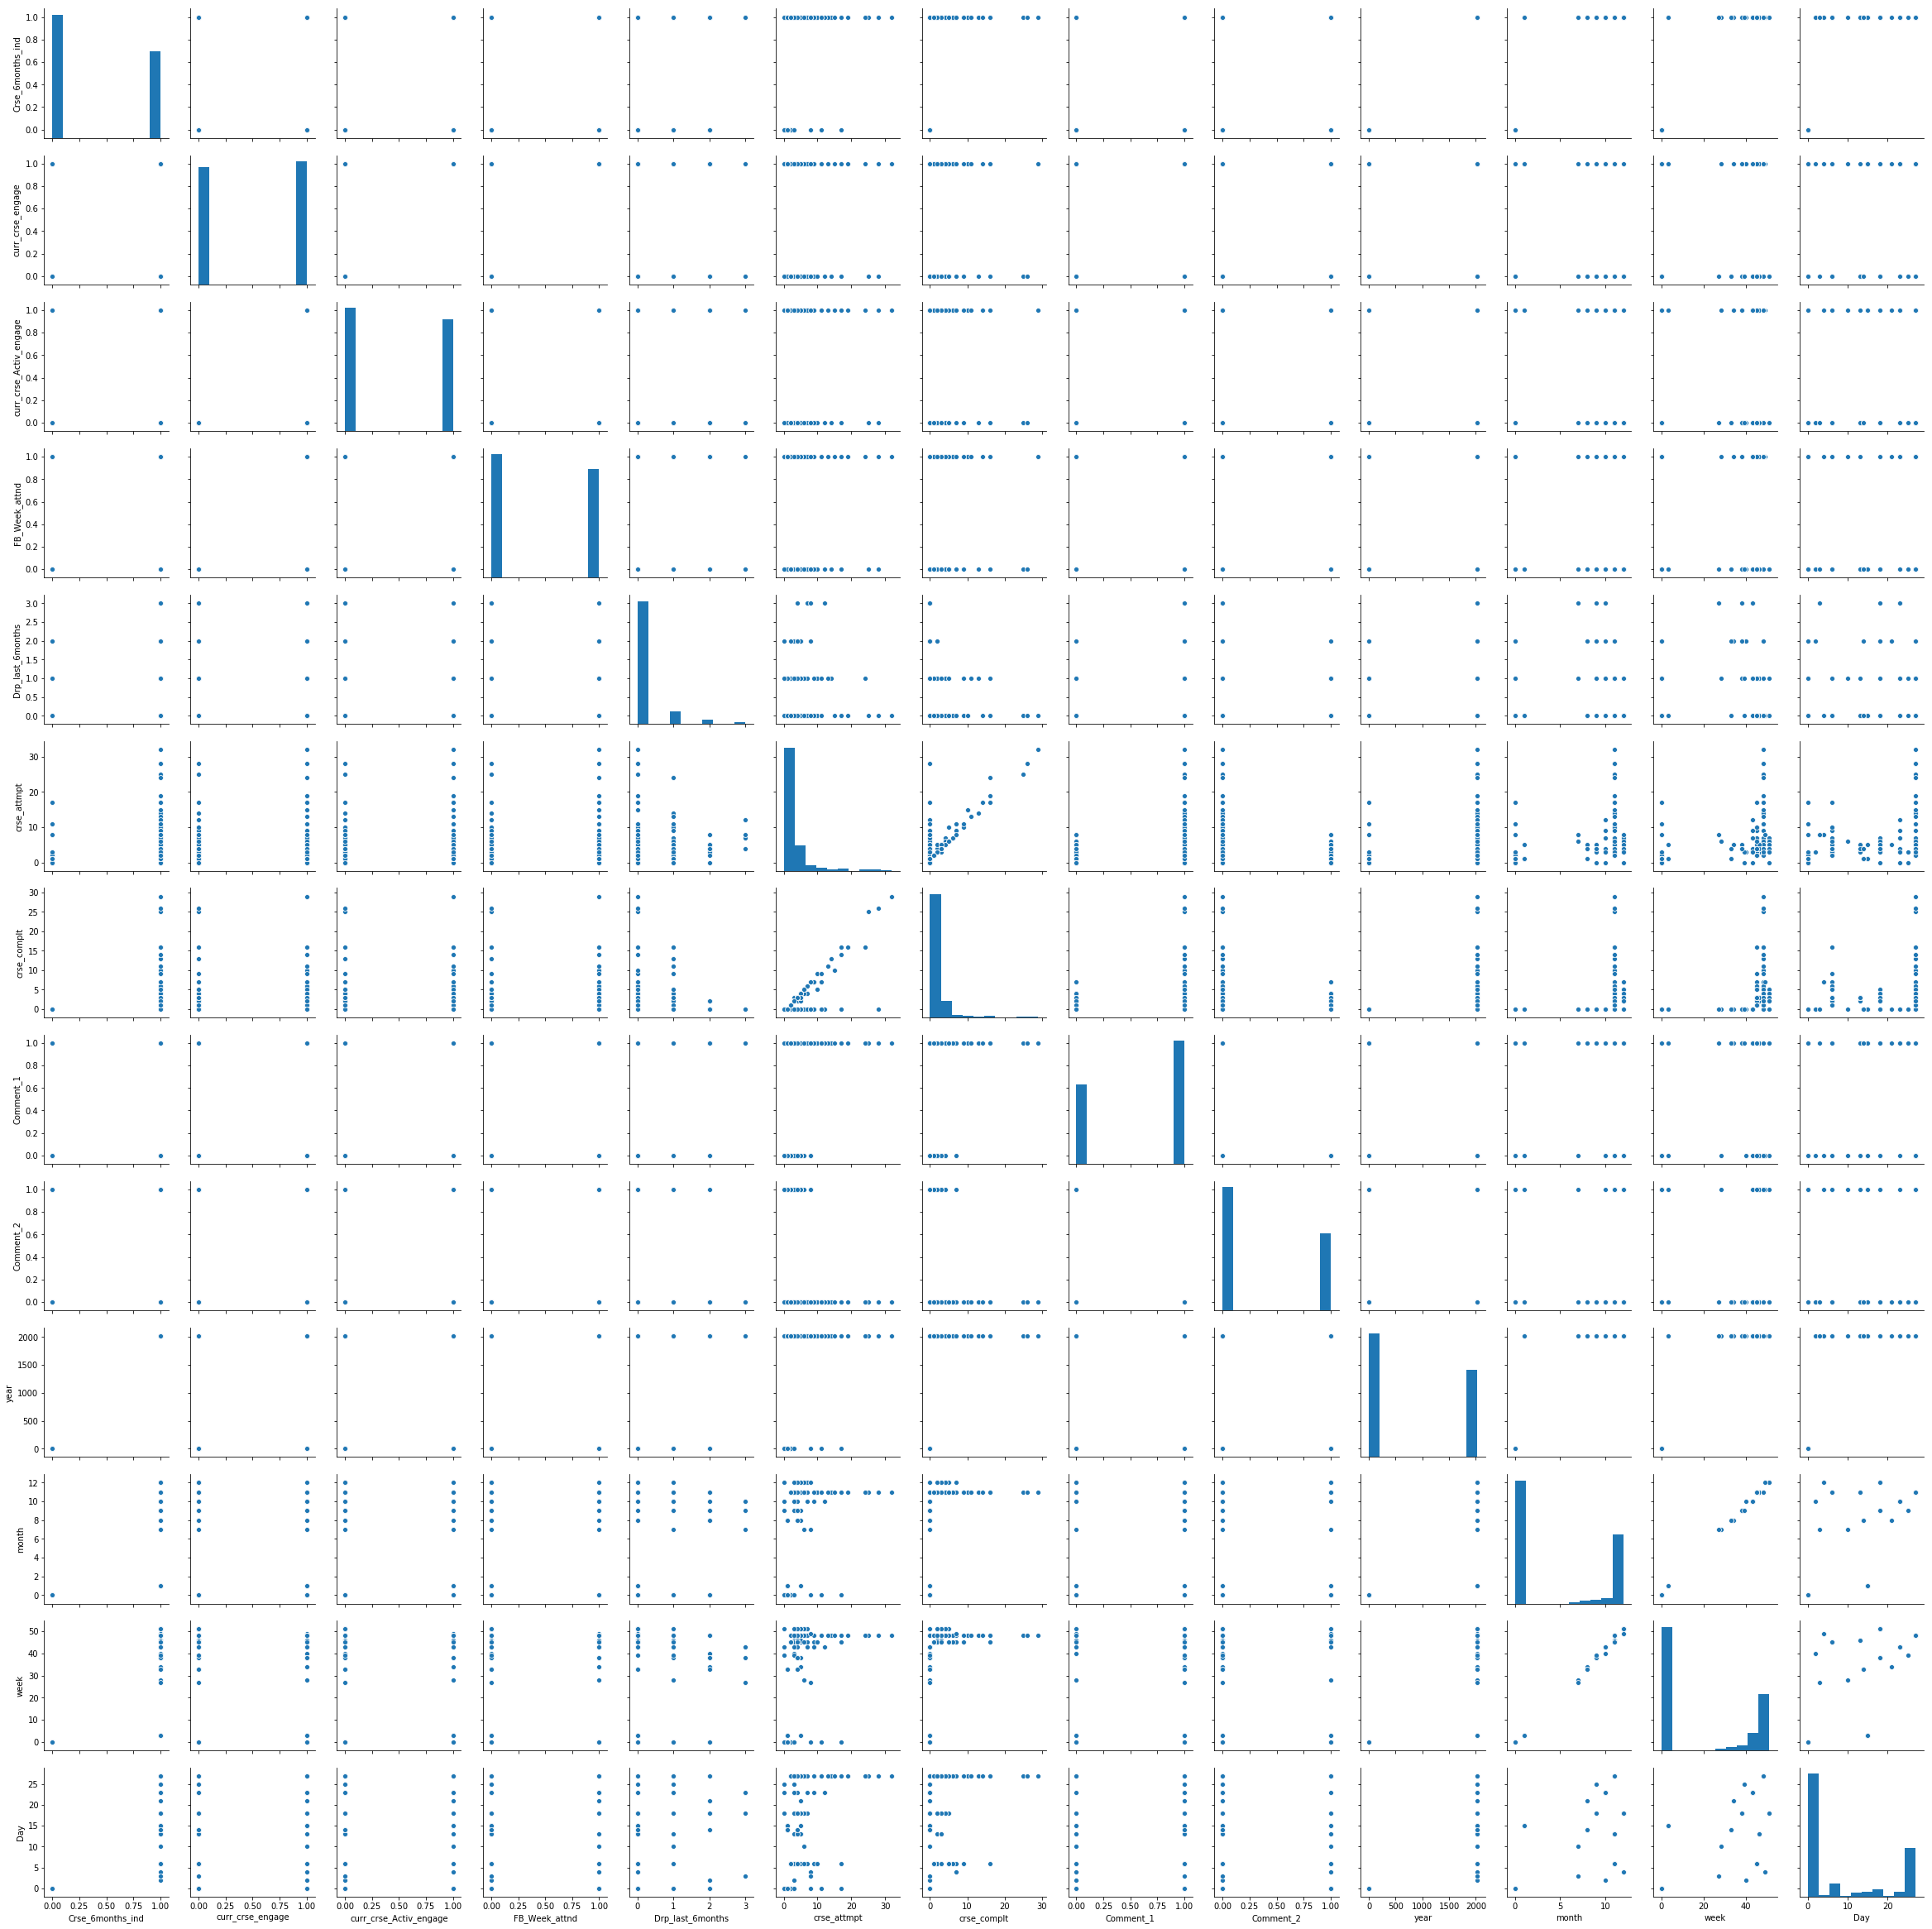

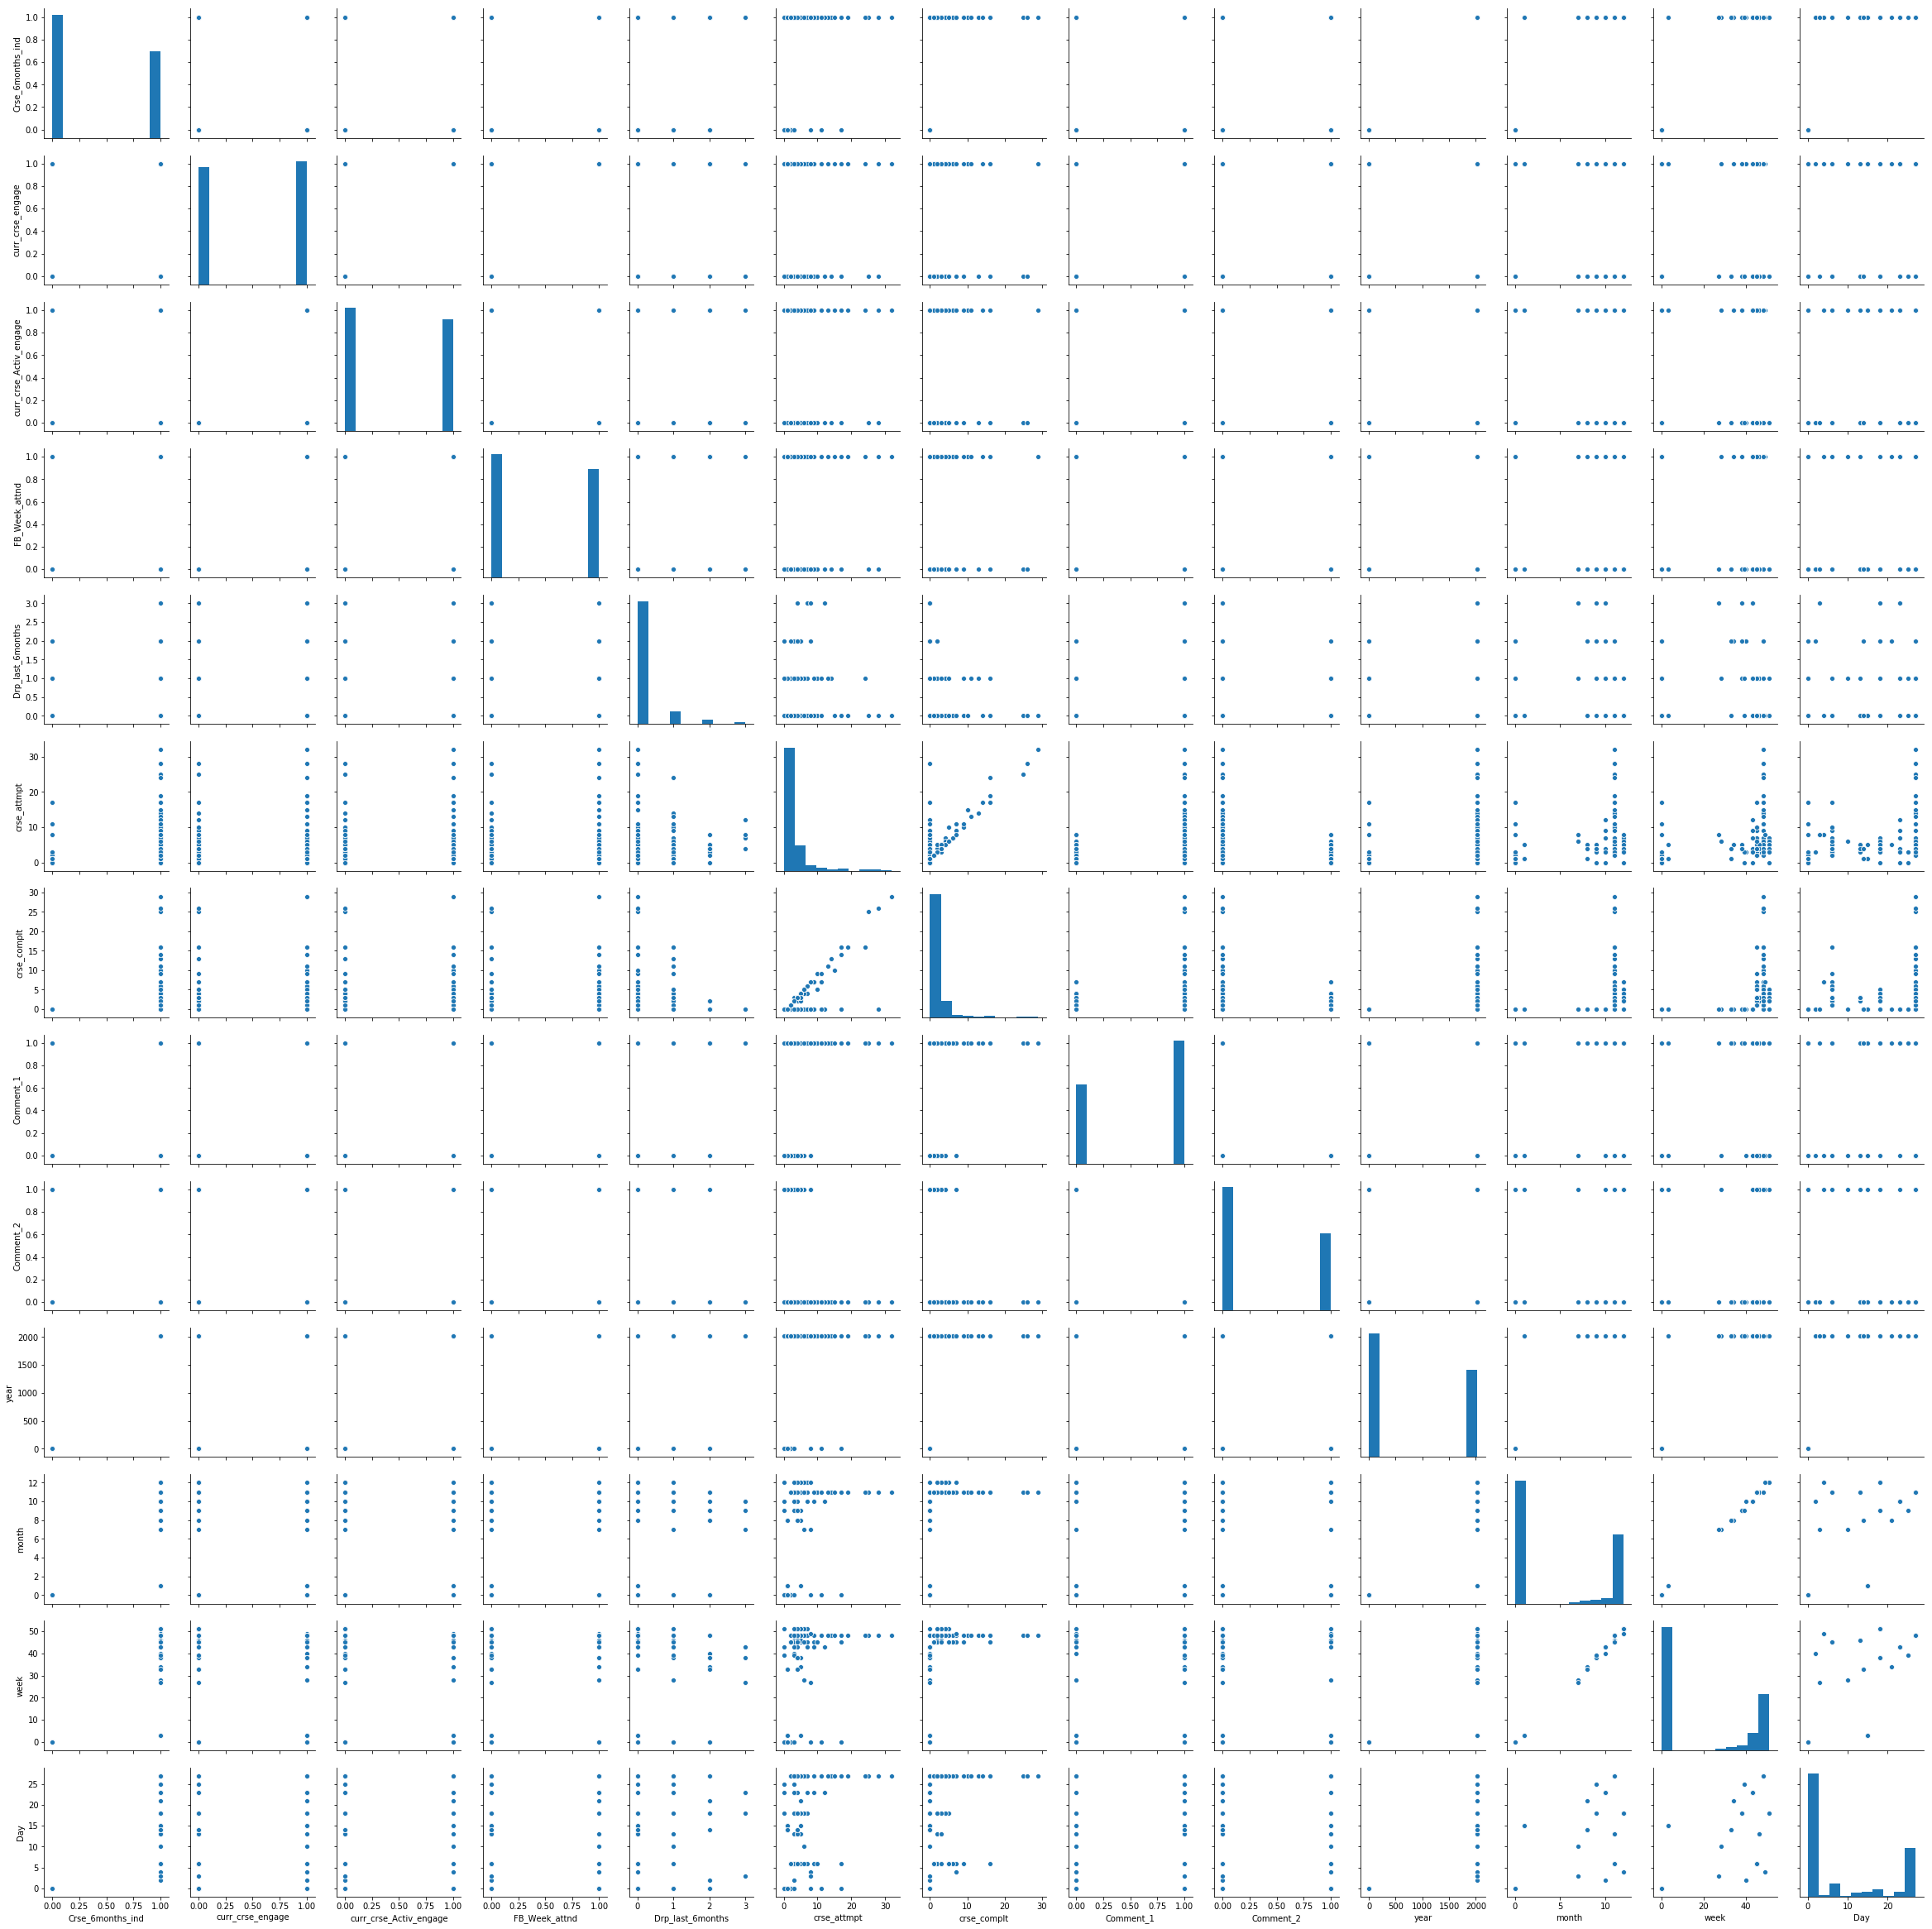

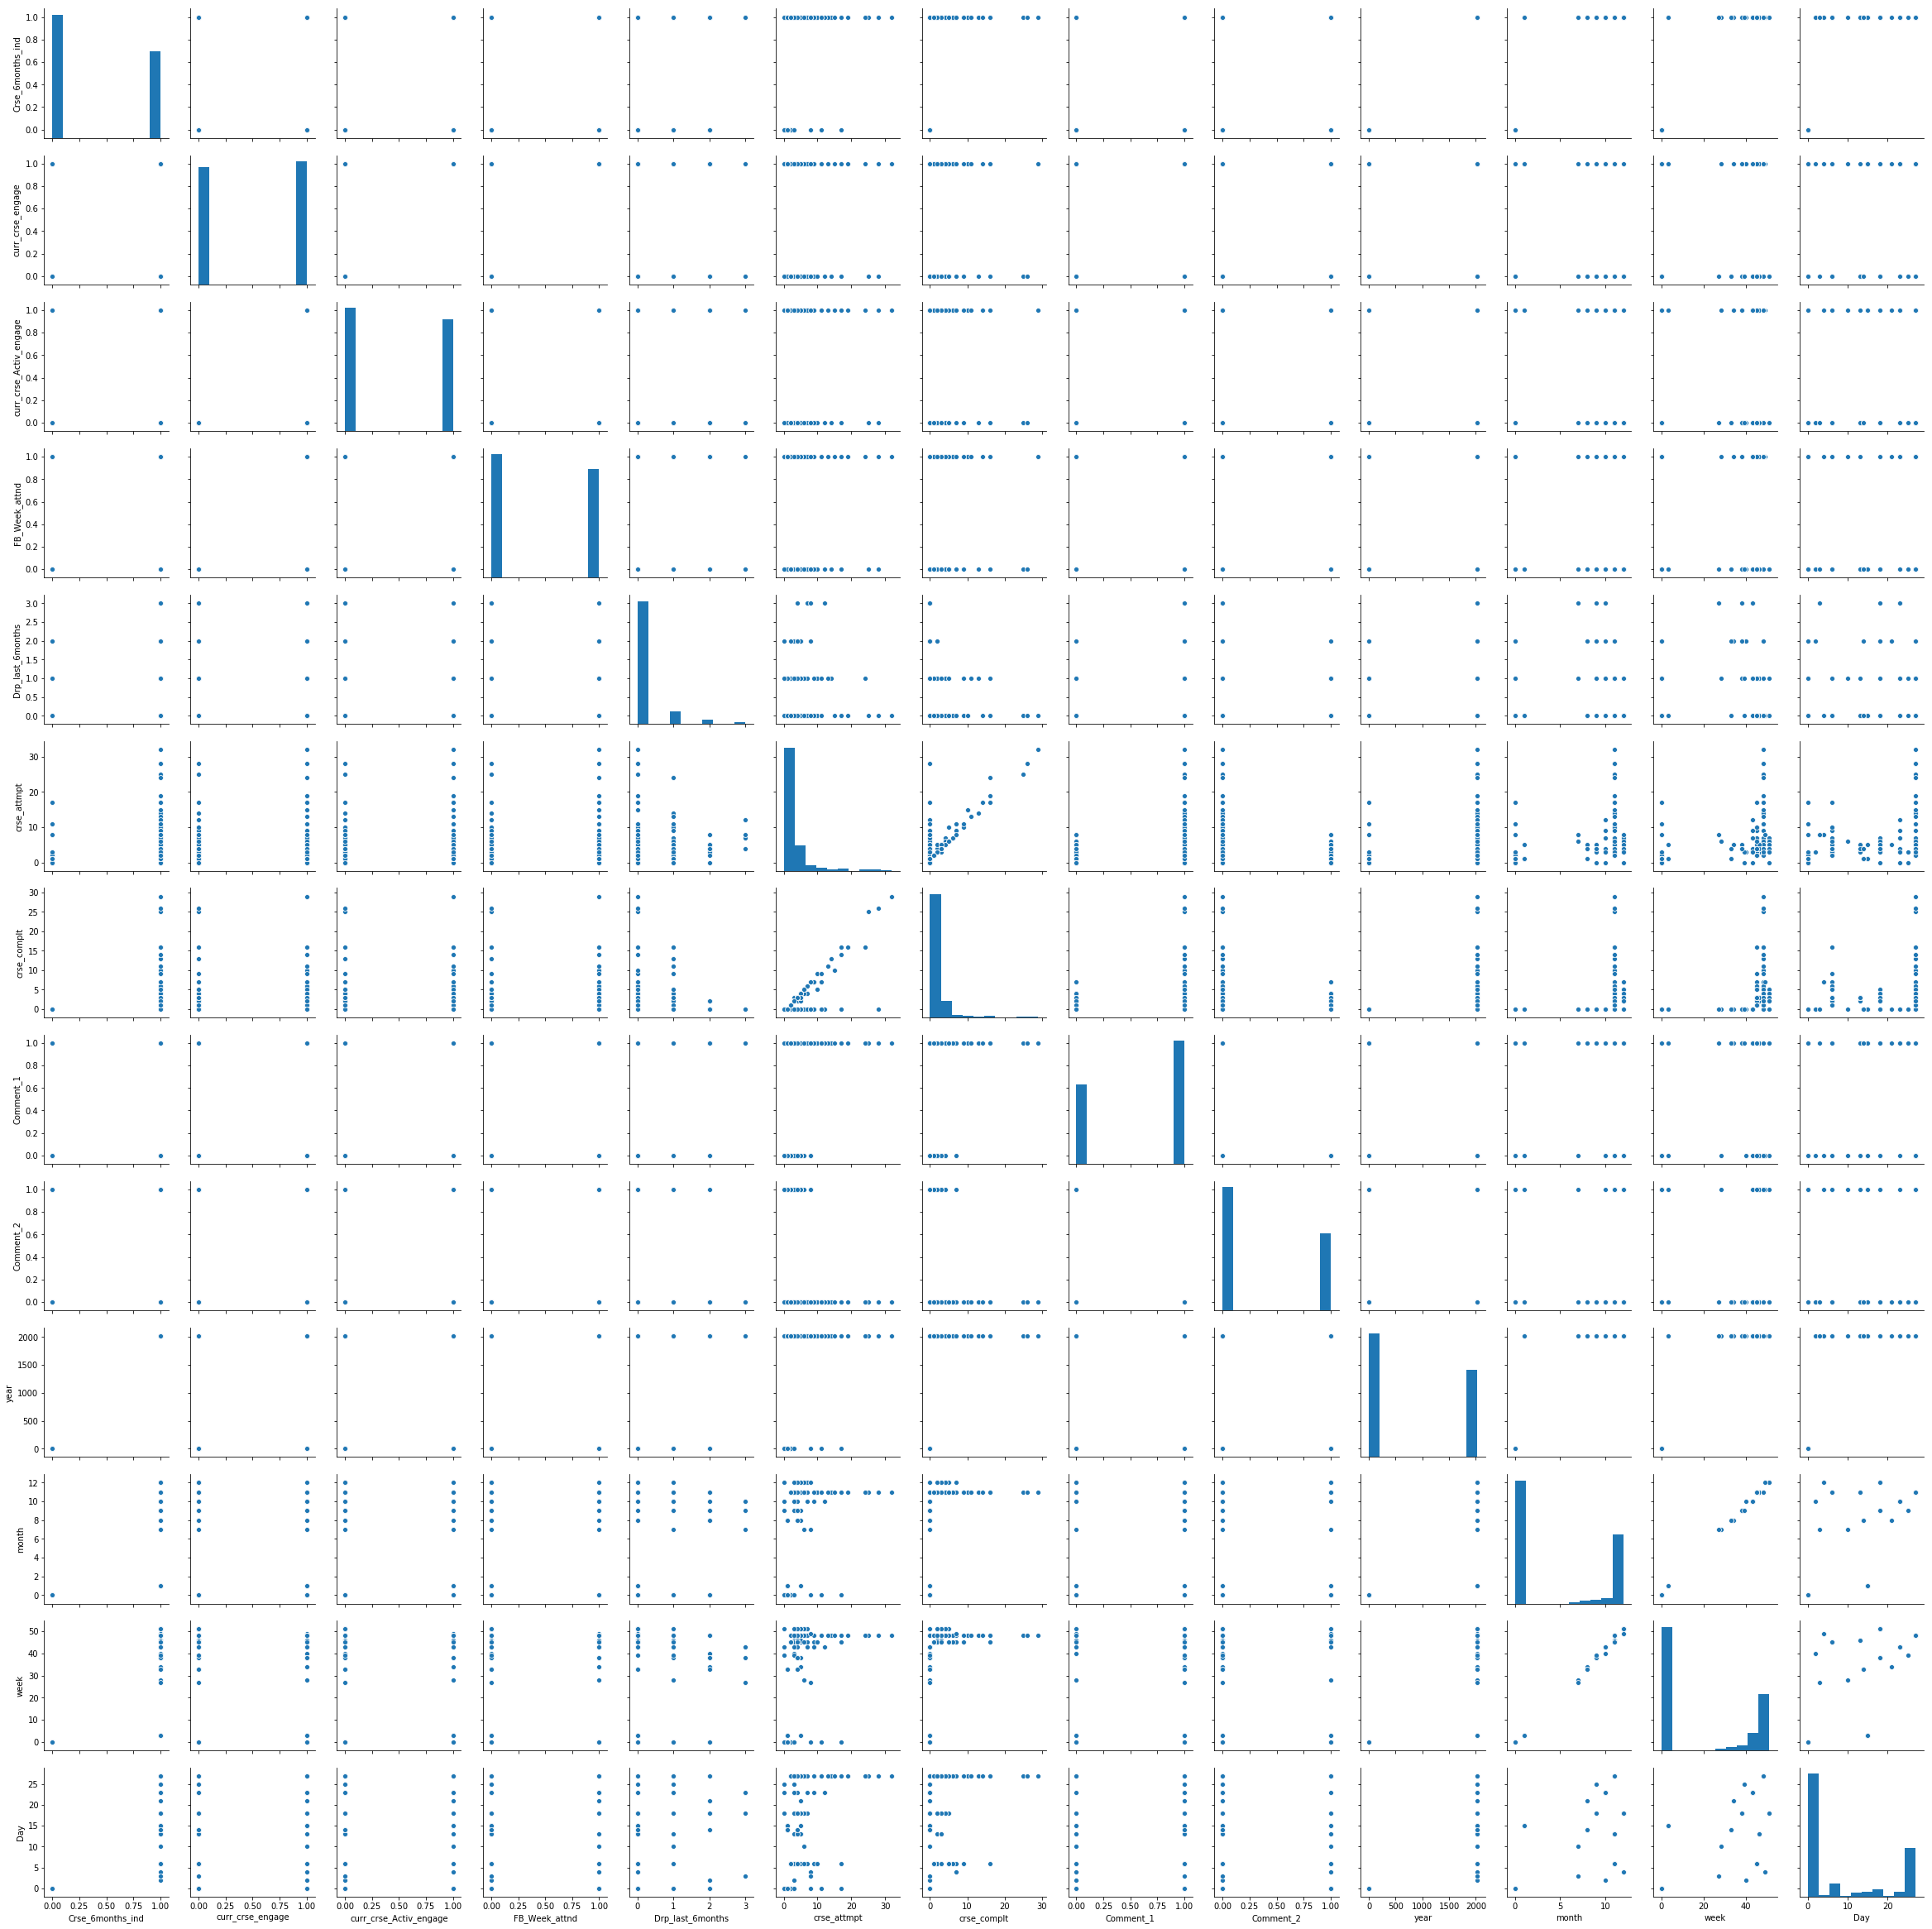

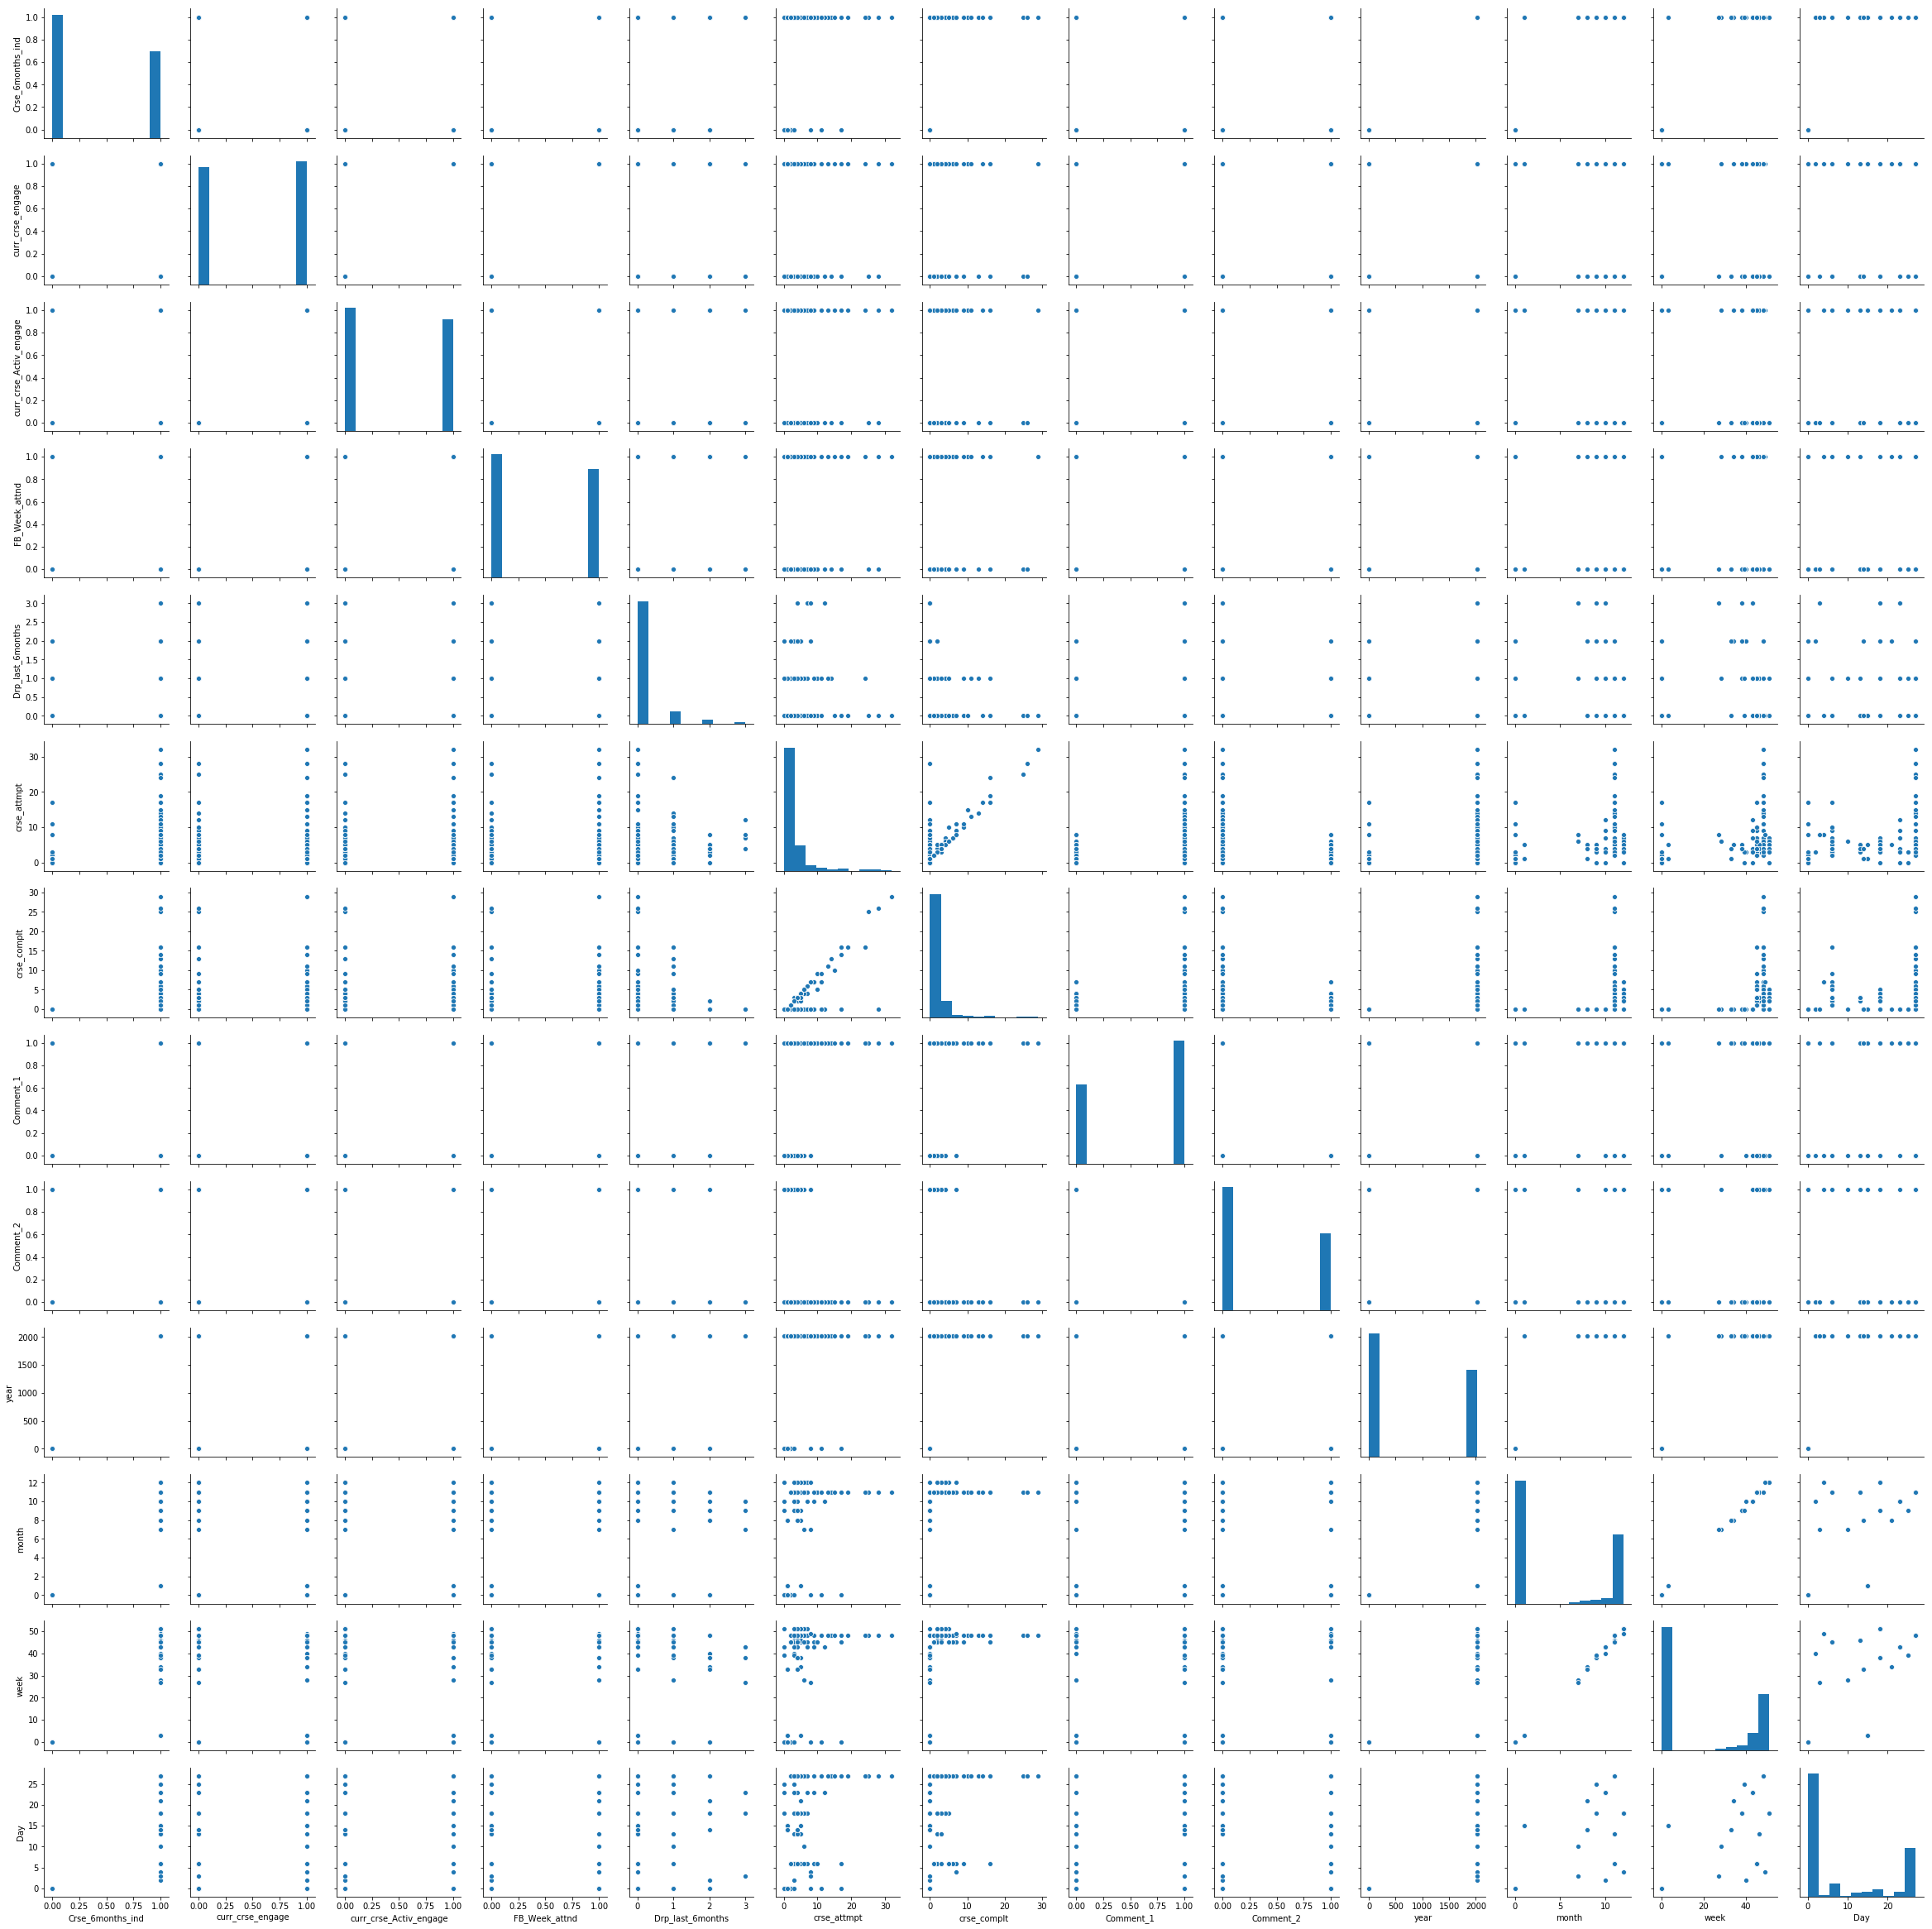

In [529]:


for j in list(facebookmixer.columns):
    sns.pairplot(facebookmixer)
    plt.savefig(str(j)+'_Pairplot.png')
    plt.close
    
    

#### ScatterPlot
#### ScatterPlot_CrseAttmpt

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


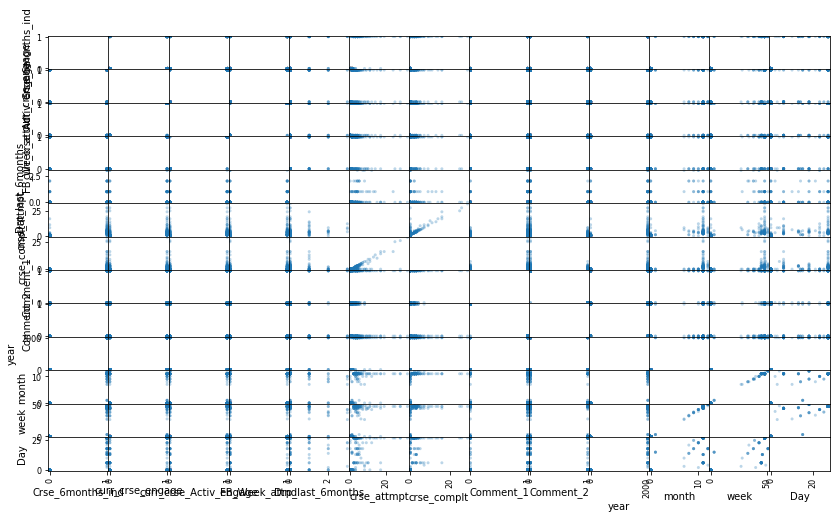

In [530]:

pd.scatter_matrix(facebookmixer, alpha = 0.3, figsize = (14,8), diagonal = 'crse_attmpt');
    
    

In [532]:
# Using Scipy to calculate Pearson Correlation coefficient

crse_attmpt = facebookmixer['crse_attmpt']
crse_complt = facebookmixer['crse_complt']
Drp_last_6months = facebookmixer['Drp_last_6months']

pearsonr_coefficient, p_value = pearsonr(crse_attmpt,crse_complt)
print(pearsonr_coefficient)

## Strongest linear correlation

0.8406958431277856


In [533]:
pearsonr_coefficient, p_value = pearsonr(crse_attmpt,Drp_last_6months)
print(pearsonr_coefficient)

0.2097384838798879


In [534]:
pearsonr_coefficient, p_value = pearsonr(crse_complt,Drp_last_6months)
print(pearsonr_coefficient)

## Moderate degree of correlation

-0.007160925904252065


In [39]:
corr = facebookmixer.corr()
corr

Crse_6months_ind  curr_crse_engage  \
Crse_6months_ind                1.000000          0.278548   
curr_crse_engage                0.278548          1.000000   
curr_crse_Activ_engage          0.272856          0.930806   
FB_Week_attnd                   0.217752          0.918720   
Drp_last_6months                0.267570          0.122615   
crse_attmpt                     0.530650          0.212516   
crse_complt                     0.459725          0.080188   
Comment_1                       0.266237          0.044979   
Comment_2                      -0.269406         -0.044813   
year                                 NaN          0.124515   
month                                NaN         -0.081168   
week                                 NaN          0.011388   
Day                                  NaN          0.644497   

                        curr_crse_Activ_engage  FB_Week_attnd  \
Crse_6months_ind                      0.272856       0.217752   
curr_crse_engage                      0.930806       0.918720   
curr_crse_Activ_engage                1.000000       0.934736   
FB_Week_attnd                         0.934736       1.000000   
Drp_last_6months                     -0.006355       0.034011   
crse_attmpt                           0.216169       0.213919   
crse_complt                           0.102459       0.103898   
Comment_1                             0.041016       0.030588   
Comment_2                            -0.028389      -0.018095   
year                                  0.135898      -0.220140   
month                                -0.077547       0.235216   
week                                  0.013264       0.317127   
Day                                   0.632225       0.652177   

                        Drp_last_6months  crse_attmpt  crse_complt  Comment_1  \
Crse_6months_ind                0.267570     0.530650     0.459725   0.266237   
curr_crse_engage                0.122615     0.212516     0.080188   0.044979   
curr_crse_Activ_engage         -0.006355     0.216169     0.102459   0.041016   
FB_Week_attnd                   0.034011     0.213919     0.103898   0.030588   
Drp_last_6months                1.000000     0.209738    -0.007161   0.139454   
crse_attmpt                     0.209738     1.000000     0.840696   0.253144   
crse_complt                    -0.007161     0.840696     1.000000   0.204070   
Comment_1                       0.139454     0.253144     0.204070   1.000000   
Comment_2                      -0.159538    -0.250439    -0.199529  -0.986371   
year                           -0.091470    -0.113360    -0.121917  -0.111989   
month                          -0.165172     0.134370     0.222443   0.057915   
week                           -0.172345     0.145749     0.229750   0.053563   
Day                            -0.074803     0.115766     0.102105  -0.015735   

                        Comment_2      year     month      week       Day  
Crse_6months_ind        -0.269406       NaN       NaN       NaN       NaN  
curr_crse_engage        -0.044813  0.124515 -0.081168  0.011388  0.644497  
curr_crse_Activ_engage  -0.028389  0.135898 -0.077547  0.013264  0.632225  
FB_Week_attnd           -0.018095 -0.220140  0.235216  0.317127  0.652177  
Drp_last_6months        -0.159538 -0.091470 -0.165172 -0.172345 -0.074803  
crse_attmpt             -0.250439 -0.113360  0.134370  0.145749  0.115766  
crse_complt             -0.199529 -0.121917  0.222443  0.229750  0.102105  
Comment_1               -0.986371 -0.111989  0.057915  0.053563 -0.015735  
Comment_2                1.000000  0.116704 -0.054369 -0.044121  0.058340  
year                     0.116704  1.000000 -0.886931 -0.871241 -0.124789  
month                   -0.054369 -0.886931  1.000000  0.990693  0.185711  
week                    -0.044121 -0.871241  0.990693  1.000000  0.317634  
Day                      0.058340 -0.124789  0.185711  0.317634  1.000000

#### Correlated Variables to FB_Week Attnd: Curr_crse_engage, Curr_crse_active_engage, 

#### Data Segmentation

In [302]:
FB_Week_AttndGroupby = facebookmixer[['FB_Week_attnd','Drp_last_6months']]
couple_columns.head()


FB_Week_attnd  Drp_last_6months
0              0                 0
1              0                 0
2              0                 0
3              1                 0
4              1                 0

In [303]:
facebookmixer_ParentchildHierarchy = couple_columns.groupby(['FB_Week_attnd']).sum()
print (facebookmixer_ParentchildHierarchy.shape)
facebookmixer_ParentchildHierarchy.head(10)



(2, 1)


Drp_last_6months
FB_Week_attnd                  
0                            29
1                            31

#### Data Segmentation by Target Variable & Course Grade Achieved by students

In [73]:
facebookmixer.groupby(['FB_Week_attnd','last_crse_grad']).size()

FB_Week_attnd  last_crse_grad
0              0                 112
               A                  23
               A-                  6
               B                   3
               B+                  2
               B-                  5
               C                   1
               C+                  2
               D+                  1
               D-                  1
               F                   1
               P                   6
1              0                  68
               A                  35
               A-                 15
               B                   5
               B+                  3
               B-                  5
               C                   3
               C+                  2
               C-                  1
               D                   1
               D+                  1
               F                   4
               IX                  1
dtype: int64

#### Data Segmentation by Target Variable & Drop off Last 6 Months

In [76]:
facebookmixer.groupby(['FB_Week_attnd','Drp_last_6months']).size()

FB_Week_attnd  Drp_last_6months
0              0                   144
               1                    12
               2                     4
               3                     3
1              0                   121
               1                    16
               2                     6
               3                     1
dtype: int64

## Conclusion : Since Numerical Variables are not normally distributed and Data does not seem sufficient to get  significant results from Hypothesis testing , I took the route of Text Mining to get a Data Insight versus traditional Hypothesis Testing.